In [ ]:

import sys
sys.path
sys.path.append('/Users/agos/Dropbox/ColumbiaProjects/Dans_Data_Package/analysis_dan')
sys.path.append('/Users/agos/Dropbox/ColumbiaProjects/Dans_Data_Package/OASIS-master')

import warnings
warnings.filterwarnings('ignore')

import calnet.calnet as cc
import calnet.dynamics as dyn
import numpy as np
from importlib import reload
import pdb
import matplotlib.pyplot as plt
import glob
import calnet.utils as utils
import pyute as ut
import size_contrast_analysis as sca
import size_contrast_figures as scf
import size_contrast_opto_figures as scof
import opto_utils
import os
import scipy.stats as sst
reload(cc)
reload(utils)

: 

In [ ]:
cache_base = os.path.expanduser('/Users/agos/Dropbox/ColumbiaProjects/Project_DansPaper/mossing_paper_code/cached/')
if not os.path.exists(cache_base):
    os.makedirs(cache_base)
cache_base = os.path.join(cache_base, "connection_deletion_sim_opto_layer4_")

In [ ]:
calnet_base = os.path.expanduser('/Users/agos/Dropbox/ColumbiaProjects/Project_DansPaper/')
notebook_base = os.path.expanduser('/Users/agos/Dropbox/ColumbiaProjects/Project_DansPaper/mossing_paper_code/simulation/Agos_Code/')

In [ ]:
npyfile = np.load(f'{calnet_base}/calnet_data/dynamics/vip_both_pixels_opto_tavg_210513c.npy',allow_pickle=True)[()]
npyfile_halo = np.load(f'{calnet_base}/calnet_data/dynamics/vip_halo_l4_opto_tavg_connection_deletion_210513c.npy',allow_pickle=True)[()]
npyfile_chrimson = np.load(f'{calnet_base}/calnet_data/dynamics/vip_chrimson_l4_opto_tavg_connection_deletion_210513c.npy',allow_pickle=True)[()]

wtfile = '210513c'


In [ ]:
npyfile.keys()

dict_keys(['YY_opto', 'YY_opto_no_pcpc', 'YY_opto_no_pcpv', 'YY_opto_tavg_no_pcvip', 'YY_opto_tavg_no_pcsst', 'YY_opto_tavg_no_vipbias', 'YY_opto_tavg_no_sstvip'])

In [ ]:
# note: these simulations keep resEta, resXi fixed. Not Eta, Xi!
YY_opto = npyfile['YY_opto'][:,:,:,np.newaxis,:]
YY_opto_no_pcpc = npyfile['YY_opto_no_pcpc'][:,:,:,np.newaxis,:]
YY_opto_no_pcpv = npyfile['YY_opto_no_pcpv'][:,:,:,np.newaxis,:]
YY_opto_no_pcvip = npyfile['YY_opto_tavg_no_pcvip'][:,:,:,np.newaxis,:]
YY_opto_no_pcsst = npyfile['YY_opto_tavg_no_pcsst'][:,:,:,np.newaxis,:]
YY_opto_no_vipbias = npyfile['YY_opto_tavg_no_vipbias'][:,:,:,np.newaxis,:]

In [ ]:
# weights_files = glob.glob(f'{notebook_base}/shared_data/calnet_data/weights/weights_201203g/*.npy')
weights_files = glob.glob(f'{calnet_base}/calnet_data/weights/weights_201215b/*.npy')
weights_files = glob.glob(f'{calnet_base}/calnet_data/weights/weights_210513c/*.npy')
weights_files.sort()

reload(cc)
nwt = len(weights_files)
mdls = [None for iwt in range(nwt)]
losses = np.zeros((nwt,))
for iwt in range(nwt):
#     wtfile = 'weights_'+good_fits[iwt]+'.npy'
#     wtdict = np.load(wtbase+wtfile,allow_pickle=True)[()]
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    mdls[iwt] = cc.ModelOri(wtdict,nT=1)
    losses[iwt] = mdls[iwt].loss
    
mdls_no_pcpv = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmy'][[0,0,3,3],[0,3,0,3]] = 0
    mdls_no_pcpv[iwt] = cc.ModelOri(wtdict,nT=1)
    
mdls_no_pcpc = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmy'][0,0] = 0
    mdls_no_pcpc[iwt] = cc.ModelOri(wtdict,nT=1)
    
mdls_no_pcvip = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmy'][0,2] = 0
    wtdict['Wmx'][0,2] = 0
    mdls_no_pcvip[iwt] = cc.ModelOri(wtdict,nT=1)
    
mdls_no_pcsst = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmy'][0,1] = 0
    wtdict['Wmx'][0,1] = 0
    mdls_no_pcsst[iwt] = cc.ModelOri(wtdict,nT=1)
        
mdls_no_vipbias = [None for iwt in range(nwt)]
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    wtdict['Wmx'][1,2] = 0
    mdls_no_vipbias[iwt] = cc.ModelOri(wtdict,nT=1)
    
low_loss = (losses<np.nanpercentile(losses,10))

mdls = [mdl for (mdl,ll) in zip(mdls,low_loss) if ll]
mdls_no_pcpv = [mdl for (mdl,ll) in zip(mdls_no_pcpv,low_loss) if ll]
mdls_no_pcpc = [mdl for (mdl,ll) in zip(mdls_no_pcpc,low_loss) if ll]
mdls_no_pcvip = [mdl for (mdl,ll) in zip(mdls_no_pcvip,low_loss) if ll]
mdls_no_pcsst = [mdl for (mdl,ll) in zip(mdls_no_pcsst,low_loss) if ll]
mdls_no_vipbias = [mdl for (mdl,ll) in zip(mdls_no_vipbias,low_loss) if ll]

In [ ]:
iwt = 0
nQ,nS,nT = mdls[iwt].nQ,mdls[iwt].nS,mdls[iwt].nT
bltiles = np.zeros((nwt,nQ*nS*nT))
amps = np.ones((nwt,nQ*nS*nT))
for iwt in range(nwt):
    wtdict = np.load(weights_files[iwt],allow_pickle=True)[()]
    if 'bl' in wtdict:
        bl = wtdict['bl']
        bltiles[iwt] = np.tile(bl,nS*nT)
    if 'amp' in wtdict:
        amp = wtdict['amp']
        amps[iwt] = amp

In [ ]:
losses.shape

(950,)

In [ ]:
opto_levels = 1*np.linspace(0,1,21)
# opto_levels = 1*np.linspace(-0.3,0.3,31)
# opto_levels = 1*np.linspace(-1.5,1.5,31)

network_resps = [None for idir in range(3)]
for idir,this_npyfile in enumerate([npyfile,npyfile_halo,npyfile_chrimson]):
# for idir,npyfile in enumerate([npyfile_coupled,npyfile_coupled,npyfile_coupled]):
    
#     YY_opto = npyfile['YY_opto'][low_loss,:,:,np.newaxis,:]
#     YY_opto_no_pcpc = npyfile['YY_opto_no_pcpc'][low_loss,:,:,np.newaxis,:]
#     YY_opto_no_pcpv = npyfile['YY_opto_no_pcpv'][low_loss,:,:,np.newaxis,:]
#     YY_opto_no_pcvip = npyfile['YY_opto_tavg_no_pcvip'][low_loss,:,:,np.newaxis,:]
#     YY_opto_no_pcsst = npyfile['YY_opto_tavg_no_pcsst'][low_loss,:,:,np.newaxis,:]
#     YY_opto_no_vipbias = npyfile['YY_opto_tavg_no_vipbias'][low_loss,:,:,np.newaxis,:]
    YY_opto = this_npyfile['YY_opto'][:,:,:,np.newaxis,:]
#     YY_opto = npyfile_coupled0[:,5:-5,:,np.newaxis,:]
    YY_opto_no_pcpc = this_npyfile['YY_opto_no_pcpc'][:,:,:,np.newaxis,:]
    YY_opto_no_pcpv = this_npyfile['YY_opto_no_pcpv'][:,:,:,np.newaxis,:]
    YY_opto_no_pcvip = this_npyfile['YY_opto_tavg_no_pcvip'][:,:,:,np.newaxis,:]
    YY_opto_no_pcsst = this_npyfile['YY_opto_tavg_no_pcsst'][:,:,:,np.newaxis,:]
    YY_opto_no_vipbias = this_npyfile['YY_opto_tavg_no_vipbias'][:,:,:,np.newaxis,:]

    these_losses = losses[low_loss]
    
    nwt = len(mdls)
    iwt = 0
    itype = 0

    nN = mdls[iwt].nN
    ntypes = mdls[iwt].nQ*mdls[iwt].nS*mdls[iwt].nT
    this_mdl,this_YY = mdls_no_pcpc.copy(),YY_opto_no_pcpc.copy()
    # this_mdl,this_YY = mdls_no_pcpv.copy(),YY_opto_no_pcpv.copy()
    # this_mdl,this_YY = mdls.copy(),YY_opto.copy()
    YYs = [YY_opto,YY_opto_no_pcpc,YY_opto_no_pcpv,YY_opto_no_pcvip,YY_opto_no_pcsst,YY_opto_no_vipbias]
    if idir>0:
        network_resps[idir] = [np.zeros((nwt,opto_levels.shape[0],nN,ntypes)) for YY in YYs]
    else:
        network_resps[idir] = [np.zeros((nwt,31,nN,ntypes)) for YY in YYs]
    mdlses = [mdls,mdls_no_pcpc,mdls_no_pcpv,mdls_no_pcvip,mdls_no_pcsst,mdls_no_vipbias]
#     mdlses = [[m for m,l in zip(mm,low_loss) if l] for mm in mdlses]
#     network_resp = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
#     network_resp_no_pcpc = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
#     network_resp_no_pcpv = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
#     network_resp_no_pcvip = np.zeros((nwt,3,nN,ntypes))
#     cell_intrinsic_resp = np.zeros((nwt,opto_levels.shape[0],nN,ntypes))
    for network_resp,YY in zip(network_resps[idir],YYs):
        for iwt in range(nwt):
            network_resp[iwt] = np.nanmean(YY[iwt],2)#[:opto_levels.shape[0]]
#     for iwt in range(nwt):
#         network_resp[iwt] = np.nanmean(YY_opto[iwt],2) # time avg
#         network_resp_no_pcpc[iwt] = np.nanmean(YY_opto_no_pcpc[iwt],2)
#         network_resp_no_pcpv[iwt] = np.nanmean(YY_opto_no_pcpv[iwt],2)
#         network_resp_no_pcvip[iwt] = np.nanmean(YY_opto_no_pcvip[iwt],2)

#         for ilevel in range(opto_levels.shape[0]):
#             cell_intrinsic_resp[iwt,ilevel] = this_mdl[iwt].compute_f_(opto_levels[ilevel]+this_mdl[iwt].Eta,this_mdl[iwt].Xi,this_mdl[iwt].s02)
            

In [ ]:
npyfile['YY_opto'].shape

(94, 31, 36, 8)

In [ ]:
idir = 2
iconn = 0
nr = network_resps[idir][iconn]
nr.shape

(94, 21, 36, 8)

In [ ]:
reload(ut)

<module 'pyute' from '/Users/agos/Dropbox/ColumbiaProjects/Dans_Data_Package/analysis_dan/pyute.py'>

In [ ]:
idir = 2 # response to activation
iconn = 0 # baseline connectivity pattern
x = opto_levels
nr = network_resps[idir][iconn]

import naka_rushton_analysis as nra

def compute_two_asymptote_fit(x=None, nr=None):
    # 3 cell types: pc, sst, vip
    # 6 parameters: x0,a1,b1,a2,b2,lam; crossing over x-value, slope+intercepts at 
    # left and right asymptotes, and x-value scaling factor
    params = np.zeros((nr.shape[0],nr.shape[2],3,6))
    for istim in range(nr.shape[2]):
        for itype in range(3):
            print((istim,itype)) # fit a sigmoid to the positive VIP current response
            params[:,istim,itype,:],_ = nra.fit_opt_params_two_asymptote_fn(x,nr[:,:,istim,itype])
    return params

cache_file = cache_base + "cached_fit_opt_params_two_asymptote_fn.npy"
print(cache_file)
print(os.path.exists(cache_file))
params = ut.compute_or_load_cached(cache_file=cache_file, compute_fn=compute_two_asymptote_fit, 
    x=x, nr=nr)

# reload(nra)
# x = opto_levels#-opto_levels.min()#+1

# if os.path.exists(cache_file):
#     params = np.load(cache_file)
# else:
#     params = np.zeros((nr.shape[0],nr.shape[2],3,6))
#     for istim in range(nr.shape[2]):
#         for itype in range(3):
#             print((istim,itype))
#             params[:,istim,itype,:],_ = nra.fit_opt_params_two_asymptote_fn(x,nr[:,:,istim,itype])
#     np.save(cache_file, params)

/Users/agos/Dropbox/ColumbiaProjects/Project_DansPaper/mossing_paper_code/cached/connection_deletion_sim_opto_layer4_cached_fit_opt_params_two_asymptote_fn.npy
True
loading from cache...


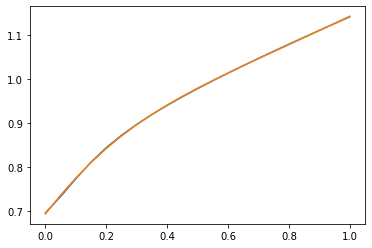

In [ ]:
plt.figure()
iwt = 90
istim,itype = 0,0
plt.plot(x,nr[iwt,:,istim,itype])
plt.plot(x,nra.two_asymptote_fn(x,*params[iwt,istim,itype,:]))

In [ ]:
idir = 2
iconn = 0
nr = network_resps[idir][iconn]

import naka_rushton_analysis as nra
reload(nra)
x = opto_levels#-opto_levels.min()#+1

cache_file = cache_base + "cached_fit_opt_params_two_asymptote_fn_cpl.npy"

# if os.path.exists(cache_file):
#     params_cpl = np.load(cache_file)
# else:
#     params_cpl = np.zeros((nr.shape[0],nr.shape[2],3,6))
#     for istim in range(nr.shape[2]):
#         print(istim)
#         for itype in range(3):
#             params_cpl[:,istim,itype,:],_ = nra.fit_opt_params_two_asymptote_fn(x,nr[:,:,istim,itype])
#     np.save(cache_file, params_cpl)

def compute_params_cpl(x=None, nr=None):
    params_cpl = np.zeros((nr.shape[0],nr.shape[2],3,6))
    for istim in range(nr.shape[2]):
        print(istim)
        for itype in range(3):
            params_cpl[:,istim,itype,:],_ = nra.fit_opt_params_two_asymptote_fn(x,nr[:,:,istim,itype])
    return params_cpl

# params_cpl = ut.compute_or_load_cached(
#     cache_file=cache_file,
#     compute_fn=compute_params_cpl,
#     network_resps=network_resps,
#     mdlses=mdlses,
#     )

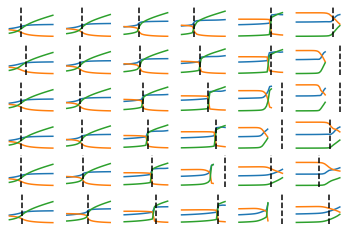

In [ ]:
idir = 2
iconn = 0
istim = 0
itype = 0
iwt = 6
plt.figure()
for istim in range(36):
    plt.subplot(6,6,istim+1)
    for itype in range(3):
        plt.plot(opto_levels,network_resps[idir][iconn][iwt,:,istim,itype])
#         plt.plot(opto_levels,np.nanpercentile(network_resps[idir][iconn][:,:,istim,itype],50,axis=0))
    if not np.isnan(params[iwt,istim,itype,0]):
        plt.axvline(params[iwt,istim,itype,0],c='k',linestyle='dashed')
#     plt.axvline(0,c='k',linestyle='dashed')
    plt.ylim((0,2.5))
    plt.axis('off')

In [ ]:
target_amplitude = params[:,23,0,0]#0.5*params[:,23,0,0] + 0.5*params[:,35,0,0]
target_bin = np.digitize(target_amplitude,opto_levels)-1

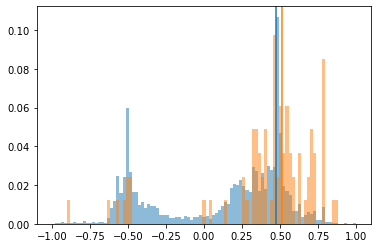

In [ ]:
plt.figure()
ut.bar_pdf(params[:,:,0,0].flatten(),bins=np.linspace(-1,1,100),alpha=0.5)
ut.bar_pdf(params[:,23,0,0],bins=np.linspace(-1,1,100),alpha=0.5)
plt.axvline(np.median(params[:,5::6,0,0]),c='C0')
plt.axvline(np.median(params[:,23,0,0]),c='C1')

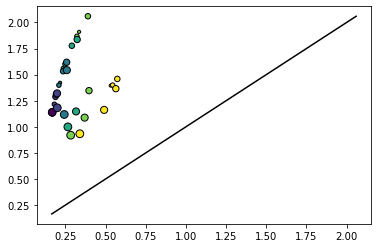

In [ ]:
plt.figure()
idir1 = 0
idir2 = 2
ilight = 3
iconn = 0
itype = 0
iwt = 7
sca.scatter_size_contrast(network_resps[idir1][iconn][iwt,0,:,itype],network_resps[idir2][iconn][iwt,ilight,:,itype],nsize=6,ncontrast=6)

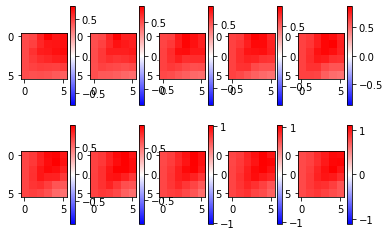

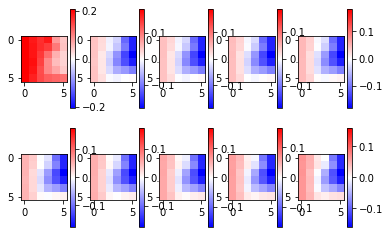

In [ ]:
idir = 2
iconn = 0
ibaseline = 0
lkat = np.nanmax(network_resps[idir][iconn].reshape((network_resps[idir][iconn].shape[0],-1)),axis=1)<5
plt.figure()
for ilight in range(10):
    plt.subplot(2,5,ilight+1)
    ut.imshow_hot_cold(np.nanmean(network_resps[idir][iconn][lkat],0)[:,:,0].reshape((-1,6,6))[ibaseline+ilight]-np.nanmean(network_resps[0][iconn][lkat],0)[:,:,0].reshape((-1,6,6))[ibaseline])#,vmin=0,vmax=1.25)
    plt.colorbar()

idir = 1
plt.figure()
for ilight in range(10):
    plt.subplot(2,5,ilight+1)
    ut.imshow_hot_cold(np.nanmean(network_resps[idir][iconn][lkat],0)[:,:,0].reshape((-1,6,6))[ibaseline-ilight]-np.nanmean(network_resps[0][iconn][lkat],0)[:,:,0].reshape((-1,6,6))[ibaseline])#,vmin=0,vmax=1.25)
    plt.colorbar()

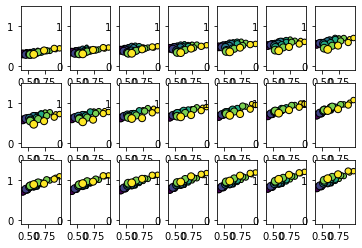

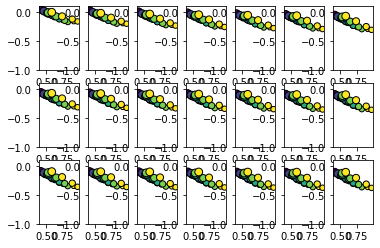

In [ ]:
idir = 2
iconn = 0
ibaseline = 15
itype = 0
# ibaseline = 0
ylim = (-0.1,1.5)
lkat = np.nanmax(network_resps[idir][iconn].reshape((network_resps[idir][iconn].shape[0],-1)),axis=1)<5
plt.figure()
for ilight in range(len(opto_levels)):#15):#
    plt.subplot(3,7,ilight+1)
    xdata = np.nanmean(network_resps[0][iconn][lkat],0)[:,:,itype].reshape((-1,6,6))[ibaseline]
    ydata = np.nanmean(network_resps[idir][iconn][lkat],0)[:,:,itype].reshape((-1,6,6))[ilight]
    sca.scatter_size_contrast(xdata,ydata-xdata,square=False,equality_line=False)#,vmin=0,vmax=1.25)
    plt.ylim(ylim)
#     plt.colorbar()

idir = 1
ylim = (-1,0.1)
plt.figure()
for ilight in range(len(opto_levels)):#15):#
    plt.subplot(3,7,ilight+1)
    xdata = np.nanmean(network_resps[0][iconn][lkat],0)[:,:,itype].reshape((-1,6,6))[ibaseline]
    ydata = np.nanmean(network_resps[idir][iconn][lkat],0)[:,:,itype].reshape((-1,6,6))[ilight]
    sca.scatter_size_contrast(xdata,ydata-xdata,square=False,equality_line=False)#,vmin=0,vmax=1.25)
    plt.ylim(ylim)
#     plt.colorbar()
    

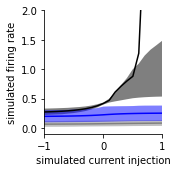

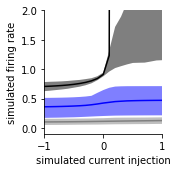

In [ ]:
pct_l,pct_u = 16,84
#YY_opto,YY_opto_no_pcpc,YY_opto_no_pcpv,YY_opto_no_pcvip,YY_opto_no_pcsst,YY_opto_no_vipbias
these_opto_levels = np.linspace(-1.5, 1.5, 31)
# these_opto_levels = opto_levels.copy() # the shape of network_resp, etc., is no longer consistent with opto_levels
idir = 0
network_resp,network_resp_no_pcpc,network_resp_no_pcpv,network_resp_no_pcvip,network_resp_no_pcsst,network_resp_no_vipbias = network_resps[idir]
for istim,title in zip([0,5],['0% contrast','5$^o$ size, 100% contrast']):
    plt.figure(figsize=(2.5,2.5))
#     plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
#     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    #YY_opto,YY_opto_no_pcpc,YY_opto_no_pcpv,YY_opto_no_pcvip,YY_opto_no_pcsst,YY_opto_no_vipbias
    
    plt.plot(these_opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
    plt.fill_between(these_opto_levels,np.nanpercentile(network_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    plt.plot(these_opto_levels,np.nanmean(network_resp_no_pcpc,0)[:,istim,itype],c=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted')
    plt.fill_between(these_opto_levels,np.nanpercentile(network_resp_no_pcpc,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcpc,pct_u,axis=0)[:,istim,itype],facecolor=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)
    
    plt.plot(these_opto_levels,np.nanmean(network_resp_no_pcpv,0)[:,istim,itype],c=np.array((0,0,1)),label='PC$\leftrightarrow$PC weights deleted')
    plt.fill_between(these_opto_levels,np.nanpercentile(network_resp_no_pcpv,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcpv,pct_u,axis=0)[:,istim,itype],facecolor=np.array((0,0,1)),label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)
    
    # plt.legend()
    plt.xlim((-1,1))
    plt.ylim((-0.1,2))
    ut.erase_top_right()
    plt.xlabel('simulated current injection')
    plt.ylabel('simulated firing rate')
    # plt.title('PC$\leftrightarrow$PC weights deleted')
    plt.tight_layout()
#     plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpc_stim_%d_no_title.jpg'%istim,dpi=300)
#     plt.title(title)
    plt.tight_layout()
#     plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpc_stim_%d.jpg'%istim,dpi=300)


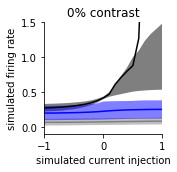

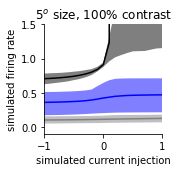

In [ ]:
pct_l,pct_u = 16,84
xlims = [(0.3,0.7),(0.7,1.3)]
ylims = [(0.2,0.6),(0.6,1.3)]
these_opto_levels = np.linspace(-1.5, 1.5, 31)
# these_opto_levels = opto_levels.copy() # the shape of network_resp, etc., is no longer consistent with opto_levels
for istim,title,xlim,ylim in zip([0,5],['0% contrast','5$^o$ size, 100% contrast'],xlims,ylims):
    plt.figure(figsize=(2.5,2.5))
#     plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
#     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    plt.plot(these_opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
    plt.fill_between(these_opto_levels,np.nanpercentile(network_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
    
    plt.plot(these_opto_levels,np.nanmean(network_resp_no_pcpc,0)[:,istim,itype],c=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted')
    plt.fill_between(these_opto_levels,np.nanpercentile(network_resp_no_pcpc,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcpc,pct_u,axis=0)[:,istim,itype],facecolor=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)
    
    plt.plot(these_opto_levels,np.nanmean(network_resp_no_pcpv,0)[:,istim,itype],c=np.array((0,0,1)),label='PC$\leftrightarrow$PV weights deleted')
    plt.fill_between(these_opto_levels,np.nanpercentile(network_resp_no_pcpv,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcpv,pct_u,axis=0)[:,istim,itype],facecolor=np.array((0,0,1)),label='PC$\leftrightarrow$PV weights deleted',alpha=0.5)
    
    # plt.legend()
#     plt.xlim(xlim)
#     plt.ylim(ylim)
    plt.xlim((-1,1))
    plt.ylim((-0.1,1.5))
    ut.erase_top_right()
    plt.xlabel('simulated current injection')
    plt.ylabel('simulated firing rate')
    # plt.title('PC$\leftrightarrow$PC weights deleted')
    plt.tight_layout()
#     plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpv_stim_%d_no_title.jpg'%istim,dpi=300)
    plt.title(title)
    plt.tight_layout()
#     plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpv_stim_%d.jpg'%istim,dpi=300)


In [ ]:
import sim_utils
def this_gen_size_tuning(flsc):
    shp = flsc.shape
    rflsc = flsc.reshape((shp[0]*shp[1],shp[2],shp[3]))
    size_tuning = sim_utils.gen_size_tuning(rflsc).reshape((shp[0],shp[1],shp[2]+1,shp[3]))
    return size_tuning

(188, 7, 6)
(188, 7, 6)


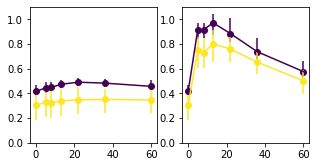

In [ ]:
usize = np.array((5,8,13,22,36,60))
usize0 = np.array((0,5,8,13,22,36,60))
ilights = [ibaseline,ibaseline-5]
nlights = len(ilights)
plt.figure(figsize=(5,2.5))
for iicontrast,icontrast in enumerate([1,5]):
    plt.subplot(1,2,iicontrast+1)
    ydata = this_gen_size_tuning(network_resp[:,ilights][:,:,:,itype].reshape((nwt,nlights,6,6)))[:,:,:,icontrast]
    ut.plot_pct_errorbars_hillel(usize0,ydata)
    plt.ylim((0,1.1))

(188, 7, 6)
(188, 7, 6)


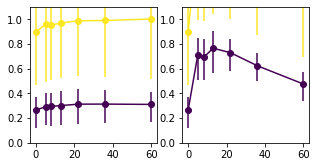

In [ ]:
ibaseline=3
usize = np.array((5,8,13,22,36,60))
usize0 = np.array((0,5,8,13,22,36,60))
ilights = [ibaseline,ibaseline-5]
nlights = len(ilights)
plt.figure(figsize=(5,2.5))
for iicontrast,icontrast in enumerate([1,5]):
    plt.subplot(1,2,iicontrast+1)
    ydata = this_gen_size_tuning(network_resp[:,ilights][:,:,:,itype].reshape((nwt,nlights,6,6)))[:,:,:,icontrast]
    ut.plot_pct_errorbars_hillel(usize0,ydata)
    plt.ylim((0,1.1))


In [ ]:
# import calnet.utils
# from importlib import reload
# reload(calnet.utils)
cache_file = cache_base + 'couplingses_Xcouplingses.pkl'
def compute_couplingses_Xcouplingses(**kwargs):
    network_resps = kwargs['network_resps']
    mdlses = kwargs['mdlses']
    couplingses = [[None for _ in network_resps[idir]] for idir in range(3)]
    for idir in range(3):
        for iconn in range(len(network_resps[idir])):
            couplingses[idir][iconn] = utils.compute_couplings(network_resps[idir][iconn],mdlses[iconn])
            
    Xcouplingses = [[None for _ in network_resps[idir]] for idir in range(3)]
    for idir in range(3):
        for iconn in range(len(network_resps[idir])):
            Xcouplingses[idir][iconn] = utils.compute_Xcouplings(network_resps[idir][iconn],mdlses[iconn])
    result = {}
    result['couplingses'] = couplingses
    result['Xcouplingses'] = Xcouplingses
    return result
result = ut.compute_or_load_cached(
    cache_file=cache_file,
    compute_fn=compute_couplingses_Xcouplingses,
    network_resps=network_resps,
    mdlses=mdlses,
    )
couplingses = result['couplingses']
Xcouplingses = result['Xcouplingses']


loading from cache...


loading from cache...


(-1.0, 1.0)

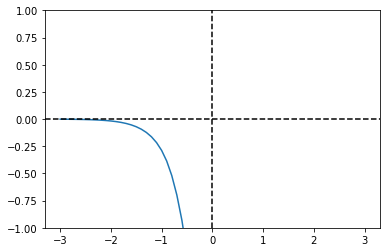

In [ ]:
# reload(calnet.utils)
this_nopto = 61
opto_mag = np.linspace(-3,3,this_nopto)
def compute_opto_coupling(mdlses, opto_mag):
    this_nopto = 61
    opto_coupling = np.zeros((nwt,this_nopto,6,6))
    for iwt in range(nwt):
        idir,iconn,ilight = 0,0,0
        i,j = 4,0
        tgt = couplingses[idir][iconn][iwt][ilight][0,0,i,j]
        for iopto in range(this_nopto):
            opto_coupling[iwt,iopto] = utils.compute_coupling_perturb_WW(mdlses[0][iwt],4,0,opto_mag[iopto])
    return opto_coupling
    
opto_coupling = ut.compute_or_load_cached(
    cache_file=cache_base + 'opto_coupling.npy',
    compute_fn=compute_opto_coupling,
    mdlses=mdlses,
    opto_mag=opto_mag,
)

plt.figure()
plt.plot(opto_mag,opto_coupling[iwt,:,4,5])
plt.axhline(0,c='k',linestyle='dashed')
plt.axvline(0,c='k',linestyle='dashed')
plt.ylim(-1,1)


In [ ]:
def compute_dw_to_zero(mdlses=None, couplingses=None):
    iconn = 0
    idir = 0
    ilight = 0
    i,j = 4,0
    nsize,ncontrast = 6,6
    dw_to_zero,cpl = [np.zeros((nwt,nsize,ncontrast)) for _ in range(2)]
    for iwt in range(nwt):
        tgt = couplingses[idir][iconn][iwt][ilight][0,0,i,j]
        print(iwt)
        for isize in range(nsize):
            for icontrast in range(ncontrast):
    #             istim = np.ravel_multi_index((isize,icontrast),(nsize,ncontrast))
                dw_to_zero[iwt,isize,icontrast],cpl[iwt,isize,icontrast] = utils.zero_coupling_optimize_dWW(mdlses[iconn][iwt],isize,icontrast,i,j,tgt=tgt)
    return dw_to_zero,cpl
cache_file = (cache_base + 'connection_deletion_sim_opto_layer4_dw_to_zero.pkl')
dw_to_zero,cpl = ut.compute_or_load_cached(
    cache_file=cache_file,
    compute_fn=compute_dw_to_zero,
    mdlses=mdlses,
    couplingses=couplingses,
    )

loading from cache...


In [ ]:
def compute_ilight_drmax(couplingses=None):
    ilight_drmax = [[None for _ in couplingses[idir]] for idir in range(3)]
    i,j = 4,0
    for idir in range(3):
        ilight_drmax[idir] = [None for _ in couplingses[idir]]
        for iconn in range(len(network_resps[idir])):
            # shape: (94, 31, 6, 6, 8, 8)
            zero_contrast = couplingses[idir][iconn][:,:,:,0,i,j].max(2)
            full_contrast = couplingses[idir][iconn][:,:,:,-1,i,j].min(2)
            ilight_drmax[idir][iconn] = np.argmax(zero_contrast - full_contrast,axis=1)
    return ilight_drmax
cache_file = (cache_base + 'ilight_drmax.pkl')
ilight_drmax = ut.compute_or_load_cached(
    cache_file=cache_file,
    compute_fn=compute_ilight_drmax,
    couplingses=couplingses,
    )

loading from cache...


In [ ]:
def compute_YY_opto(mdlses=None, dw_to_zero=None):
    YY_opto = np.zeros((nwt,2,nN,nQ*nS*nT))
    for iwt in range(nwt):
        print(iwt)
        for ilight in range(2):
            YY_opto[iwt,ilight] = utils.compute_YY_dw_mdl(mdlses[0][iwt],4,0,ilight*dw_to_zero[iwt].flatten())
    return YY_opto
cache_file = cache_base + 'YY_opto.npy'
YY_opto = ut.compute_or_load_cached(
    cache_file=cache_file,
    compute_fn=compute_YY_opto,
    mdlses=mdlses,
    dw_to_zero=dw_to_zero,
    )

loading from cache...


In [ ]:
network_resps[0][iconn].shape

In [ ]:
nsize, ncontrast = 6, 6

def compute_slope_intercept_res(xdata,ydata):
    xdata_norm = xdata/xdata.mean()[np.newaxis,np.newaxis]
    ydata_norm = ydata/xdata.mean()[np.newaxis,np.newaxis]
    slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())
    pred = slope*xdata_norm + intercept
    actual = (ydata_norm-xdata_norm)
    residual = actual - pred
    return slope,intercept,residual

def compute_slope_intercept_res_reshape(xdata,ydata):
    slope, intercept, residual = compute_slope_intercept_res(xdata,ydata)
    residual = residual.reshape((nsize, ncontrast))
    return slope,intercept,residual

def reshape_resps(network_resps, iconn=0):
    nopto = network_resps[1][0].shape[1]
    baseline = network_resps[0][iconn][:,ibaseline,:,:].reshape((-1, 1, nsize, ncontrast, ntypes))
    down = network_resps[1][iconn][:,:,:,:].reshape((-1, nopto, nsize, ncontrast, ntypes))
    up = network_resps[2][iconn][:,:,:,:].reshape((-1, nopto, nsize, ncontrast, ntypes))
    return baseline, down, up

def compute_slope_intercept_res_arr(network_resps):
    nconn = 6
    ndir = 2
    nopto = network_resps[1][0].shape[1]
    slope,intercept,res = [[[None for idir in range(ndir)] for iconn in range(nconn)] for _ in range(3)]
    for iconn in range(6):
        # (nfiles,nopto,nsize,ncontrast,ntypes)
        # xdata = network_resps[1][iconn][:,:,:,:].reshape((-1,nopto,nsize,ncontrast,ntypes)) # halo
        # ydata = network_resps[2][iconn][:,:,:,:].reshape((-1,nopto,nsize,ncontrast,ntypes)) # chrimson
        # # (nfiles,1,nsize,ncontrast,ntypes)
        # zdata = network_resps[0][iconn][:,:,:,:].reshape((-1,1,nsize,ncontrast,ntypes)) # ctrl
        zdata, xdata, ydata = reshape_resps(network_resps, iconn=iconn) # zdata: ctrl, xdata: halo, ydata: chrimson
        nfits = xdata.shape[0]
        for idir in range(2):
            slope[iconn][idir] = np.zeros(ydata.shape[:2]+ydata.shape[-1:])
            intercept[iconn][idir] = np.zeros(ydata.shape[:2]+ydata.shape[-1:])
            res[iconn][idir] = np.zeros(ydata.shape)
            for itype in range(ntypes):
                for ifit in range(nfits):
                    for iopto in range(nopto):
                        if idir==0:
                            (
                                slope[iconn][idir][ifit,iopto,itype],
                                intercept[iconn][idir][ifit,iopto,itype],
                                res[iconn][idir][ifit,iopto,:,:,itype]
                            ) = compute_slope_intercept_res_reshape(zdata[ifit,0,:,:,itype],xdata[ifit,iopto,:,:,itype])
                        if idir==1:
                            (
                                slope[iconn][idir][ifit,iopto,itype],
                                intercept[iconn][idir][ifit,iopto,itype],
                                res[iconn][idir][ifit,iopto,:,:,itype]
                            ) = compute_slope_intercept_res_reshape(zdata[ifit,0,:,:,itype],ydata[ifit,iopto,:,:,itype])
                        # res[iconn][idir][ifit,iopto,:,:,itype] = this_res.reshape((6,6))
    return slope, intercept, res

def compute_slope_intercept_res_dict(network_resps=None):
    slope, intercept, res = compute_slope_intercept_res_arr(network_resps)
    output_dict = {
        'slope': slope,
        'intercept': intercept,
        'res': res,
    }
    return output_dict

def compute_ilight_resmax(network_resps=None):
    nopto = network_resps[1][0].shape[1]#11 # number of opto stimuli; 11 seems out of date
    slope,intercept,res = [[[None for idir in range(2)] for iconn in range(6)] for _ in range(3)]
    ilight_resmax = [None for idir in range(3)]
    ndir = 3
    for idir in range(ndir):
        ilight_resmax[idir] = [None for iconn in range(6)]
    slope, intercept, res = compute_slope_intercept_res_arr(network_resps)
    sir_dict = ut.compute_or_load_cached(
        cache_file=cache_base + 'sir_dict.pkl',
        compute_fn=compute_slope_intercept_res_dict,
        network_resps=network_resps,
        # invalidate_caches=True,
    )
    slope, intercept, res = sir_dict['slope'], sir_dict['intercept'], sir_dict['res']
    nconn = len(slope)
    itype = 0
    for iconn in range(nconn):
        for idir in range(ndir-1):
            ilight_resmax[idir+1][iconn] = np.argmax(np.abs(res[iconn][idir]).sum(2).sum(2),axis=1)[:,itype]
        ilight_resmax[0][iconn] = np.zeros_like(ilight_resmax[1][iconn])
    result = {'slope':slope,'intercept':intercept,'res':res,'ilight_resmax':ilight_resmax}
    return result
cache_file = (cache_base + 'ilight_resmax.pkl')
result = ut.compute_or_load_cached(
    cache_file=cache_file,
    compute_fn=compute_ilight_resmax,
    network_resps=network_resps,
    )
slope = result['slope']
intercept = result['intercept']
res = result['res']
ilight_resmax = result['ilight_resmax']

loading from cache...


In [ ]:
cache_file = (cache_base + 'ilight_resmax.pkl')
result = ut.compute_or_load_cached(
    cache_file=cache_file,
    compute_fn=compute_ilight_resmax,
    network_resps=network_resps,
    )
slope = result['slope']
intercept = result['intercept']
res = result['res']

loading from cache...


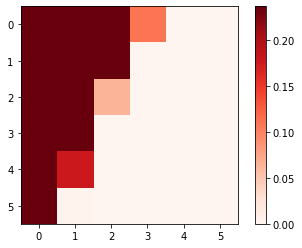

In [ ]:
plt.figure()
plt.imshow(cpl[2])
plt.colorbar()

In [ ]:
couplingses[0][0].shape

(94, 31, 6, 6, 8, 8)

In [ ]:
cpl[0]

array([[ 9.66581566e-02,  9.66611554e-02,  9.66637876e-02,
        -2.31308360e-05,  9.66584610e-02,  8.86731326e-03],
       [ 9.66639647e-02,  9.66633194e-02,  9.66577927e-02,
        -2.16993683e-05, -1.70048872e-05,  2.13037088e-02],
       [ 9.66609733e-02,  9.66655715e-02, -2.37008279e-05,
        -1.57327300e-05,  9.66632870e-02, -7.00529039e-02],
       [ 9.66615587e-02,  9.66635800e-02, -3.12808008e-05,
         9.66629397e-02,  9.66666249e-02, -9.82459019e-03],
       [ 9.66637046e-02,  9.66581688e-02,  9.66635239e-02,
         9.66655799e-02,  9.66636968e-02,  9.66648687e-02],
       [ 9.66637020e-02,  9.66612782e-02,  9.66637227e-02,
         9.66634918e-02,  9.66634164e-02,  9.66678311e-02]])

In [ ]:
i,j = 4,0
couplingses[idir][iconn][iwt][ilight][0,0,i,j]

1.242738523507432

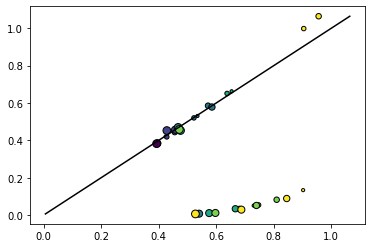

In [ ]:
itype = 0
iwt = 4
nsize,ncontrast = 6,6
plt.figure()
sca.scatter_size_contrast(YY_opto[iwt,0,:,0].reshape((nsize,ncontrast)),YY_opto[iwt,1,:,0].reshape((nsize,ncontrast)))

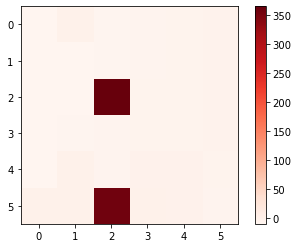

In [ ]:
iwt = 7
plt.figure()
plt.imshow(dw_to_zero[iwt])
plt.colorbar()

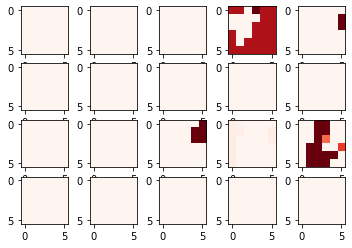

In [ ]:
plt.figure()
for iwt in range(20):
    tgt = couplingses[idir][iconn][iwt][ilight][0,0,i,j]
    plt.subplot(4,5,iwt+1)
    plt.imshow(cpl[iwt],vmin=tgt-0.1,vmax=tgt+0.1)
#     plt.colorbar()

In [ ]:
dw_to_zero[iwt].flatten().shape

(36,)

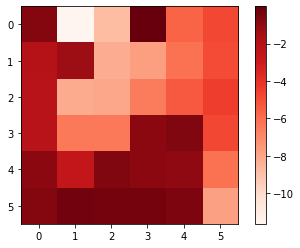

In [ ]:
iwt = 1
plt.figure()
plt.imshow(dw_to_zero[iwt])
plt.colorbar()

(-1.0, 1.0)

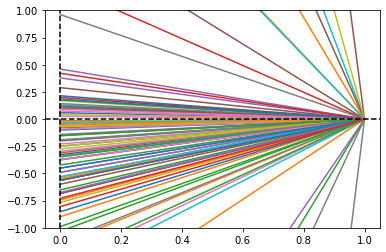

In [ ]:
plt.figure()
this_nopto = 61
opto_coupling = np.zeros((2,6,6))
for iwt in range(len(mdlses[0])):
    opto_coupling[0] = utils.compute_coupling_mdl(mdlses[0][iwt])[0,:,:,4,0]
    opto_coupling[1] = utils.compute_coupling_zero_K(mdlses[0][iwt])[:,:,4,0]
    plt.plot(opto_coupling[:,4,5])
plt.axhline(0,c='k',linestyle='dashed')
plt.axvline(0,c='k',linestyle='dashed')
plt.ylim(-1,1)

In [ ]:
utils.compute_coupling_zero_K(mdlses[0][iwt]).shape

(6, 6, 8, 8)

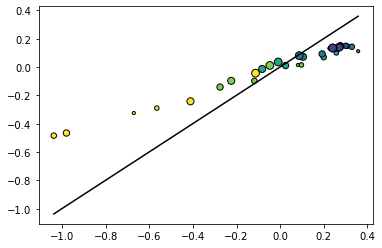

In [ ]:
plt.figure()
ifit = 0
itype = 2
idir = 1
iconn = 0
i,j = 4,0
# sca.scatter_size_contrast(network_resps[idir][iconn][ifit,0,:,itype],network_resps[idir][iconn][ifit,5,:,itype],nsize=6,ncontrast=6)
sca.scatter_size_contrast(couplingses[idir][iconn][ifit,0,:,:,i,j],couplingses[idir][iconn][ifit,5,:,:,i,j],nsize=6,ncontrast=6)


In [ ]:
idir,iconn,i,j = 0,0,4,0
couplingses[idir][iconn][:,:,:,0,i,j].max(2)-couplingses[idir][iconn][:,:,:,-1,i,j].min(2)

In [ ]:
ilight_drmax[2][0]

slope: -0.547826, pval: 0.00E+00
0.12821156812745216
baseline,halo,size 0,frac. >0: 0.561798
p-value:
WilcoxonResult(statistic=1847.0, pvalue=0.5246464780347189)
baseline,halo,size 5,frac. >0: 0.022472
p-value:
WilcoxonResult(statistic=11.0, pvalue=3.7044382273599564e-16)
slope: 0.397991, pval: 2.60E-08
0.2548899446482812
baseline,chrimson,size 0,frac. >0: 0.505618
p-value:
WilcoxonResult(statistic=1858.0, pvalue=0.5543898253755807)
baseline,chrimson,size 5,frac. >0: 0.696629
p-value:
WilcoxonResult(statistic=802.0, pvalue=9.032566346873514e-07)
slope: -0.680681, pval: 0.00E+00
0.008436637371726485
pcpv_deleted,halo,size 0,frac. >0: 0.471910
p-value:
WilcoxonResult(statistic=1798.0, pvalue=0.4027759606714839)
pcpv_deleted,halo,size 5,frac. >0: 0.258427
p-value:
WilcoxonResult(statistic=782.0, pvalue=5.931040891432279e-07)
slope: 1.588194, pval: 0.00E+00
0.012620103777007069
pcpv_deleted,chrimson,size 0,frac. >0: 0.505618
p-value:
WilcoxonResult(statistic=1970.0, pvalue=0.89421891278421

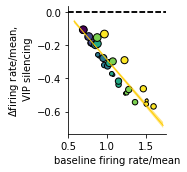

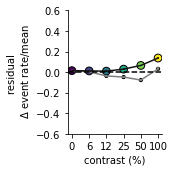

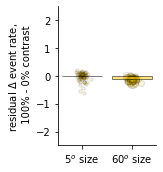

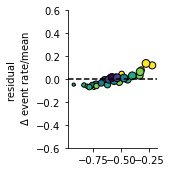

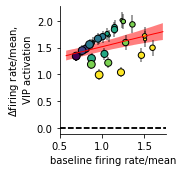

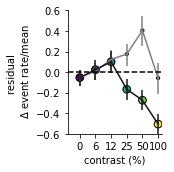

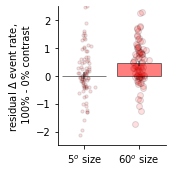

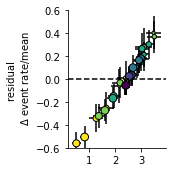

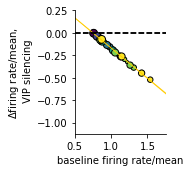

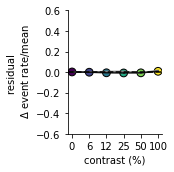

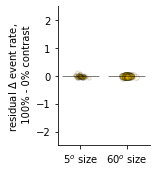

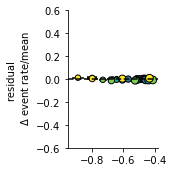

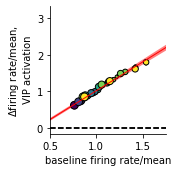

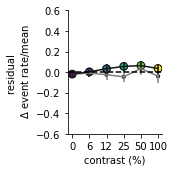

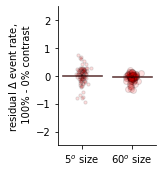

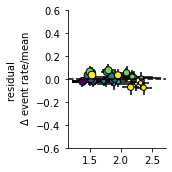

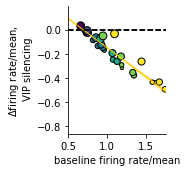

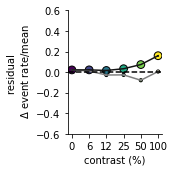

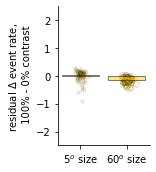

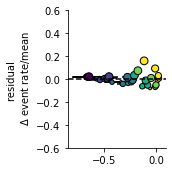

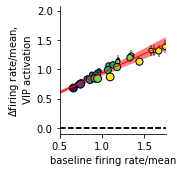

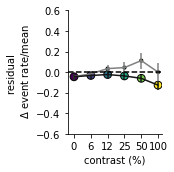

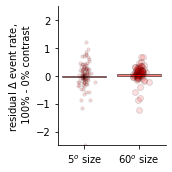

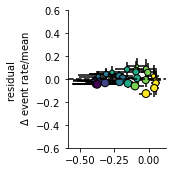

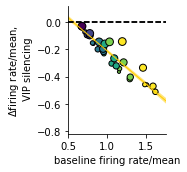

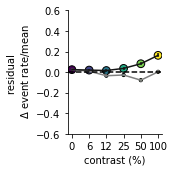

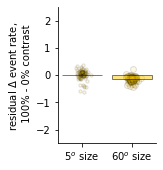

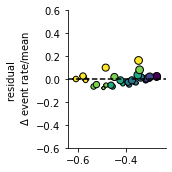

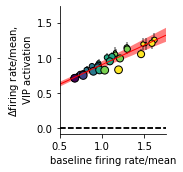

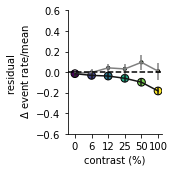

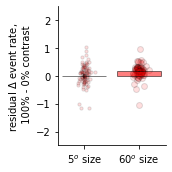

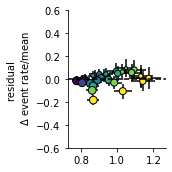

In [ ]:
save_fig = True

# 6 parameters: x0,a1,b1,a2,b2,lam; crossing over x-value, slope+intercepts at 
# left and right asymptotes, and x-value scaling factor
this_target_amplitude = np.nanmean(params[:,5::6,0,0],axis=1) # x0, pc sigmoid
# this_target_amplitude = np.nanmean(params[:,:,0,0],axis=1)
this_target_bin = np.maximum(np.digitize(this_target_amplitude,opto_levels)-1,0)

reload(ut)
ibaseline = 15
# ilow = 5
# ihigh = 5
# ibaseline = 1
# ilow = 0
# ihigh = 2

itype2 = 2

ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,8,13,25,36,60))
this_nsize = len(usize)
this_ncontrast = len(ucontrast)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

dot_sizes = 10+np.arange(6)*5

import scipy.stats as sst
import opto_utils
reload(opto_utils)

light_lbls = ['silencing','activation']
opto_lbls = ['halo','chrimson']
conn_lbls = ['baseline','pcpc_deleted','pcpv_deleted','pcvip_deleted','pcsst_deleted','']

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

idir = 2
# lkat = (network_resps[idir][0].max(1).max(1).max(1) < 10)
lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
# lkat = np.ones_like(lkat)

target_bin = this_target_bin.copy()

norm_x_y = scof.norm_x_y

def make_x_dx_plot(xdata, ydata, c=None, light_lbl=None, conn_lbl=None):
    xdata_norm, ydata_norm = norm_x_y(xdata, ydata)
#         sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
    opto_utils.scatter_size_contrast_x_dx_errorbar(np.concatenate((xdata_norm[:,:,:,np.newaxis],ydata_norm[:,:,:,np.newaxis]),axis=-1),opto_color=c)
    plt.axhline(0,c='k',linestyle='dashed')
#     ut.zero_origin('x')
    plt.xlabel('baseline firing rate/mean')
    plt.ylabel('$\Delta$firing rate/mean, \n VIP %s'%light_lbl)
    slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())
    # fit_params = {
    #     'slope':slope,
    #     'intercept':intercept,
    #     'r_value':r_value,
    #     'p_value':p_value,
    #     'std_err':std_err,
    # }
    xs = np.array((xdata_norm.min(),xdata_norm.max()))
    print('slope: %f, pval: %.2E'%(slope,p_value))
#     plt.ylim(ylim)
    plt.xlim((0.5,1.75))
    ut.erase_top_right()
    plt.tight_layout()
    if save_fig:
        plt.savefig(notebook_base+'figures/delta_rate_vs_rate_l4_%s_%s.jpg'%(light_lbl,conn_lbl),dpi=300)

def make_residual_plot(xdata, ydata, c=None, light_lbl=None, conn_lbl=None, these_sizes=None):
    xdata_norm, ydata_norm = norm_x_y(xdata, ydata)

    slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())

    pred = slope*xdata_norm + intercept
    actual = (ydata_norm-xdata_norm)
    residual = actual - pred
#         ut.plot_parametric_fn_errorbars(np.arange(6),actual[:,these_sizes]-pred[:,these_sizes],fit_fn=nra.fit_opt_params_two_asymptote_fn,plot_fn=nra.two_asymptote_fn,colors=c_l23[these_sizes],markersize=0,errorstyle='bs')
#         ut.plot_bootstrapped_errorbars_hillel(np.arange(6),actual[:,these_sizes]-pred[:,these_sizes],colors=c_l23[these_sizes],pct=(16,84),markersize=0)
    ut.plot_bootstrapped_errorbars_hillel(np.arange(6),residual[:,these_sizes],colors=c_l23[these_sizes],pct=(16,84),markersize=0)
    xs = np.arange(6)[np.newaxis] #np.concatenate((np.arange(6)[np.newaxis],np.arange(6)[np.newaxis]),axis=0)#[np.newaxis]
    for this_size in these_sizes:
#             sca.scatter_size_contrast(xs,np.nanmean(actual[:,this_size:this_size+1]-pred[:,this_size:this_size+1],0),equality_line=False,dot_scale=(this_size+1)*10)
        sca.scatter_size_contrast(xs,np.nanmean(residual[:,this_size:this_size+1],0),equality_line=False,dot_scale=(this_size+1)*10)
    plt.axhline(0,c='k',linestyle='dashed')
    plt.xticks(np.arange(this_ncontrast),ucontrast)
    ut.erase_top_right()
    plt.xlabel('contrast (%)')
    plt.ylabel('residual \n $\Delta$ event rate/mean')
    plt.ylim((-0.6,0.6))
#         plt.ylim((-0.2,0.2))
    plt.tight_layout()
    if save_fig:
        plt.savefig(notebook_base+'figures/residual_delta_rate_vs_contrast_l4_%s_%s.eps'%(light_lbl,conn_lbls[iconn]))

    return residual

def make_residual_bar_plot(residual, c=None, dot_sizes=dot_sizes, these_sizes=None, opto_lbl=None, conn_lbl=None, iconn=0, og_d_residual=None):
    d_residual = [residual[:,this_size,0]-residual[:,this_size,-1] for this_size in these_sizes]
    if iconn == 0:
        og_d_residual = d_residual.copy()
    ut.bar_with_dots(d_residual,colors=[c for _ in range(len(these_sizes))], # c <- cs[idir-1]
                        tick_labels=['%d$^o$ size'%u for u in usize[these_sizes]],
                        s=[dot_sizes[isize] for isize in these_sizes],\
                    alpha=0.125,bar_alpha_frac=4)
    plt.ylabel('residual $\Delta$ event rate, \n 100% - 0% contrast')
#         plt.title('%d$^o$ size'%usize[isize])
    ut.erase_top_right()
    plt.tight_layout()
    plt.ylim((-2.5,2.5))
    if save_fig:
        plt.savefig(notebook_base+'figures/sim_residual_vip_%s_effect_%s.jpg'%(opto_lbl,conn_lbl),dpi=300)
    if iconn == 0:
        for isize,this_size in enumerate(these_sizes):
            print('%s,%s,size %d,frac. >0: %f'%(conn_lbl,opto_lbl,this_size,(d_residual[isize]>0).mean()))
            print('p-value:')
            print(sst.wilcoxon(d_residual[isize]))
    else:
        for isize,this_size in enumerate(these_sizes):
            d_d_residual = d_residual[isize] - og_d_residual[isize]
            print('%s,%s,size %d,frac. >0: %f'%(conn_lbl,opto_lbl,this_size,(d_d_residual>0).mean()))
            print('p-value:')
#                 print(sst.wilcoxon(d_residual[isize]))
            print(sst.wilcoxon(d_d_residual))
    if iconn == 0:
        return d_residual
    else:
        return None

def make_residual_vs_residual_plot(xdata, ydata, zdata, wdata, light_lbl=None, conn_lbl=None, these_sizes=None):
    xdata_norm, ydata_norm = norm_x_y(xdata, ydata)
    # wdata_norm = wdata/wdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
    zdata_norm, wdata_norm = norm_x_y(zdata, wdata) # should it be this instead?

    slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())
    slope2, intercept2, r_value, p_value, std_err = sst.linregress((wdata_norm-zdata_norm).flatten(), (ydata_norm-xdata_norm).flatten())
    pred = slope*xdata_norm + intercept
    actual = (ydata_norm-xdata_norm)
    residual = actual - pred
    pred2 = slope2*(wdata_norm-zdata_norm) + intercept2
    residual2 = (wdata_norm-zdata_norm)#actual - pred2
    sca.scatter_size_contrast_errorbar(residual2,residual,equality_line=False,square=False)
#         ut.plot_bootstrapped_errorbars_hillel(np.arange(6),actual[:,these_sizes]-pred[:,these_sizes],colors=c_l23[these_sizes],pct=(16,84),markersize=0)
#         xs = np.arange(6)[np.newaxis] #np.concatenate((np.arange(6)[np.newaxis],np.arange(6)[np.newaxis]),axis=0)#[np.newaxis]
#         for this_size in these_sizes:
#             sca.scatter_size_contrast(xs,np.nanmean(actual[:,this_size:this_size+1]-pred[:,this_size:this_size+1],0),equality_line=False,dot_scale=(this_size+1)*10)
    plt.axhline(0,c='k',linestyle='dashed')
#         plt.xticks(np.arange(this_ncontrast),ucontrast)
    ut.erase_top_right()
#         plt.xlabel('contrast (%)')
    plt.ylabel('residual \n $\Delta$ event rate/mean')
    plt.ylim((-0.6,0.6))
#         plt.ylim((-0.2,0.2))
    plt.tight_layout()
    if False:
        plt.savefig(notebook_base+'figures/residual_delta_rate_vs_contrast_l4_%s_%s.eps'%(light_lbl,conn_lbl))

itype = 0

for iconn in [0,2,3,4]:

#     ilow = 5*np.ones((lkat.sum(),),dtype='int')
#     ihigh = 5*np.ones((lkat.sum(),),dtype='int')
    conn_lbl = conn_lbls[iconn]
    ihigh = int(np.round(np.mean(target_bin[lkat])))#np.minimum(np.maximum(target_bin[lkat],0),20)#np.maximum(target_bin[lkat]-2,15)#ilight_drmax[2][iconn][lkat]
    ilow = ihigh#30-ihigh#4#ilight_drmax[1][iconn][lkat]
    idir = 0
    xdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
    xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
    zdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype2].reshape((-1,6,6))
    zdata_norm = zdata/zdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
    for idir,ilight,light_lbl,c,ylim,opto_lbl in zip([1,2],[ilow,ihigh],light_lbls,cs,ylims,opto_lbls):

        ydata = network_resps[idir][iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
        wdata = network_resps[idir][iconn][lkat][:,:,:,itype2][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
        these_sizes = [0, 5]

        plt.figure(figsize=(2.5,2.5))
        make_x_dx_plot(xdata, ydata, c=c, light_lbl=light_lbl, conn_lbl=conn_lbl)

        these_sizes = [0,5]
        plt.figure(figsize=(2.5,2.5))
        residual = make_residual_plot(xdata, ydata, c=c, light_lbl=light_lbl, conn_lbl=conn_lbl, these_sizes=these_sizes)
            
        plt.figure(figsize=(2.5,2.5))
        if iconn == 0:
            og_d_residual = make_residual_bar_plot(residual, c=c, these_sizes=these_sizes, opto_lbl=opto_lbl, conn_lbl=conn_lbl, iconn=iconn)
        else:
            _ = make_residual_bar_plot(residual, c=c, these_sizes=these_sizes, opto_lbl=opto_lbl, conn_lbl=conn_lbl, iconn=iconn, og_d_residual=og_d_residual)

#         print(sst.ttest_ind(diff_res[0][~np.isnan(diff_res[0])],diff_res[1][~np.isnan(diff_res[1])]))
#         print(sst.ttest_ind(mean_res[0][~np.isnan(mean_res[0])],mean_res[1][~np.isnan(mean_res[1])]))
            
            
        plt.figure(figsize=(2.5,2.5))
        make_residual_vs_residual_plot(xdata, ydata, zdata, wdata, light_lbl=light_lbl, conn_lbl=conn_lbl, these_sizes=these_sizes)
        
            
# #         # bar with dots figure
#         slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())
#         pred = slope*xdata_norm + intercept
#         actual = (ydata_norm-xdata_norm)
#         residual = actual - pred
#         these_sizes = [0,5]

    # plt.figure(figsize=(2.5,2.5))
    # xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
    # ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
    # sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
    # plt.axhline(0,c='k',linestyle='dashed')
    # ut.zero_origin('x')

slope: -0.437111, pval: 0.00E+00


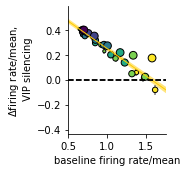

In [ ]:
plt.figure(figsize=(2.5,2.5))

idir = 2
# lkat = (network_resps[idir][0].max(1).max(1).max(1) < 10)
lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])

itype = 1
iconn = 0

conn_lbl = conn_lbls[iconn]

save_fig = True

# for idir,ilight,light_lbl,c,ylim,opto_lbl in zip([1,2],[ilow,ihigh],light_lbls,cs,ylims,opto_lbls):
for idir,ilight,light_lbl,c,ylim,opto_lbl in zip([1,],[ilow,],light_lbls,cs,ylims,opto_lbls):
    xdata = network_resps[0][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
    ydata = network_resps[idir][iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
    make_x_dx_plot(xdata, ydata, c=c, light_lbl=light_lbl, conn_lbl=conn_lbl)

plt.tight_layout()
save_fig = False
if save_fig:
    plt.savefig(notebook_base+'/figures/delta_rate_vs_rate_sst_%s_%s.jpg'%(light_lbl,conn_lbl),dpi=300)
# plt.ylim((-10,10))
# plt.xlim((0.5,1.5))

In [ ]:
ifit = 0
idir = 2
itype = 0
ydata = network_resps[idir][iconn][lkat][:,:,:,itype]

opto_levels_for_max_diff = np.zeros((ydata.shape[0], ydata.shape[2]))

for ifit in range(ydata.shape[0]):
    for istim in range(ydata.shape[2]):
        # compute max diff index
        max_diff_index = np.argmax(np.diff(network_resps[idir][iconn][lkat][:,:,:,itype][ifit, :, istim]))
        opto_levels_for_max_diff[ifit, istim] = 0.5 * (opto_levels[max_diff_index] + opto_levels[max_diff_index+1])

In [ ]:
opto_levels_for_max_diff.shape

(89, 36)

(array([8., 7., 2., 3., 1., 1., 1., 2., 0., 0., 2., 2., 1., 0., 2., 1., 0.,
        2., 0., 1.]),
 array([0.10533708, 0.1275    , 0.14966292, 0.17182584, 0.19398876,
        0.21615169, 0.23831461, 0.26047753, 0.28264045, 0.30480337,
        0.32696629, 0.34912921, 0.37129213, 0.39345506, 0.41561798,
        0.4377809 , 0.45994382, 0.48210674, 0.50426966, 0.52643258,
        0.54859551]),
 <BarContainer object of 20 artists>)

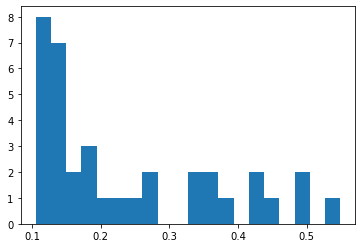

In [ ]:
plt.figure()
plt.hist(opto_levels_for_max_diff.mean(0), bins=20)

<AxesSubplot:label='ed57c532-47d7-4943-8a51-9d7453257795', ylabel='#sigmoid midpoints at\ncurrent inj. magnitude'>

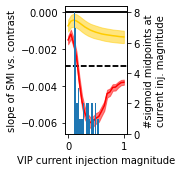

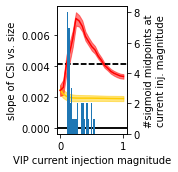

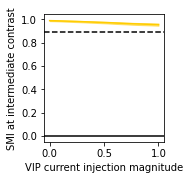

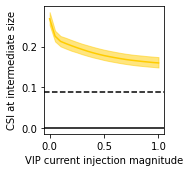

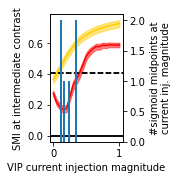

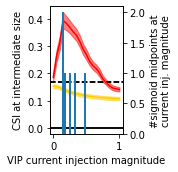

In [ ]:
# compute slope of smi vs. contrast or csi vs. size, then compare that slope as a function of current injection magnitude
# itype = 0
# idir = 0
# iconn = 0
# smi = scf.smi_fn(network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6)), avg_last=False)
# csi = scf.csi_fn(network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6)), avg_last=False)
# # this_target_bin = int(np.round(np.mean(target_bin[lkat]))) #(np.round(np.mean(target_bin[lkat])) * np.ones((target_bin[lkat].shape[0],))).astype('int')
# opt = {'save': False}

from typing import Optional


def compute_mimis(network_resps, ibaseline=ibaseline, lkat=lkat):
    itype = 0
    idir = 0
    iconn = 0
    xdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
    nlight = network_resps[1][iconn].shape[1]
    fn_dict = {'smi': scf.smi_fn, 'csi': scf.csi_fn}
    first_ind_dict = {'smi': 1, 'csi': 0}
    xaxis_dict = {'smi': ucontrast, 'csi': usize}
    mimi_dict = {}
    for key in ['smi', 'csi']:
        mimis = np.zeros((2, lkat.sum(), 2, nlight))
        for idir in [1,2]:
            for ilight in range(nlight):
                ydata = network_resps[idir][iconn][lkat][:,:,:,itype][:,ilight].reshape((-1,6,6))
                mimis[idir-1, :, :, ilight] = scof.compute_mimis(xdata, ydata, average=False, norm_first=True, mi_fn=fn_dict[key],
                    first_ind=first_ind_dict[key], xaxis=xaxis_dict[key])#, **opt)
        mimi_dict[key] = mimis
    return mimi_dict

INTERMEDIATE_STIM_LEVEL = 3

def compute_mis(network_resps, ibaseline=ibaseline, lkat=lkat, itype=1):
    idir = 0
    iconn = 0
    xdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
    nlight = network_resps[1][iconn].shape[1]
    fn_dict = {'smi': scf.smi_fn, 'csi': scf.csi_fn}
    first_ind_dict = {'smi': 1, 'csi': 0}
    xaxis_dict = {'smi': ucontrast, 'csi': usize}
    mi_dict = {}
    for key in ['smi', 'csi']:
        mis = np.zeros((2, lkat.sum(), 2, nlight))
        for idir in [1,2]:
            for ilight in range(nlight):
                ydata = network_resps[idir][iconn][lkat][:,:,:,itype][:,ilight].reshape((-1,6,6))
                arr = scof.compute_mis(xdata, ydata, average=False, 
                    norm_first=True, mi_fn=fn_dict[key])[:, first_ind_dict[key]:, :].mean(1)
                arr = scof.compute_mis(xdata, ydata, average=False, 
                    norm_first=True, mi_fn=fn_dict[key])[:, INTERMEDIATE_STIM_LEVEL, :]
                # print(arr.shape)
                mis[idir-1, :, :, ilight] = arr
        mi_dict[key] = mis
    return mi_dict

mimi_dict = compute_mimis(network_resps)

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

def plot_hist_of_sigmoid_midpoints(ax, opto_levels_for_max_diff, stimuli_to_plot):
    hist_ax = ax.twinx()
    assert stimuli_to_plot in ['all', 'intermediate_contrast', 'intermediate_size'], f"{stimuli_to_plot} not recognized"
    if stimuli_to_plot == 'all':
        midpoint_values = opto_levels_for_max_diff.mean(0)
        bins = 20
    else:
        nsize, ncontrast = 6, 6
        assert opto_levels_for_max_diff.shape[1] == nsize * ncontrast
        midpoint_values = opto_levels_for_max_diff.reshape((-1, nsize, ncontrast))
        if stimuli_to_plot == 'intermediate_contrast':
            # compute smi at intermediate contrast
            midpoint_values = midpoint_values[:, :, INTERMEDIATE_STIM_LEVEL].mean(0)
        else:
            assert stimuli_to_plot == 'intermediate_size'
            # compute csi at intermediate size
            midpoint_values = midpoint_values[:, INTERMEDIATE_STIM_LEVEL, :].mean(0)
        bins = 10

    hist_ax.hist(midpoint_values, bins=bins)
    hist_ax.set_ylabel('#sigmoid midpoints at\ncurrent inj. magnitude')
    return hist_ax

save_fig = True#True
subtract_light_off = False
def plot_mis_by_opto_level(opto_levels, mimi_dict, save_fig=False, cs=None, subtract_light_off=False, prefix='',
    is_mimi=True, dirs=np.arange(2), include_hist: bool = False, show_zero: bool = False):
    for key in ['smi', 'csi']:
        plt.figure(figsize=(2.5, 2.5))
        for idir in dirs:
            vals = mimi_dict[key][idir, :, 1, :]
            if subtract_light_off:
                vals = vals - mimi_dict[key][idir, :, 0, :]
                plt.axhline(0, c='k', linestyle='dashed')
            else:
                plt.axhline(np.nanmean(mimi_dict[key][idir, :, 0, :]), c='k', linestyle='dashed')
                if show_zero:
                    plt.axhline(0, c='k', linestyle='solid')
            lb, ub, mn = ut.bootstrap(vals, fn=np.nanmean, axis=0, pct=(16, 84, 50))
            plt.fill_between(opto_levels, lb, ub, color=cs[idir], alpha=0.5)
            plt.plot(opto_levels, mn, color=cs[idir])#, label=light_lbls[idir])
        plt.xlabel('VIP current injection magnitude')
        xvar = ('contrast' if key=='smi' else 'size')
        if is_mimi:
            plt.ylabel('slope of %s vs. %s' % (key.upper(), xvar))
        else:
            plt.ylabel(f'{key.upper()} at intermediate {xvar}')

        ax = plt.gca()
#         ut.erase_top_right(ax)

        if include_hist:
            if is_mimi:
                stimuli_to_plot = "all"
            elif key == "smi":
                stimuli_to_plot = "intermediate_contrast"
            else:
                stimuli_to_plot = "intermediate_size"
            hist_ax: Optional[plt.axis] = plot_hist_of_sigmoid_midpoints(ax, opto_levels_for_max_diff, stimuli_to_plot)
          #  ut.erase_top(hist_ax)
        else:
            hist_ax = None

        # plt.legend()
        plt.tight_layout()

        if save_fig:
            plt.savefig(notebook_base+f'/figures/{prefix}{key}mi_vs_injected_current_magnitude.jpg', dpi=300)
            plt.savefig(notebook_base+f'/figures/{prefix}{key}mi_vs_injected_current_magnitude.png')
    return hist_ax
plot_mis_by_opto_level(opto_levels, mimi_dict, save_fig=save_fig, cs=cs, subtract_light_off=False,
                       include_hist=True, show_zero=True)

mi_dict = compute_mis(network_resps, itype=1)
plot_mis_by_opto_level(opto_levels, mi_dict, save_fig=save_fig, cs=cs, subtract_light_off=False, 
    is_mimi=False, dirs=np.arange(1), prefix='sst_just_mi_', include_hist=False, show_zero=True)

mi_dict = compute_mis(network_resps, itype=0)
plot_mis_by_opto_level(opto_levels, mi_dict, save_fig=save_fig, cs=cs, include_hist=True, subtract_light_off=False, 
    is_mimi=False, prefix='pc_just_mi_', show_zero=True)

        # plt.figure()
        # plt.hist(mimis[:, 0], bins=20, alpha=0.5, label='smi light off')
        # plt.hist(mimis[:, 1], bins=20, alpha=0.5, label='smi light on')

In [ ]:
# subtract_light_off = True
# plt.figure()
# for idir in range(2):
#     vals = mimis[idir, :, 1, :]
#     if subtract_light_off:
#         vals = vals - mimis[idir, :, 0, :]
#         plt.axhline(0, c='k', linestyle='dashed')
#     else:
#         plt.axhline(np.nanmean(mimis[idir, :, 0, :]), c='k', linestyle='dashed')
#     lb, ub, mn = ut.bootstrap(vals, fn=np.nanmean, axis=0, pct=(16, 84, 50))
#     plt.fill_between(np.arange(nlight), lb, ub, color=cs[idir], alpha=0.5)
#     plt.plot(mn, color=cs[idir], label=light_lbls[idir])

loading from cache...


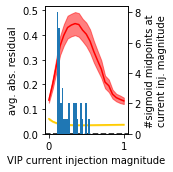

In [ ]:
save_fig = True
cache_file = (cache_base + 'ilight_resmax.pkl')
result = ut.compute_or_load_cached(
    cache_file=cache_file,
    compute_fn=compute_ilight_resmax,
    network_resps=network_resps,
    )
slope = result['slope']
intercept = result['intercept']
res = result['res']

plt.figure(figsize=(2.5,2.5))
iconn = 0
itype = 0
for idir in range(2):
    vals = np.abs(res[iconn][idir][lkat][:, :, :, :, itype]).mean(-1).mean(-1)
    lb, ub, mn = ut.bootstrap(vals, fn=np.nanmean, axis=0, pct=(16, 84, 50))
    plt.fill_between(opto_levels, lb, ub, color=cs[idir], alpha=0.5)
    plt.plot(opto_levels, mn, color=cs[idir], label=light_lbls[idir])
ut.zero_origin()
residual_ax = plt.gca()
residual_ax.set_xlabel('VIP current injection magnitude')
residual_ax.set_ylabel('avg. abs. residual')
residual_ax.axhline(0, c='k', linestyle='dashed')
# ut.erase_top_right(residual_ax)
show_hist = True
if show_hist:
    hist_ax = plot_hist_of_sigmoid_midpoints(residual_ax, opto_levels_for_max_diff, "all")
#     ut.erase_top(hist_ax)
plt.tight_layout()
if save_fig:
    plt.savefig(notebook_base+f'/figures/avg_abs_res_vs_injected_current_magnitude.jpg', dpi=300)

In [ ]:
cache_base

'/Users/agos/Dropbox/ColumbiaProjects/Project_DansPaper/mossing_paper_code/cached/connection_deletion_sim_opto_layer4_'

loading from cache...


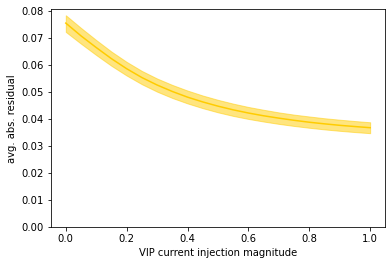

In [ ]:
cache_file = (cache_base + 'ilight_resmax.pkl')
# os.remove(cache_file)
result = ut.compute_or_load_cached(
    cache_file=cache_file,
    compute_fn=compute_ilight_resmax,
    network_resps=network_resps,
    )
slope = result['slope']
intercept = result['intercept']
res = result['res']

plt.figure()
iconn = 0
itype = 1
for idir in range(1):
    vals = np.abs(res[iconn][idir][lkat][:, :, :, :, itype]).mean(-1).mean(-1)
    lb, ub, mn = ut.bootstrap(vals, fn=np.nanmean, axis=0, pct=(16, 84, 50))
    plt.fill_between(opto_levels, lb, ub, color=cs[idir], alpha=0.5)
    plt.plot(opto_levels, mn, color=cs[idir], label=light_lbls[idir])
ut.zero_origin()
plt.xlabel('VIP current injection magnitude')
plt.ylabel('avg. abs. residual')
plt.savefig(notebook_base+f'/figures/avg_abs_res_vs_injected_current_magnitude.png')

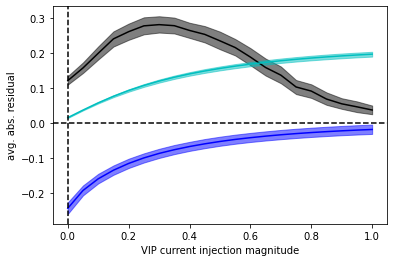

In [ ]:
limit_xlim = False

save_fig = False

i1, j1 = 0, -1
i2, j2 = -1, -1
itype = 0
plot_slope_intercept = True
plot_examples = True

i1, j1 = 3, 0#0, 0
i2, j2 = 3, 5
itype = 1
plot_slope_intercept = False
plot_examples = True

plt.figure()
iconn = 0
for idir in range(1, 2):
    transform_fn = lambda x: x
    transform_fn = np.abs
    vals = transform_fn(res[iconn][idir][lkat][:, :, :, :, itype]).mean(-1).mean(-1)
    lb, ub, mn = ut.bootstrap(vals, fn=np.nanmean, axis=0, pct=(16, 84, 50))
    plt.fill_between(opto_levels, lb, ub, color='k', alpha=0.5)
    plt.plot(opto_levels, mn, color='k')
    if plot_slope_intercept:
        vals = intercept[iconn][idir][lkat][:, :, itype]
        lb, ub, mn = ut.bootstrap(vals, fn=np.nanmean, axis=0, pct=(16, 84, 50))
        plt.fill_between(opto_levels, lb, ub, color='b', alpha=0.5)
        plt.plot(opto_levels, mn, color='b')

        vals = slope[iconn][idir][lkat][:, :, itype]
        lb, ub, mn = ut.bootstrap(vals, fn=np.nanmean, axis=0, pct=(16, 84, 50))
        plt.fill_between(opto_levels, lb, ub, color='g', alpha=0.5)
        plt.plot(opto_levels, mn, color='g')
    
    if plot_examples:
        for isize, icontrast, c in [(i1, j1, 'c'), (i2, j2, 'b')]:
            transform_fn = lambda x: x
            vals = transform_fn(res[iconn][idir][lkat][:, :, isize, icontrast, itype])
            istim = ncontrast*isize+icontrast
            vals = (
                network_resps[idir][iconn][lkat][:, :, istim, itype]
                - network_resps[0][iconn][lkat][:, ibaseline:ibaseline+1, istim, itype]
            )
            lb, ub, mn = ut.bootstrap(vals, fn=np.nanmean, axis=0, pct=(16, 84, 50))
            plt.fill_between(opto_levels, lb, ub, color=c, alpha=0.5)
            plt.plot(opto_levels, mn, color=c)

if limit_xlim:
    plt.xlim(-0.2, 0.2)

plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')

# ut.zero_origin()
plt.xlabel('VIP current injection magnitude')
plt.ylabel('avg. abs. residual')
if save_fig:
    plt.savefig(notebook_base+f'figures/avg_abs_res_vs_injected_current_magnitude.png')

In [ ]:
network_resps[0][iconn][lkat].shape

In [ ]:
ibaseline

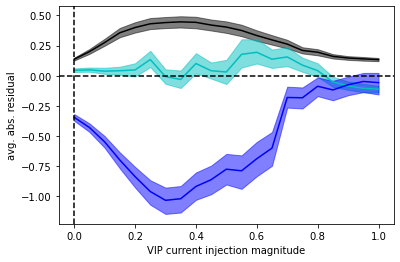

In [ ]:
limit_xlim = False

save_fig = False

i1, j1 = 0, -1
i2, j2 = -1, -1
itype = 0
plot_slope_intercept = False
plot_examples = True

plt.figure()
iconn = 0
for idir in range(1, 2):
    transform_fn = lambda x: x
    transform_fn = np.abs
    vals = transform_fn(res[iconn][idir][lkat][:, :, :, :, itype]).mean(-1).mean(-1)
    lb, ub, mn = ut.bootstrap(vals, fn=np.nanmean, axis=0, pct=(16, 84, 50))
    plt.fill_between(opto_levels, lb, ub, color='k', alpha=0.5)
    plt.plot(opto_levels, mn, color='k')
    if plot_slope_intercept:
        vals = intercept[iconn][idir][lkat][:, :, itype]
        lb, ub, mn = ut.bootstrap(vals, fn=np.nanmean, axis=0, pct=(16, 84, 50))
        plt.fill_between(opto_levels, lb, ub, color='b', alpha=0.5)
        plt.plot(opto_levels, mn, color='b')

        vals = slope[iconn][idir][lkat][:, :, itype]
        lb, ub, mn = ut.bootstrap(vals, fn=np.nanmean, axis=0, pct=(16, 84, 50))
        plt.fill_between(opto_levels, lb, ub, color='g', alpha=0.5)
        plt.plot(opto_levels, mn, color='g')
    
    if plot_examples:
        for isize, icontrast, c in [(i1, j1, 'c'), (i2, j2, 'b')]:
            transform_fn = lambda x: x
            vals = transform_fn(res[iconn][idir][lkat][:, :, isize, icontrast, itype])
            lb, ub, mn = ut.bootstrap(vals, fn=np.nanmean, axis=0, pct=(16, 84, 50))
            plt.fill_between(opto_levels, lb, ub, color=c, alpha=0.5)
            plt.plot(opto_levels, mn, color=c)

if limit_xlim:
    plt.xlim(-0.2, 0.2)

plt.axhline(0, color='k', linestyle='--')
plt.axvline(0, color='k', linestyle='--')

# ut.zero_origin()
plt.xlabel('VIP current injection magnitude')
plt.ylabel('avg. abs. residual')
if save_fig:
    plt.savefig(notebook_base+f'figures/avg_abs_res_vs_injected_current_magnitude.png')

(array([ 1.,  1.,  0.,  0.,  5.,  6., 10., 18., 35., 13.]),
 array([-4.6423743 , -4.16352167, -3.68466904, -3.2058164 , -2.72696377,
        -2.24811114, -1.7692585 , -1.29040587, -0.81155324, -0.33270061,
         0.14615203]),
 <BarContainer object of 10 artists>)

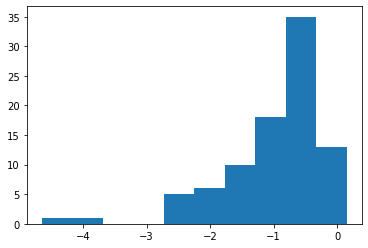

In [ ]:
plt.figure()
itype = 1
x = intercept[iconn][idir][lkat][:, :, itype].mean(1)

plt.hist(x[np.abs(x) < 200])

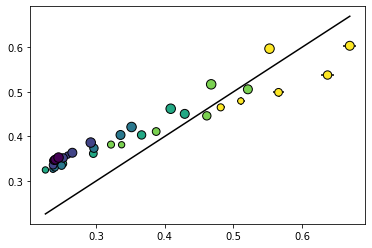

In [ ]:
iconn = 0
baseline, halo, chrimson = reshape_resps(network_resps, iconn=iconn)
itype = 1
plt.figure()
isize = 3
for ilight in [5]:
    x = baseline[lkat, 0, :, :, itype]
    sca.scatter_size_contrast_errorbar(x, halo[lkat, ilight, :, :, itype], dot_size_offset=30)
plt.plot(x.mean(0).flatten(), x.mean(0).flatten() + slope[iconn][idir][lkat][:, ilight, itype].mean(0) * x.mean(0).flatten() + intercept[iconn][idir][lkat][:, ilight, itype].mean(0))

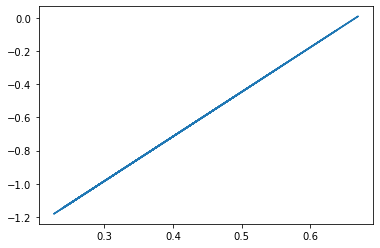

In [ ]:
plt.figure()
plt.plot(x.mean(0).flatten(), x.mean(0).flatten() + slope[iconn][idir][lkat][:, ilight, itype].mean(0) * x.mean(0).flatten() + intercept[iconn][idir][lkat][:, ilight, itype].mean(0))

In [ ]:
for iconn in [0,2,3,4]:

#     ilow = 5*np.ones((lkat.sum(),),dtype='int')
#     ihigh = 5*np.ones((lkat.sum(),),dtype='int')
    conn_lbl = conn_lbls[iconn]
    ihigh = int(np.round(np.mean(target_bin[lkat])))#np.minimum(np.maximum(target_bin[lkat],0),20)#np.maximum(target_bin[lkat]-2,15)#ilight_drmax[2][iconn][lkat]
    ilow = ihigh#30-ihigh#4#ilight_drmax[1][iconn][lkat]
    idir = 0
    xdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
    xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
    zdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype2].reshape((-1,6,6))
    zdata_norm = zdata/zdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
    for idir,ilight,light_lbl,c,ylim,opto_lbl in zip([1,2],[ilow,ihigh],light_lbls,cs,ylims,opto_lbls):

        ydata = network_resps[idir][iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
        wdata = network_resps[idir][iconn][lkat][:,:,:,itype2][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
        these_sizes = [0, 5]
        

In [ ]:
np.linspace(-1.5,1.5,31)

array([-1.5, -1.4, -1.3, -1.2, -1.1, -1. , -0.9, -0.8, -0.7, -0.6, -0.5,
       -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,
        0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5])

In [ ]:
assert(idir == 2)
lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
# lkat: non-divergent responses to positive VIP current

0.07442410435747515
0.11871010672245483
0.0019816721161358564
0.016363980758480872
0.008310251833594373
0.0009074768602203207
-0.009274604278650348
-0.011745106932096218


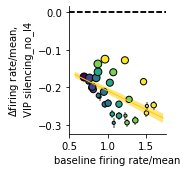

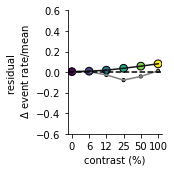

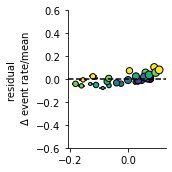

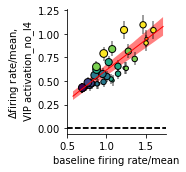

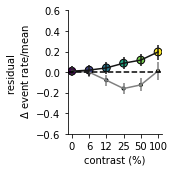

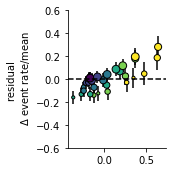

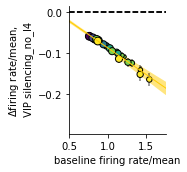

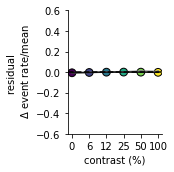

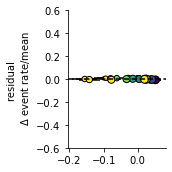

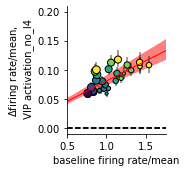

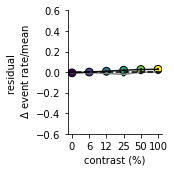

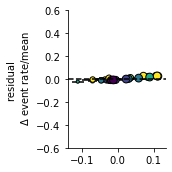

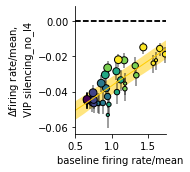

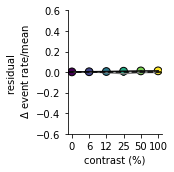

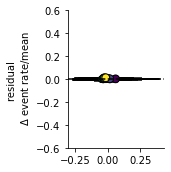

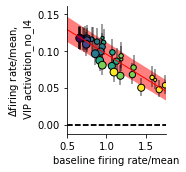

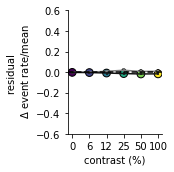

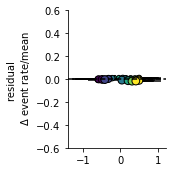

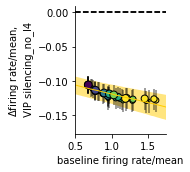

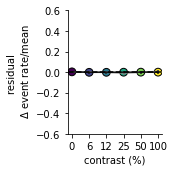

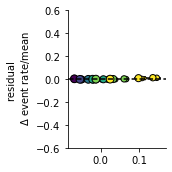

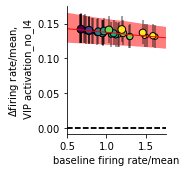

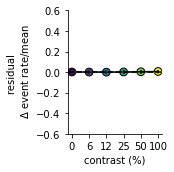

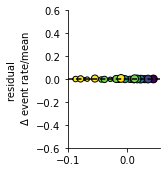

In [ ]:
save_fig = False

reload(ut)
ibaseline = 15
# ilow = 5
# ihigh = 5
# ibaseline = 1
# ilow = 0
# ihigh = 2

itype = 0
itype2 = 2

ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,8,13,25,36,60))
this_nsize = len(usize)
this_ncontrast = len(ucontrast)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

import scipy.stats as sst
import opto_utils
reload(opto_utils)

light_lbls = ['silencing_no_l4','activation_no_l4']
conn_lbls = ['baseline','pcpc_deleted','pcpv_deleted','pcvip_deleted','pcsst_deleted','']

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

idir = 2
# lkat = (network_resps[idir][0].max(1).max(1).max(1) < 10)
lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
# lkat = np.ones_like(lkat)

for iconn in [0,2,3,4]:

#     ilow = 5*np.ones((lkat.sum(),),dtype='int')
#     ihigh = 5*np.ones((lkat.sum(),),dtype='int')
    # L4 sim: linspace(0,1,21)
    # no L4 sim: linspace(-1.5,1.5,31)
    ioffset = int(np.round(np.mean(target_bin[lkat]))) // 2 #np.minimum(np.maximum(target_bin[lkat],0),20)#np.maximum(target_bin[lkat]-2,15)#ilight_drmax[2][iconn][lkat]
    ihigh = ibaseline + ioffset
    ilow = ibaseline - ioffset #30-ihigh#4#ilight_drmax[1][iconn][lkat]
    idir = 0
    xdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
    xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
    zdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype2].reshape((-1,6,6))
    zdata_norm = zdata/zdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
#     for idir,ilight,light_lbl,c,ylim in zip([0,0],[ibaseline,ibaseline],light_lbls,cs,ylims):
    for idir,ilight,light_lbl,c,ylim in zip([0,0],[ilow,ihigh],light_lbls,cs,ylims):
#     for idir,ilight,light_lbl,c,ylim in zip([1,2],[0,0],light_lbls,cs,ylims):

        plt.figure(figsize=(2.5,2.5))
        ydata = network_resps[idir][iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
        ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
        wdata = network_resps[idir][iconn][lkat][:,:,:,itype2][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
        wdata_norm = wdata/wdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
#         sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
        opto_utils.scatter_size_contrast_x_dx_errorbar(np.concatenate((xdata_norm[:,:,:,np.newaxis],ydata_norm[:,:,:,np.newaxis]),axis=-1),opto_color=c)
        plt.axhline(0,c='k',linestyle='dashed')
    #     ut.zero_origin('x')
        plt.xlabel('baseline firing rate/mean')
        plt.ylabel('$\Delta$firing rate/mean, \n VIP %s'%light_lbl)
        slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())
        xs = np.array((xdata_norm.min(),xdata_norm.max()))
#         plt.plot(xs,slope*xs+intercept,c=c,linestyle='dashed')
    #     plt.ylim(ylim)
        plt.xlim((0.5,1.75))
        ut.erase_top_right()
        plt.tight_layout()
        if save_fig:
            plt.savefig(notebook_base+'figures/delta_rate_vs_rate_no_l4_%s_%s.jpg'%(light_lbl,conn_lbls[iconn]),dpi=300)

        plt.figure(figsize=(2.5,2.5))
        pred = slope*xdata_norm + intercept
        actual = (ydata_norm-xdata_norm)
        residual = actual - pred
        these_sizes = [0,5]
#         ut.plot_parametric_fn_errorbars(np.arange(6),actual[:,these_sizes]-pred[:,these_sizes],fit_fn=nra.fit_opt_params_two_asymptote_fn,plot_fn=nra.two_asymptote_fn,colors=c_l23[these_sizes],markersize=0,errorstyle='bs')
        ut.plot_bootstrapped_errorbars_hillel(np.arange(6),actual[:,these_sizes]-pred[:,these_sizes],colors=c_l23[these_sizes],pct=(16,84),markersize=0)
        xs = np.arange(6)[np.newaxis] #np.concatenate((np.arange(6)[np.newaxis],np.arange(6)[np.newaxis]),axis=0)#[np.newaxis]
        for this_size in these_sizes:
            sca.scatter_size_contrast(xs,np.nanmean(actual[:,this_size:this_size+1]-pred[:,this_size:this_size+1],0),equality_line=False,dot_scale=(this_size+1)*10)
        plt.axhline(0,c='k',linestyle='dashed')
        plt.xticks(np.arange(this_ncontrast),ucontrast)
        ut.erase_top_right()
        plt.xlabel('contrast (%)')
        plt.ylabel('residual \n $\Delta$ event rate/mean')
        plt.ylim((-0.6,0.6))
#         plt.ylim((-0.2,0.2))
        plt.tight_layout()
        if save_fig:
            plt.savefig(notebook_base+'figures/residual_delta_rate_vs_contrast_no_l4_%s_%s.eps'%(light_lbl,conn_lbls[iconn]))

        plt.figure(figsize=(2.5,2.5))
        slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())
        slope2, intercept2, r_value, p_value, std_err = sst.linregress((wdata_norm-zdata_norm).flatten(), (ydata_norm-xdata_norm).flatten())
        pred = slope*xdata_norm + intercept
        actual = (ydata_norm-xdata_norm)
        residual = actual - pred
        pred2 = slope2*(wdata_norm-zdata_norm) + intercept2
        residual2 = (wdata_norm-zdata_norm)#actual - pred2
        these_sizes = [0,5]
        sca.scatter_size_contrast_errorbar(residual2,residual,equality_line=False,square=False)
#         ut.plot_bootstrapped_errorbars_hillel(np.arange(6),actual[:,these_sizes]-pred[:,these_sizes],colors=c_l23[these_sizes],pct=(16,84),markersize=0)
#         xs = np.arange(6)[np.newaxis] #np.concatenate((np.arange(6)[np.newaxis],np.arange(6)[np.newaxis]),axis=0)#[np.newaxis]
#         for this_size in these_sizes:
#             sca.scatter_size_contrast(xs,np.nanmean(actual[:,this_size:this_size+1]-pred[:,this_size:this_size+1],0),equality_line=False,dot_scale=(this_size+1)*10)
        plt.axhline(0,c='k',linestyle='dashed')
#         plt.xticks(np.arange(this_ncontrast),ucontrast)
        ut.erase_top_right()
#         plt.xlabel('contrast (%)')
        plt.ylabel('residual \n $\Delta$ event rate/mean')
        plt.ylim((-0.6,0.6))
#         plt.ylim((-0.2,0.2))
        plt.tight_layout()
        if False:
            plt.savefig(notebook_base+'figures/residual_delta_rate_vs_contrast_no_l4_%s_%s.eps'%(light_lbl,conn_lbls[iconn]))

    # plt.figure(figsize=(2.5,2.5))
    # xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
    # ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
    # sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
    # plt.axhline(0,c='k',linestyle='dashed')
    # ut.zero_origin('x')


In [ ]:
ioffset

0.053195811778035104
0.09151606730831917
0.009896767838997027
0.046376482520784384
0.1352390638749891
0.03399889125011217
0.15819107366199409
0.01883681004372784


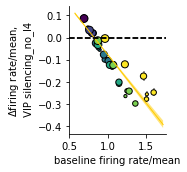

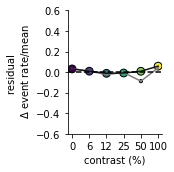

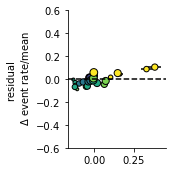

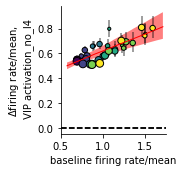

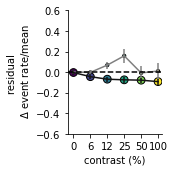

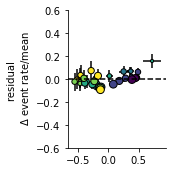

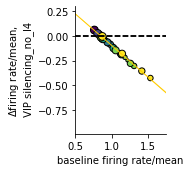

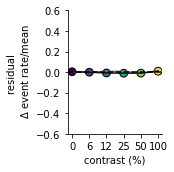

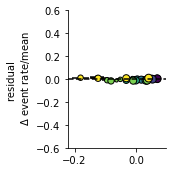

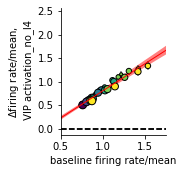

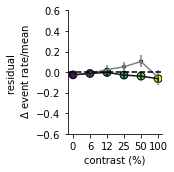

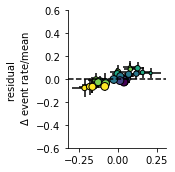

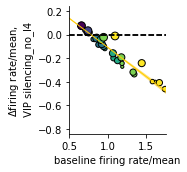

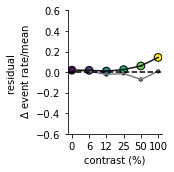

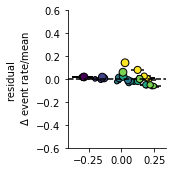

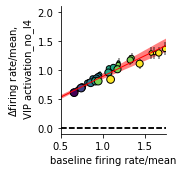

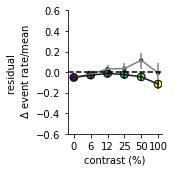

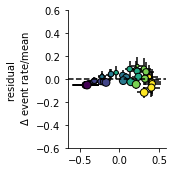

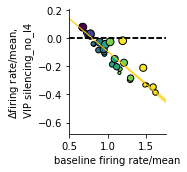

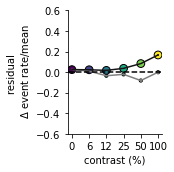

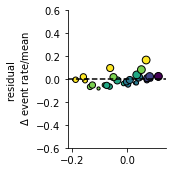

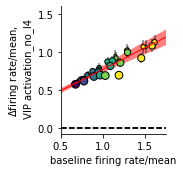

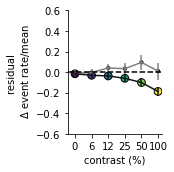

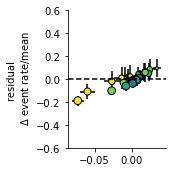

In [ ]:
save_fig = False

reload(ut)
ibaseline = 15
# ilow = 5
# ihigh = 5
# ibaseline = 1
# ilow = 0
# ihigh = 2

itype = 0
itype2 = 2

ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,8,13,25,36,60))
this_nsize = len(usize)
this_ncontrast = len(ucontrast)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

import scipy.stats as sst
import opto_utils
reload(opto_utils)

light_lbls = ['silencing_no_l4','activation_no_l4']
conn_lbls = ['baseline','pcpc_deleted','pcpv_deleted','pcvip_deleted','pcsst_deleted','']

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

idir = 2
# lkat = (network_resps[idir][0].max(1).max(1).max(1) < 10)
lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
# lkat = np.ones_like(lkat)

for iconn in [0,2,3,4]:

#     ilow = 5*np.ones((lkat.sum(),),dtype='int')
#     ihigh = 5*np.ones((lkat.sum(),),dtype='int')
    # L4 sim: linspace(0,1,21)
    # no L4 sim: linspace(-1.5,1.5,31)
    ioffset = int(np.round(np.mean(target_bin[lkat]))) // 2 #np.minimum(np.maximum(target_bin[lkat],0),20)#np.maximum(target_bin[lkat]-2,15)#ilight_drmax[2][iconn][lkat]
    ihigh = ibaseline + ioffset
    ilow = ibaseline - ioffset #30-ihigh#4#ilight_drmax[1][iconn][lkat]
    idir = 0
    xdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
    xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
    zdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype2].reshape((-1,6,6))
    zdata_norm = zdata/zdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
#     for idir,ilight,light_lbl,c,ylim in zip([0,0],[ibaseline,ibaseline],light_lbls,cs,ylims):
#     for idir,ilight,light_lbl,c,ylim in zip([0,0],[ilow,ihigh],light_lbls,cs,ylims):
    for idir,ilight,light_lbl,c,ylim in zip([1,2],[0,0],light_lbls,cs,ylims):

        plt.figure(figsize=(2.5,2.5))
        ydata = network_resps[idir][iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
        ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
        wdata = network_resps[idir][iconn][lkat][:,:,:,itype2][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
        wdata_norm = wdata/wdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
#         sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
        opto_utils.scatter_size_contrast_x_dx_errorbar(np.concatenate((xdata_norm[:,:,:,np.newaxis],ydata_norm[:,:,:,np.newaxis]),axis=-1),opto_color=c)
        plt.axhline(0,c='k',linestyle='dashed')
    #     ut.zero_origin('x')
        plt.xlabel('baseline firing rate/mean')
        plt.ylabel('$\Delta$firing rate/mean, \n VIP %s'%light_lbl)
        slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())
        xs = np.array((xdata_norm.min(),xdata_norm.max()))
#         plt.plot(xs,slope*xs+intercept,c=c,linestyle='dashed')
    #     plt.ylim(ylim)
        plt.xlim((0.5,1.75))
        ut.erase_top_right()
        plt.tight_layout()
        if save_fig:
            plt.savefig(notebook_base+'figures/delta_rate_vs_rate_only_l4_%s_%s.jpg'%(light_lbl,conn_lbls[iconn]),dpi=300)

        plt.figure(figsize=(2.5,2.5))
        pred = slope*xdata_norm + intercept
        actual = (ydata_norm-xdata_norm)
        residual = actual - pred
        these_sizes = [0,5]
#         ut.plot_parametric_fn_errorbars(np.arange(6),actual[:,these_sizes]-pred[:,these_sizes],fit_fn=nra.fit_opt_params_two_asymptote_fn,plot_fn=nra.two_asymptote_fn,colors=c_l23[these_sizes],markersize=0,errorstyle='bs')
        ut.plot_bootstrapped_errorbars_hillel(np.arange(6),actual[:,these_sizes]-pred[:,these_sizes],colors=c_l23[these_sizes],pct=(16,84),markersize=0)
        xs = np.arange(6)[np.newaxis] #np.concatenate((np.arange(6)[np.newaxis],np.arange(6)[np.newaxis]),axis=0)#[np.newaxis]
        for this_size in these_sizes:
            sca.scatter_size_contrast(xs,np.nanmean(actual[:,this_size:this_size+1]-pred[:,this_size:this_size+1],0),equality_line=False,dot_scale=(this_size+1)*10)
        plt.axhline(0,c='k',linestyle='dashed')
        plt.xticks(np.arange(this_ncontrast),ucontrast)
        ut.erase_top_right()
        plt.xlabel('contrast (%)')
        plt.ylabel('residual \n $\Delta$ event rate/mean')
        plt.ylim((-0.6,0.6))
#         plt.ylim((-0.2,0.2))
        plt.tight_layout()
        if save_fig:
            plt.savefig(notebook_base+'figures/residual_delta_rate_vs_contrast_only_l4_%s_%s.eps'%(light_lbl,conn_lbls[iconn]))

        plt.figure(figsize=(2.5,2.5))
        slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())
        slope2, intercept2, r_value, p_value, std_err = sst.linregress((wdata_norm-zdata_norm).flatten(), (ydata_norm-xdata_norm).flatten())
        pred = slope*xdata_norm + intercept
        actual = (ydata_norm-xdata_norm)
        residual = actual - pred
        pred2 = slope2*(wdata_norm-zdata_norm) + intercept2
        residual2 = (wdata_norm-zdata_norm)#actual - pred2
        these_sizes = [0,5]
        sca.scatter_size_contrast_errorbar(residual2,residual,equality_line=False,square=False)
#         ut.plot_bootstrapped_errorbars_hillel(np.arange(6),actual[:,these_sizes]-pred[:,these_sizes],colors=c_l23[these_sizes],pct=(16,84),markersize=0)
#         xs = np.arange(6)[np.newaxis] #np.concatenate((np.arange(6)[np.newaxis],np.arange(6)[np.newaxis]),axis=0)#[np.newaxis]
#         for this_size in these_sizes:
#             sca.scatter_size_contrast(xs,np.nanmean(actual[:,this_size:this_size+1]-pred[:,this_size:this_size+1],0),equality_line=False,dot_scale=(this_size+1)*10)
        plt.axhline(0,c='k',linestyle='dashed')
#         plt.xticks(np.arange(this_ncontrast),ucontrast)
        ut.erase_top_right()
#         plt.xlabel('contrast (%)')
        plt.ylabel('residual \n $\Delta$ event rate/mean')
        plt.ylim((-0.6,0.6))
#         plt.ylim((-0.2,0.2))
        plt.tight_layout()
        if False:
            plt.savefig(notebook_base+'figures/residual_delta_rate_vs_contrast_only_l4_%s_%s.eps'%(light_lbl,conn_lbls[iconn]))

    # plt.figure(figsize=(2.5,2.5))
    # xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
    # ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
    # sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
    # plt.axhline(0,c='k',linestyle='dashed')
    # ut.zero_origin('x')


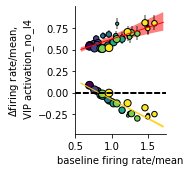

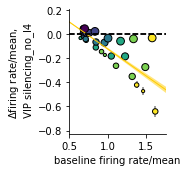

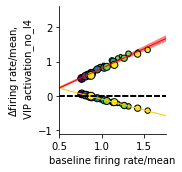

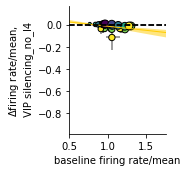

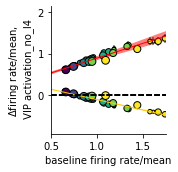

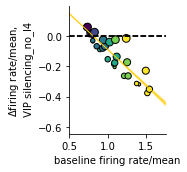

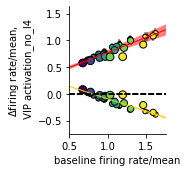

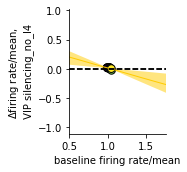

In [ ]:
save_fig = False

reload(ut)
ibaseline = 15
# ilow = 5
# ihigh = 5
# ibaseline = 1
# ilow = 0
# ihigh = 2

ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,8,13,25,36,60))
this_nsize = len(usize)
this_ncontrast = len(ucontrast)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

import scipy.stats as sst
import opto_utils
reload(opto_utils)

light_lbls = ['silencing_no_l4','activation_no_l4']
conn_lbls = ['baseline','pcpc_deleted','pcpv_deleted','pcvip_deleted','pcsst_deleted','']

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

idir = 2
# lkat = (network_resps[idir][0].max(1).max(1).max(1) < 10)
lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
# lkat = np.ones_like(lkat)

for iconn in [0,2,3,4]:

#     ilow = 5*np.ones((lkat.sum(),),dtype='int')
#     ihigh = 5*np.ones((lkat.sum(),),dtype='int')
    # L4 sim: linspace(0,1,21)
    # no L4 sim: linspace(-1.5,1.5,31)
    ioffset = int(np.round(np.mean(target_bin[lkat]))) // 2 #np.minimum(np.maximum(target_bin[lkat],0),20)#np.maximum(target_bin[lkat]-2,15)#ilight_drmax[2][iconn][lkat]
    ihigh = ibaseline + ioffset
    ilow = ibaseline - ioffset #30-ihigh#4#ilight_drmax[1][iconn][lkat]
    
    idir = 0
    itype = 0
    itype2 = 2

    xdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
    xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
    zdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype2].reshape((-1,6,6))
    zdata_norm = zdata/zdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
#     for idir,ilight,light_lbl,c,ylim in zip([0,0],[ibaseline,ibaseline],light_lbls,cs,ylims):
#     for idir,ilight,light_lbl,c,ylim in zip([0,0],[ilow,ihigh],light_lbls,cs,ylims):

    plt.figure(figsize=(2.5,2.5))
    for idir,ilight,light_lbl,c,ylim in zip([1,2],[0,0],light_lbls,cs,ylims):
        ydata = network_resps[idir][iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
        ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
        wdata = network_resps[idir][iconn][lkat][:,:,:,itype2][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
        wdata_norm = wdata/wdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
#         sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
        opto_utils.scatter_size_contrast_x_dx_errorbar(np.concatenate((xdata_norm[:,:,:,np.newaxis],ydata_norm[:,:,:,np.newaxis]),axis=-1),opto_color=c)
        plt.axhline(0,c='k',linestyle='dashed')
    #     ut.zero_origin('x')
        plt.xlabel('baseline firing rate/mean')
        plt.ylabel('$\Delta$firing rate/mean, \n VIP %s'%light_lbl)
        slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())
        xs = np.array((xdata_norm.min(),xdata_norm.max()))
#         plt.plot(xs,slope*xs+intercept,c=c,linestyle='dashed')
    #     plt.ylim(ylim)
        plt.xlim((0.5,1.75))
        ut.erase_top_right()
        plt.tight_layout()
        if save_fig:
            plt.savefig(notebook_base+'figures/delta_rate_vs_rate_only_l4_bidir_%s.jpg'%(conn_lbls[iconn]),dpi=300)

    idir = 0
    itype = 1
    itype2 = 2

    xdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
    xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
    zdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype2].reshape((-1,6,6))
    zdata_norm = zdata/zdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]

    plt.figure(figsize=(2.5,2.5))
    for idir,ilight,light_lbl,c,ylim in zip([1],[0],light_lbls[:1],cs[:1],ylims[:1]):
        ydata = network_resps[idir][iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
        ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
        wdata = network_resps[idir][iconn][lkat][:,:,:,itype2][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
        wdata_norm = wdata/wdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
#         sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
        opto_utils.scatter_size_contrast_x_dx_errorbar(np.concatenate((xdata_norm[:,:,:,np.newaxis],ydata_norm[:,:,:,np.newaxis]),axis=-1),opto_color=c)
        plt.axhline(0,c='k',linestyle='dashed')
    #     ut.zero_origin('x')
        plt.xlabel('baseline firing rate/mean')
        plt.ylabel('$\Delta$firing rate/mean, \n VIP %s'%light_lbl)
        slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())
        xs = np.array((xdata_norm.min(),xdata_norm.max()))
#         plt.plot(xs,slope*xs+intercept,c=c,linestyle='dashed')
    #     plt.ylim(ylim)
        plt.xlim((0.5,1.75))
        ut.erase_top_right()
        plt.tight_layout()
        if save_fig:
            plt.savefig(notebook_base+'figures/delta_rate_vs_rate_only_l4_sst_%s_%s.eps'%(light_lbl,conn_lbls[iconn]),dpi=300)


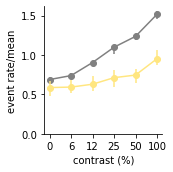

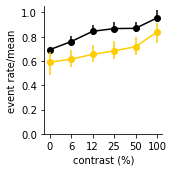

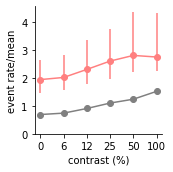

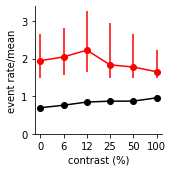

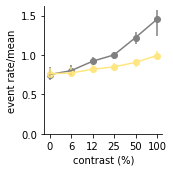

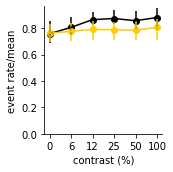

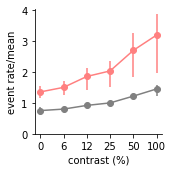

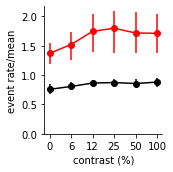

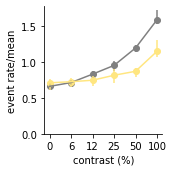

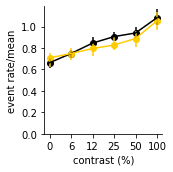

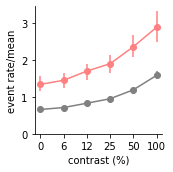

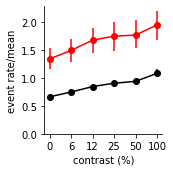

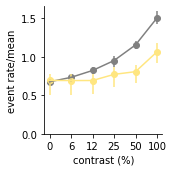

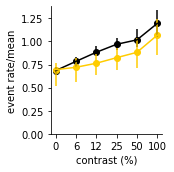

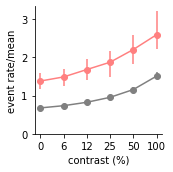

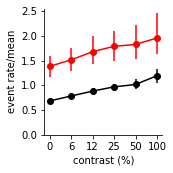

In [ ]:
ibaseline = 15
# ilow = 5
# ihigh = 5
# ibaseline = 1
# ilow = 0
# ihigh = 2

itype = 0

ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,8,13,25,36,60))
this_nsize = len(usize)
this_ncontrast = len(ucontrast)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

import scipy.stats as sst
import opto_utils

light_lbls = ['silencing','activation']
conn_lbls = ['baseline','pcpc_deleted','pcpv_deleted','pcvip_deleted','pcsst_deleted','']

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

idir = 2
# lkat = (network_resps[idir][0].max(1).max(1).max(1) < 10)
lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
# lkat = np.ones_like(lkat)

for iconn in [0,2,3,4]:

#     ilow = 5*np.ones((lkat.sum(),),dtype='int')
#     ihigh = 5*np.ones((lkat.sum(),),dtype='int')
    ihigh = int(np.round(np.mean(target_bin[lkat])))#np.minimum(np.maximum(target_bin[lkat],0),20)#np.maximum(target_bin[lkat]-2,15)#ilight_drmax[2][iconn][lkat]
    ilow = ihigh#30-ihigh#4#ilight_drmax[1][iconn][lkat]
    idir = 0
    xdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
    xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
    for idir,ilight,light_lbl,c,ylim in zip([1,2],[ilow,ihigh],light_lbls,cs,ylims):
        ydata = network_resps[idir][iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
        ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
        
        these_sizes = [0,5]
        bfactors = [0.5,1]
        for this_size,bfactor in zip(these_sizes,bfactors):
            plt.figure(figsize=(2.5,2.5))
            ut.plot_pct_errorbars_hillel(np.arange(6),xdata_norm[:,this_size:this_size+1],colors=1-bfactor*(1-np.array((0,0,0))[np.newaxis]),pct=(16,84))#,markersize=10)
            ut.plot_pct_errorbars_hillel(np.arange(6),ydata_norm[:,this_size:this_size+1],colors=1-bfactor*(1-cs[idir-1][np.newaxis]),pct=(16,84))#,markersize=2)
            plt.xticks(np.arange(6),ucontrast)
#         xs = np.arange(6)[np.newaxis] #np.concatenate((np.arange(6)[np.newaxis],np.arange(6)[np.newaxis]),axis=0)#[np.newaxis]
#         for this_size in these_sizes:
#             sca.scatter_size_contrast(xs,np.nanmean(actual[:,this_size:this_size+1]-pred[:,this_size:this_size+1],0),equality_line=False,dot_scale=(this_size+1)*10)
#         plt.axhline(0,c='k',linestyle='dashed')
#             plt.xticks(np.arange(this_ncontrast),ucontrast)
            plt.gca().set_ylim(bottom=0)
            ut.erase_top_right()
            plt.xlabel('contrast (%)')
            plt.ylabel('event rate/mean')
#         plt.ylim((-1,0.5))
#         plt.ylim((-0.2,0.2))
            plt.tight_layout()
            plt.savefig(notebook_base+'figures/pc_rate_vs_contrast_size_%d_l4_%s_%s.eps'%(this_size,light_lbl,conn_lbls[iconn]))

    # plt.figure(figsize=(2.5,2.5))
    # xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
    # ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
    # sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
    # plt.axhline(0,c='k',linestyle='dashed')
    # ut.zero_origin('x')


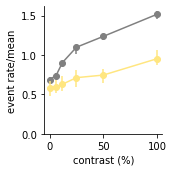

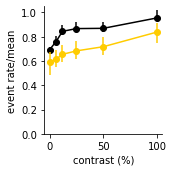

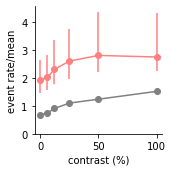

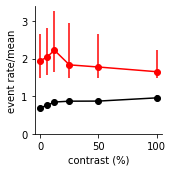

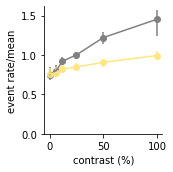

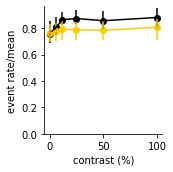

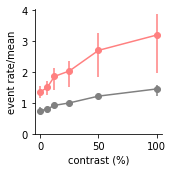

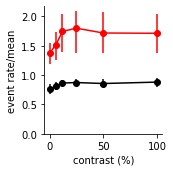

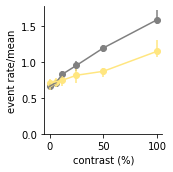

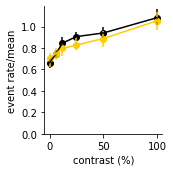

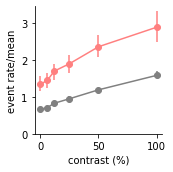

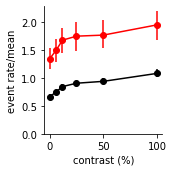

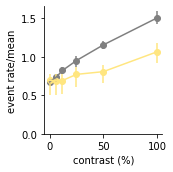

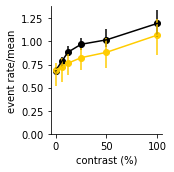

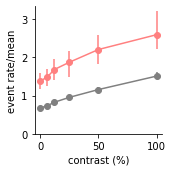

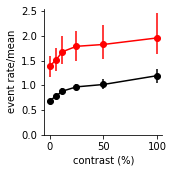

In [ ]:
ibaseline = 15
# ilow = 5
# ihigh = 5
# ibaseline = 1
# ilow = 0
# ihigh = 2

itype = 0

ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,8,13,25,36,60))
this_nsize = len(usize)
this_ncontrast = len(ucontrast)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

import scipy.stats as sst
import opto_utils

light_lbls = ['silencing','activation']
conn_lbls = ['baseline','pcpc_deleted','pcpv_deleted','pcvip_deleted','pcsst_deleted','']

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

idir = 2
# lkat = (network_resps[idir][0].max(1).max(1).max(1) < 10)
lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
# lkat = np.ones_like(lkat)

for iconn in [0,2,3,4]:

#     ilow = 5*np.ones((lkat.sum(),),dtype='int')
#     ihigh = 5*np.ones((lkat.sum(),),dtype='int')
    ihigh = int(np.round(np.mean(target_bin[lkat])))#np.minimum(np.maximum(target_bin[lkat],0),20)#np.maximum(target_bin[lkat]-2,15)#ilight_drmax[2][iconn][lkat]
    ilow = ihigh#30-ihigh#4#ilight_drmax[1][iconn][lkat]
    idir = 0
    xdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
    xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
    for idir,ilight,light_lbl,c,ylim in zip([1,2],[ilow,ihigh],light_lbls,cs,ylims):
        ydata = network_resps[idir][iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
        ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
        
        these_sizes = [0,5]
        bfactors = [0.5,1]
        for this_size,bfactor in zip(these_sizes,bfactors):
            plt.figure(figsize=(2.5,2.5))
            ut.plot_pct_errorbars_hillel(ucontrast,xdata_norm[:,this_size:this_size+1],colors=1-bfactor*(1-np.array((0,0,0))[np.newaxis]),pct=(16,84))#,markersize=10)
            ut.plot_pct_errorbars_hillel(ucontrast,ydata_norm[:,this_size:this_size+1],colors=1-bfactor*(1-cs[idir-1][np.newaxis]),pct=(16,84))#,markersize=2)
#             plt.xticks(np.arange(6),ucontrast)
#         xs = np.arange(6)[np.newaxis] #np.concatenate((np.arange(6)[np.newaxis],np.arange(6)[np.newaxis]),axis=0)#[np.newaxis]
#         for this_size in these_sizes:
#             sca.scatter_size_contrast(xs,np.nanmean(actual[:,this_size:this_size+1]-pred[:,this_size:this_size+1],0),equality_line=False,dot_scale=(this_size+1)*10)
#         plt.axhline(0,c='k',linestyle='dashed')
#             plt.xticks(np.arange(this_ncontrast),ucontrast)
            plt.gca().set_ylim(bottom=0)
            ut.erase_top_right()
            plt.xlabel('contrast (%)')
            plt.ylabel('event rate/mean')
#         plt.ylim((-1,0.5))
#         plt.ylim((-0.2,0.2))
            plt.tight_layout()
            plt.savefig(notebook_base+'figures/pc_rate_vs_linear_contrast_size_%d_l4_%s_%s.eps'%(this_size,light_lbl,conn_lbls[iconn]))

    # plt.figure(figsize=(2.5,2.5))
    # xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
    # ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
    # sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
    # plt.axhline(0,c='k',linestyle='dashed')
    # ut.zero_origin('x')


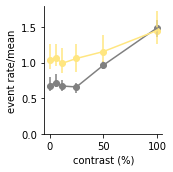

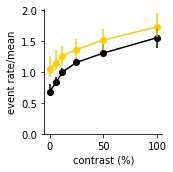

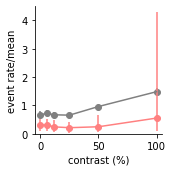

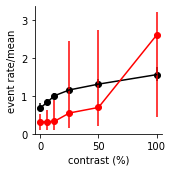

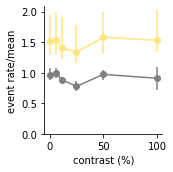

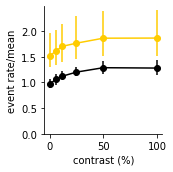

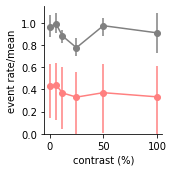

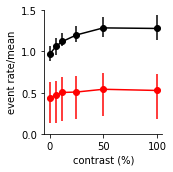

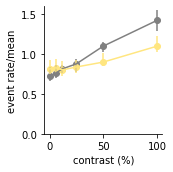

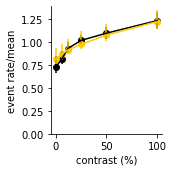

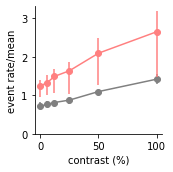

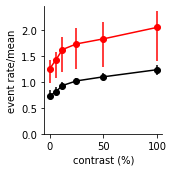

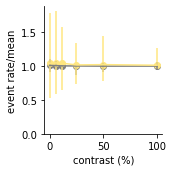

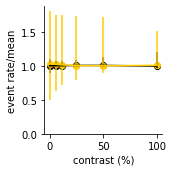

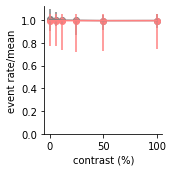

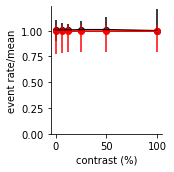

In [ ]:
save_fig = True

ibaseline = 15
# ilow = 5
# ihigh = 5
# ibaseline = 1
# ilow = 0
# ihigh = 2

itype = 1

ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,8,13,25,36,60))
this_nsize = len(usize)
this_ncontrast = len(ucontrast)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

import scipy.stats as sst
import opto_utils

light_lbls = ['silencing','activation']
conn_lbls = ['baseline','pcpc_deleted','pcpv_deleted','pcvip_deleted','pcsst_deleted','']

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

idir = 2
# lkat = (network_resps[idir][0].max(1).max(1).max(1) < 10)
lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
# lkat = np.ones_like(lkat)

for iconn in [0,2,3,4]:

#     ilow = 5*np.ones((lkat.sum(),),dtype='int')
#     ihigh = 5*np.ones((lkat.sum(),),dtype='int')
    ihigh = int(np.round(np.mean(target_bin[lkat])))#np.minimum(np.maximum(target_bin[lkat],0),20)#np.maximum(target_bin[lkat]-2,15)#ilight_drmax[2][iconn][lkat]
    ilow = ihigh#30-ihigh#4#ilight_drmax[1][iconn][lkat]
    idir = 0
    xdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
    xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
    for idir,ilight,light_lbl,c,ylim in zip([1,2],[ilow,ihigh],light_lbls,cs,ylims):
        ydata = network_resps[idir][iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
        ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
        
        these_sizes = [0,5]
        bfactors = [0.5,1]
        for this_size,bfactor in zip(these_sizes,bfactors):
            plt.figure(figsize=(2.5,2.5))
            ut.plot_pct_errorbars_hillel(ucontrast,xdata_norm[:,this_size:this_size+1],colors=1-bfactor*(1-np.array((0,0,0))[np.newaxis]),pct=(16,84))#,markersize=10)
            ut.plot_pct_errorbars_hillel(ucontrast,ydata_norm[:,this_size:this_size+1],colors=1-bfactor*(1-cs[idir-1][np.newaxis]),pct=(16,84))#,markersize=2)
#             plt.xticks(np.arange(6),ucontrast)
#         xs = np.arange(6)[np.newaxis] #np.concatenate((np.arange(6)[np.newaxis],np.arange(6)[np.newaxis]),axis=0)#[np.newaxis]
#         for this_size in these_sizes:
#             sca.scatter_size_contrast(xs,np.nanmean(actual[:,this_size:this_size+1]-pred[:,this_size:this_size+1],0),equality_line=False,dot_scale=(this_size+1)*10)
#         plt.axhline(0,c='k',linestyle='dashed')
#             plt.xticks(np.arange(this_ncontrast),ucontrast)
            plt.gca().set_ylim(bottom=0)
            ut.erase_top_right()
            plt.xlabel('contrast (%)')
            plt.ylabel('event rate/mean')
#         plt.ylim((-1,0.5))
#         plt.ylim((-0.2,0.2))
            plt.tight_layout()
            if save_fig:
                plt.savefig(notebook_base+'figures/sst_rate_vs_linear_contrast_size_%d_l4_%s_%s.eps'%(this_size,light_lbl,conn_lbls[iconn]))

    # plt.figure(figsize=(2.5,2.5))
    # xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
    # ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
    # sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
    # plt.axhline(0,c='k',linestyle='dashed')
    # ut.zero_origin('x')


In [ ]:
conn_lbls

['baseline',
 'pcpc_deleted',
 'pcpv_deleted',
 'pcvip_deleted',
 'pcsst_deleted',
 '']

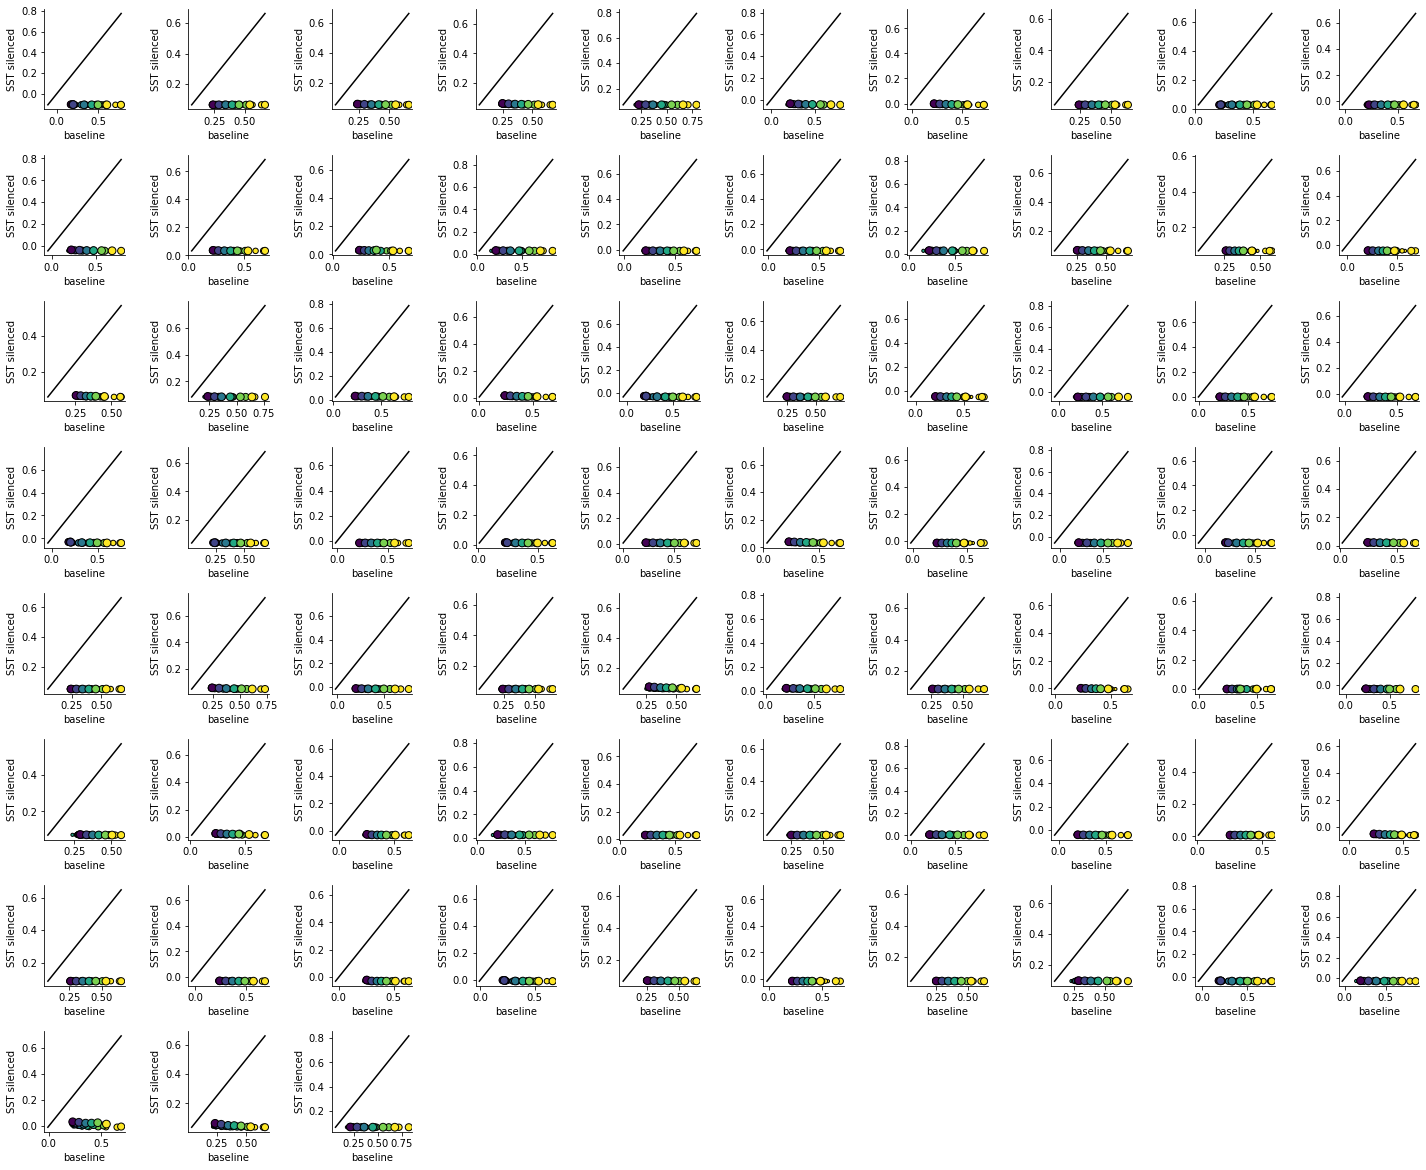

In [ ]:
save_fig = False
plt.figure(figsize=(20,20))
lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
this_lkat = lkat & (network_resps[0][4][:,15,:,1].max(1) < 0.1)
for i in range(this_lkat.sum()):
    plt.subplot(10,10,i+1)
    sca.scatter_size_contrast(network_resps[0][0][this_lkat][i,15,:,1].reshape((6,6)),network_resps[0][4][this_lkat][i,15,:,1].reshape((6,6)))
#     sca.scatter_size_contrast_errorbar(network_resps[0][0][lkat][:,15,:,0].reshape((-1,6,6)),network_resps[0][4][lkat][:,15,:,0].reshape((-1,6,6)))
    ut.erase_top_right()
    plt.xlabel('baseline')
    plt.ylabel('SST silenced')
plt.tight_layout()
if save_fig:
    plt.savefig('figures/sst_silence_scatter_sst_size_contrast.eps')

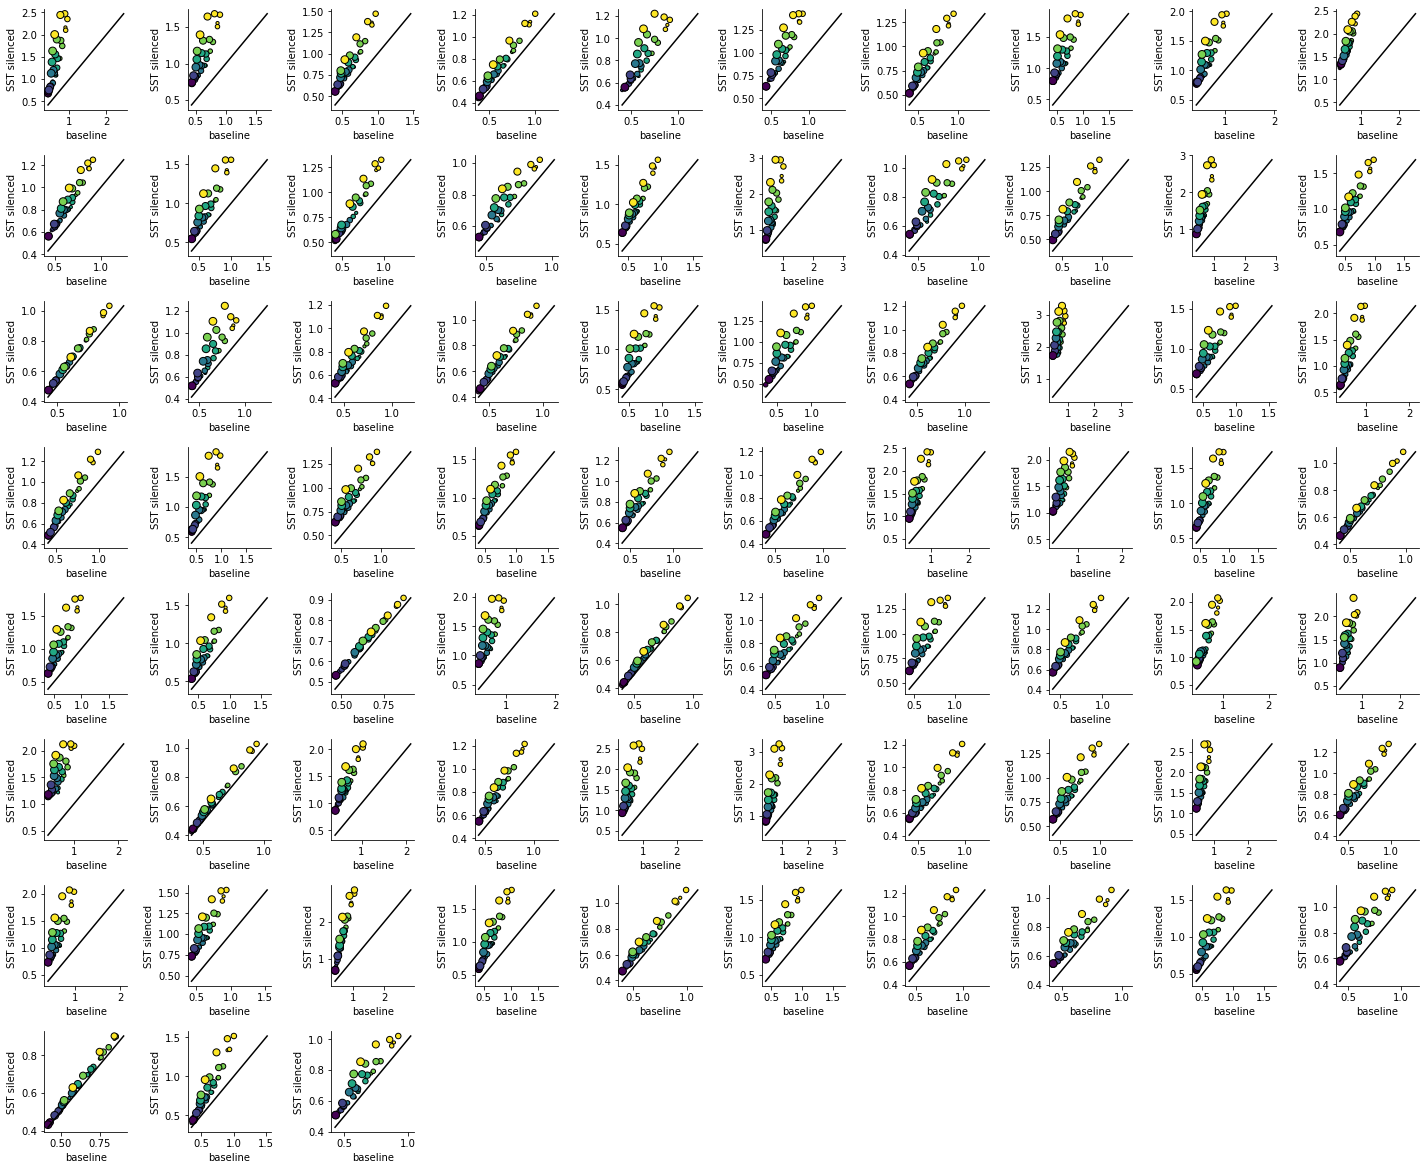

In [ ]:
plt.figure(figsize=(20,20))
save_fig = False
lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
this_lkat = lkat & (network_resps[0][4][:,15,:,1].max(1) < 0.1)
for i in range(this_lkat.sum()):
    plt.subplot(10,10,i+1)
    sca.scatter_size_contrast(network_resps[0][0][this_lkat][i,15,:,0].reshape((6,6)),network_resps[0][4][this_lkat][i,15,:,0].reshape((6,6)))
#     sca.scatter_size_contrast_errorbar(network_resps[0][0][lkat][:,15,:,0].reshape((-1,6,6)),network_resps[0][4][lkat][:,15,:,0].reshape((-1,6,6)))
    ut.erase_top_right()
    plt.xlabel('baseline')
    plt.ylabel('SST silenced')
plt.tight_layout()
if save_fig:
    plt.savefig(notebook_base+'figures/sst_silence_scatter_pc_size_contrast.eps')

(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)


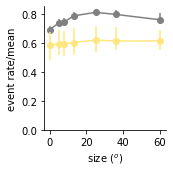

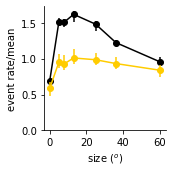

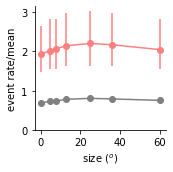

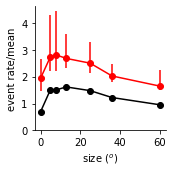

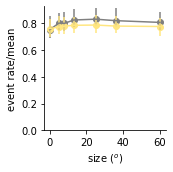

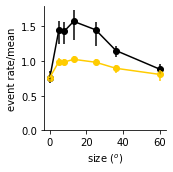

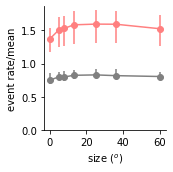

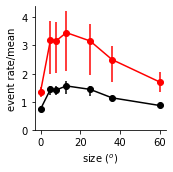

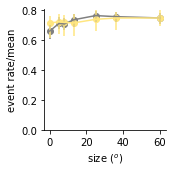

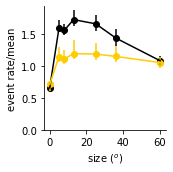

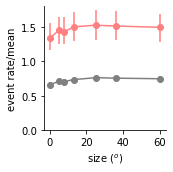

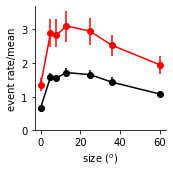

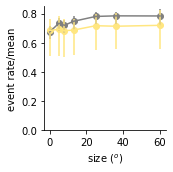

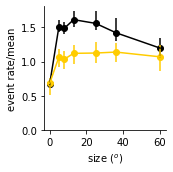

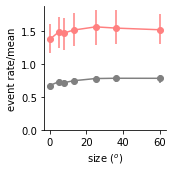

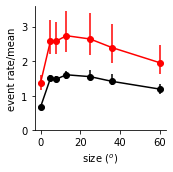

In [ ]:
ibaseline = 15
# ilow = 5
# ihigh = 5
# ibaseline = 1
# ilow = 0
# ihigh = 2

itype = 0

ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,8,13,25,36,60))
this_nsize = len(usize)
this_ncontrast = len(ucontrast)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

import scipy.stats as sst
import opto_utils

light_lbls = ['silencing','activation']
conn_lbls = ['baseline','pcpc_deleted','pcpv_deleted','pcvip_deleted','pcsst_deleted','']

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

idir = 2
# lkat = (network_resps[idir][0].max(1).max(1).max(1) < 10)
lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
# lkat = np.ones_like(lkat)

usize0 = np.concatenate(((0,),usize))

for iconn in [0,2,3,4]:

#     ilow = 5*np.ones((lkat.sum(),),dtype='int')
#     ihigh = 5*np.ones((lkat.sum(),),dtype='int')
    ihigh = int(np.round(np.mean(target_bin[lkat])))#np.minimum(np.maximum(target_bin[lkat],0),20)#np.maximum(target_bin[lkat]-2,15)#ilight_drmax[2][iconn][lkat]
    ilow = ihigh#30-ihigh#4#ilight_drmax[1][iconn][lkat]
    idir = 0
    xdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
    xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
    for idir,ilight,light_lbl,c,ylim in zip([1,2],[ilow,ihigh],light_lbls,cs,ylims):
        ydata = network_resps[idir][iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
        ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
        
        these_contrasts = [1,5]
        bfactors = [0.5,1]
        xsize_tuning = sim_utils.gen_size_tuning(xdata_norm)
        ysize_tuning = sim_utils.gen_size_tuning(ydata_norm)
        for this_contrast,bfactor in zip(these_contrasts,bfactors):
            plt.figure(figsize=(2.5,2.5))
            ut.plot_pct_errorbars_hillel(usize0,xsize_tuning[:,:,this_contrast:this_contrast+1].transpose((0,2,1)),colors=1-bfactor*(1-np.array((0,0,0))[np.newaxis]),pct=(16,84))#,markersize=10)
            ut.plot_pct_errorbars_hillel(usize0,ysize_tuning[:,:,this_contrast:this_contrast+1].transpose((0,2,1)),colors=1-bfactor*(1-cs[idir-1][np.newaxis]),pct=(16,84))#,markersize=2)
#             plt.xticks(np.arange(6),usize)
#         xs = np.arange(6)[np.newaxis] #np.concatenate((np.arange(6)[np.newaxis],np.arange(6)[np.newaxis]),axis=0)#[np.newaxis]
#         for this_size in these_sizes:
#             sca.scatter_size_contrast(xs,np.nanmean(actual[:,this_size:this_size+1]-pred[:,this_size:this_size+1],0),equality_line=False,dot_scale=(this_size+1)*10)
#         plt.axhline(0,c='k',linestyle='dashed')
#             plt.xticks(np.arange(this_ncontrast),ucontrast)
            plt.gca().set_ylim(bottom=0)
            ut.erase_top_right()
            plt.xlabel('size ($^o$)')
            plt.ylabel('event rate/mean')
#         plt.ylim((-1,0.5))
#         plt.ylim((-0.2,0.2))
            plt.tight_layout()
            plt.savefig(notebook_base+'figures/pc_rate_vs_size_contrast_%d_l4_%s_%s.eps'%(this_contrast,light_lbl,conn_lbls[iconn]))

    # plt.figure(figsize=(2.5,2.5))
    # xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
    # ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
    # sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
    # plt.axhline(0,c='k',linestyle='dashed')
    # ut.zero_origin('x')


In [ ]:
network_resps[idir][iconn].shape

(94, 21, 36, 8)

In [ ]:
# def preprocess(*args,average=True):
#     if average:
#         return tuple([np.nanmean(arg,0)[np.newaxis] for arg in args])
#     else:
#         return args

In [ ]:
# def plot_mimi_bars_with_lines(xdata_norm,ydata_norm,mi_fn=scf.smi_fn,first_ind=0,c=None,average=False):
#     # make a bar plot, one black bar indicating metric with light off (calculated on xdata_norm)
#     # and one colorful bar (c) indicating metric with light on (calculated on ydata_norm)
#     # transparent lines indicate individual model fits
#     # metric is computed using mi_fn
#     # first_ind refers to the first index to use when computing the modulation index on the metric (here, slope)
#     # 'average' indicates whether to average across model fits before plotting
#     mi = np.stack([mi_fn(x[:,:,:,np.newaxis]) for x in preprocess(xdata_norm,ydata_norm,average=average)],axis=-1)
#     mimis = scof.compute_slopes(mi,first_ind=first_ind)
#     plt.figure(figsize=(2.5,2.5))
#     colors = [np.array((0,0,0))[np.newaxis],c[np.newaxis]]
#     ut.plot_bars_with_lines(mimis,colors=colors,alpha=0.05,errorstyle='pct')
#     ut.erase_top_right()
#     _,p = sst.wilcoxon(mimis[:,0],mimis[:,1])
#     print(p)

# def plot_mi_errorbars(xdata_norm,ydata_norm,mi_fn=scf.smi_fn,first_ind=0,c=None,average=False):
#     # make error bar plot, one black curve indicating metric with light off (calculated on xdata_norm)
#     # and one colorful curve (c) indicating metric with light on (calculated on ydata_norm)
#     # metric is computed using mi_fn
#     # first_ind refers to the first index to use when plotting the metric
#     # 'average' indicates whether to average across model fits before plotting
#     rg = slice(first_ind,None)
#     mis = [mi_fn(x[:,:,:,np.newaxis]) for x in preprocess(xdata_norm,ydata_norm,average=average)]
#     plt.figure(figsize=(2.5,2.5))
#     colors = [np.array((0,0,0))[np.newaxis],c[np.newaxis]]
#     for mi,color in zip(mis,colors):
#         to_plot = mi[:,np.newaxis,rg]
#         ut.plot_pct_errorbars_hillel(np.arange(to_plot.shape[2]),to_plot,colors=color,pct=(16,84))#,markersize=10)
#     ut.erase_top_right()
    
# def plot_smi_errorbars(xdata_norm,ydata_norm,c=None):
#     # run plot_mi_errorbars using SMI as the metric
#     ucontrast = np.array((0,6,12,25,50,100))
#     first_ind = 1
#     plot_mi_errorbars(xdata_norm,ydata_norm,mi_fn=scf.smi_fn,first_ind=first_ind,c=c)
#     plt.xticks(np.arange(len(ucontrast[first_ind:])),ucontrast[first_ind:])
#     plt.xlabel('contrast (%)')
#     plt.ylabel('SMI')
#     plt.tight_layout()
    
# def plot_csi_errorbars(xdata_norm,ydata_norm,c=None):
#     # run plot_mi_errorbars using CSI as the metric
#     usize = np.array((5,8,13,25,36,60))
#     first_ind = 0
#     plot_mi_errorbars(xdata_norm,ydata_norm,mi_fn=scf.csi_fn,first_ind=first_ind,c=c)
#     plt.xticks(np.arange(len(usize[first_ind:])),usize[first_ind:])
#     plt.xlabel('size ($^o$)')
#     plt.ylabel('CSI')
#     plt.tight_layout()
    
# def plot_smimi_bars_with_lines(xdata_norm,ydata_norm,c=None):
#     # run plot_mimi_bars_with_lines using SMI as the metric
#     first_ind = 1
#     plot_mimi_bars_with_lines(xdata_norm,ydata_norm,mi_fn=scf.smi_fn,first_ind=first_ind,c=c)
#     plt.ylabel('slope, SMI vs. contrast')
#     plt.tight_layout()
    
# def plot_csimi_bars_with_lines(xdata_norm,ydata_norm,c=None):
#     # run plot_mimi_bars_with_lines using CSI as the metric
#     first_ind = 0
#     plot_mimi_bars_with_lines(xdata_norm,ydata_norm,mi_fn=scf.csi_fn,first_ind=first_ind,c=c)
#     plt.ylabel('slope, CSI vs. size')
#     plt.tight_layout()
    
# def run_mi_plotting(network_resps,target_bin,plot_mi_fn=plot_smi_errorbars,plot_mi_lbl='pc_smi_vs_contrast_l4',ext='eps'):
#     # run a plotting function e.g. plot_mi_errorbars, or plot_mimi_bars_with_lines
#     # on each of many opto stim directions, and many perturbations of the modeled network
#     # with a given desired metric, plotting the outcome of that metric on PCs
#     # network_resps a list of lists, opto stim direction x perturbation x (fit x size x contrast x cell type)
#     # save the figure, indicating the type of plot, opto stim direction, perturbation, filename and extension
#     idir = 2
#     lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
#     light_lbls = ['silencing','activation']
#     conn_lbls = ['baseline','pcpc_deleted','pcpv_deleted','pcvip_deleted','pcsst_deleted','']
#     cs = [np.array((1,0.8,0)),np.array((1,0,0))]
#     for iconn in [0,2,3,4]:
#         ihigh = int(np.round(np.mean(target_bin[lkat])))#np.minimum(np.maximum(target_bin[lkat],0),20)#np.maximum(target_bin[lkat]-2,15)#ilight_drmax[2][iconn][lkat]
#         ilow = ihigh#30-ihigh#4#ilight_drmax[1][iconn][lkat]
#         idir = 0
#         xdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
#         xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
#         for idir,ilight,light_lbl,c,ylim in zip([1,2],[ilow,ihigh],light_lbls,cs,ylims):
#             ydata = network_resps[idir][iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
#             ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
#             plot_mi_fn(xdata_norm,ydata_norm,c=cs[idir-1])
#             if ext == 'jpg':
#                 plt.savefig('figures/%s_%s_%s.%s'%(plot_mi_lbl,light_lbl,conn_lbls[iconn],ext),dpi=300)
#             else:
#                 plt.savefig('figures/%s_%s_%s.%s'%(plot_mi_lbl,light_lbl,conn_lbls[iconn],ext))
            

In [ ]:
this_scsstanimal = np.stack((xdata_norm,ydata_norm),axis=3)

WilcoxonResult(statistic=801.0, pvalue=8.845938300370824e-07)


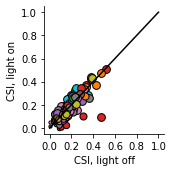

In [ ]:
cmax = 6
csisst = np.zeros((this_scsstanimal.shape[0],this_scsstanimal.shape[1],this_scsstanimal.shape[3]))
for ilight in range(2):
    csisst[:,:,ilight] = scf.csi_fn(this_scsstanimal[:,:,:cmax,ilight:ilight+1])#,sem=semsstanimal)
to_plot = csisst.copy()
plt.figure(figsize=(2.5,2.5))
noise = 0e-3
cs = ['C%d'%iexpt for iexpt in range(to_plot.shape[0])]
for iexpt in range(to_plot.shape[0]):
    for isize in range(to_plot.shape[1]):
        plt.scatter(to_plot[iexpt,isize,0]+noise*np.random.randn(1),to_plot[iexpt,isize,1]+noise*np.random.randn(1),s=10*(isize+1),c=cs[iexpt],edgecolor='k')
plt.plot((0,1),(0,1),c='k')
plt.xticks(np.linspace(0,1,6))
plt.yticks(np.linspace(0,1,6))
ut.erase_top_right()
plt.xlabel(r'CSI, light off')
plt.ylabel(r'CSI, light on')
plt.tight_layout()
plt.savefig(notebook_base+'figures/halo_sst_csi_light_on_light_off.eps')
print(sst.wilcoxon(to_plot[:,:,0].mean(1),to_plot[:,:,1].mean(1)))

In [ ]:
iconns=[0,2,3,4]

FileNotFoundError: [Errno 2] No such file or directory: 'figures/sst_csi_light_on_light_off_l4_silencing_baseline.jpg'

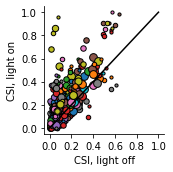

In [ ]:
reload(scof)
opt = {'alpha': 0.1, 'save': False}
scof.run_mi_plotting(network_resps,this_target_bin,plot_mi_fn=scof.scatter_csi,plot_mi_lbl='sst_csi_light_on_light_off_l4',ext='jpg',iconns=iconns,itype=1)

In [ ]:
import size_contrast_opto_figures as scof


(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)


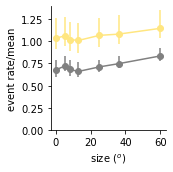

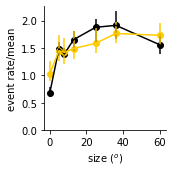

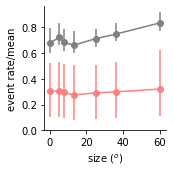

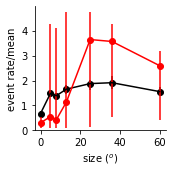

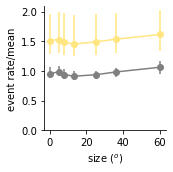

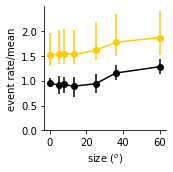

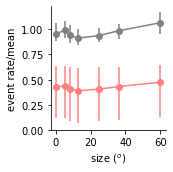

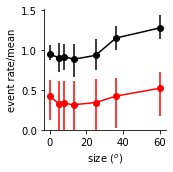

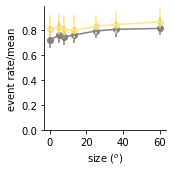

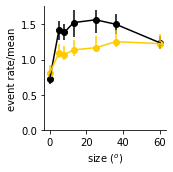

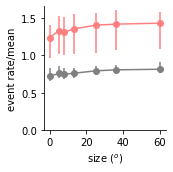

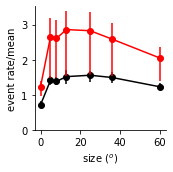

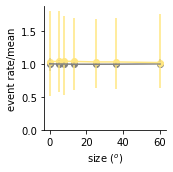

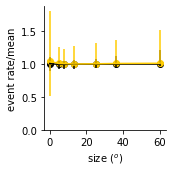

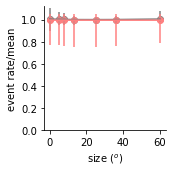

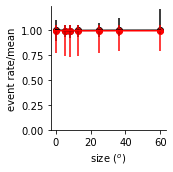

In [ ]:
reload(scof)
opt = {'save': False}
scof.run_mi_plotting(network_resps,this_target_bin,plot_mi_fn=scof.plot_size_tuning_errorbars,
    plot_mi_lbl='sst_rate_vs_size_contrast_%d_l4',ext='eps',iconns=iconns,itype=1,**opt)

In [ ]:
itype = 0

# this_target_amplitude = params[:,23,0,0]
this_target_amplitude = np.nanmean(params[:,5::6,0,0],axis=1) # pc x0 for highest contrast
# this_target_amplitude = np.nanmean(params[:,:,0,0],axis=1)
this_target_bin = np.maximum(np.digitize(this_target_amplitude,opto_levels)-1,0)
iconns = [0,2,3,4]


(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
p-value: 4.549759667363316e-11
72/89 higher
p-value: 8.464910503033258e-12
14/89 higher
p-value: 3.451771869035863e-11
72/89 higher
p-value: 8.08351430033266e-09
18/89 higher
p-value: 4.928228105906977e-15
81/89 higher
p-value: 0.01895734064093258
33/89 higher
p-value: 2.877648420879659e-14
77/89 higher
p-value: 5.3385601418658056e-09
20/89 higher
p-value: 2.5509729516632515e-16
0/89 higher
p-value: 6.319928881021859e-07
61/89 higher
p-value: 0.08099434521209911
36/89 higher
p-value: 0.004607947130528633
29/89 higher
p-value: 5.091170972388935e-15
7/89 higher
p-value: 7.99530256254394e-12
78/89 higher
p-value: 1.0380826542336431e-13
13/89 higher
p-value: 1.6432632107292547e-06
73/89 higher
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89,

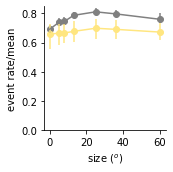

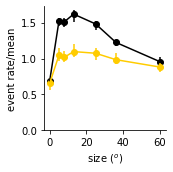

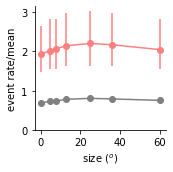

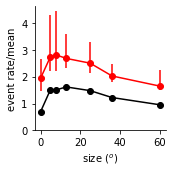

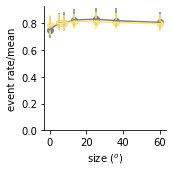

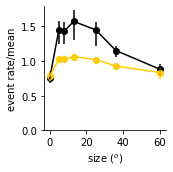

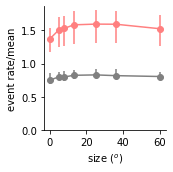

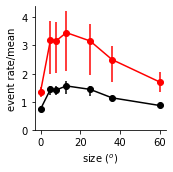

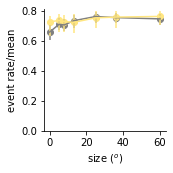

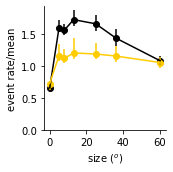

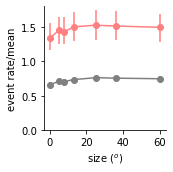

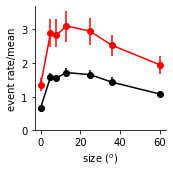

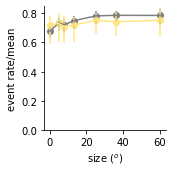

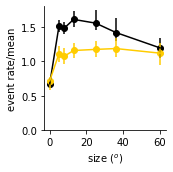

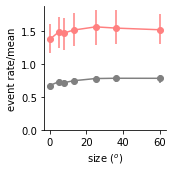

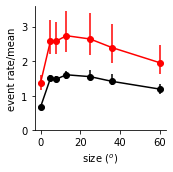

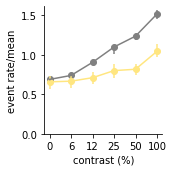

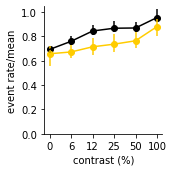

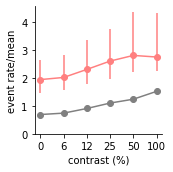

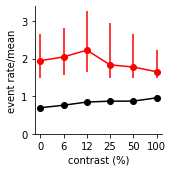

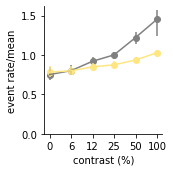

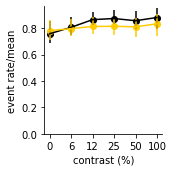

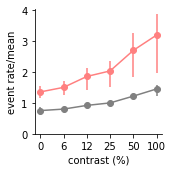

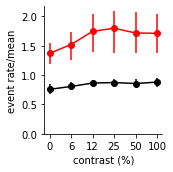

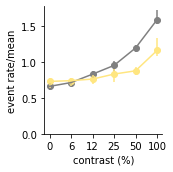

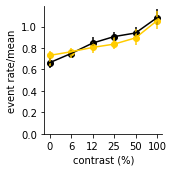

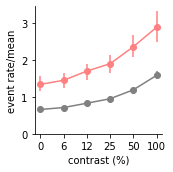

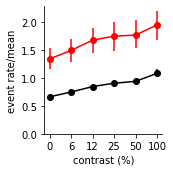

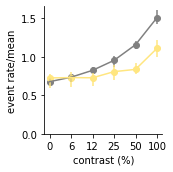

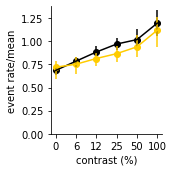

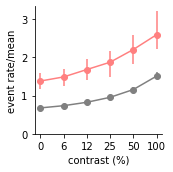

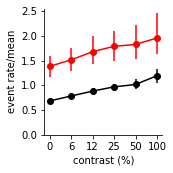

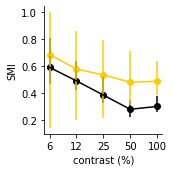

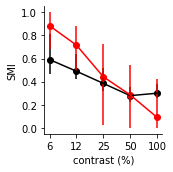

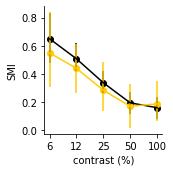

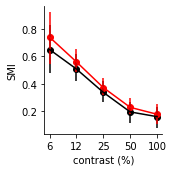

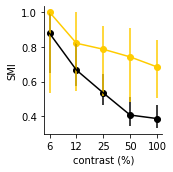

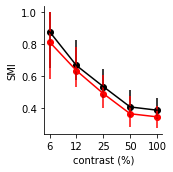

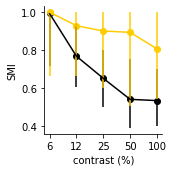

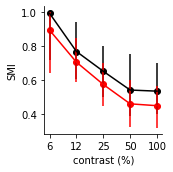

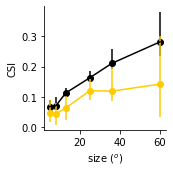

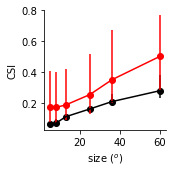

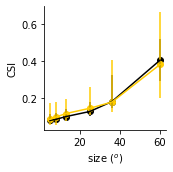

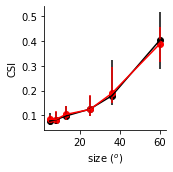

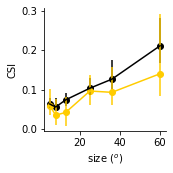

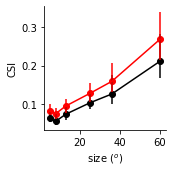

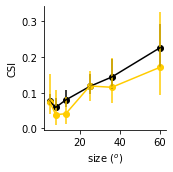

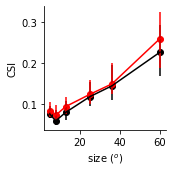

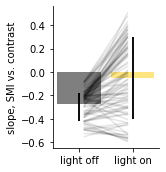

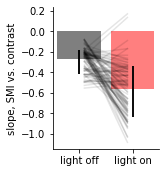

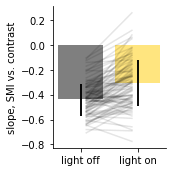

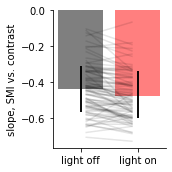

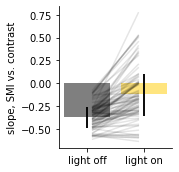

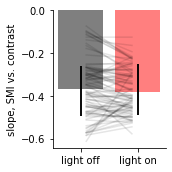

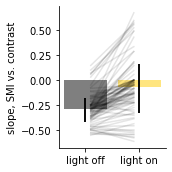

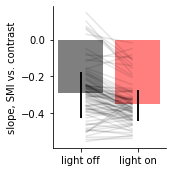

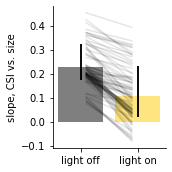

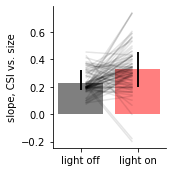

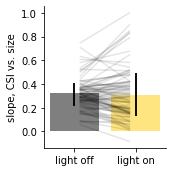

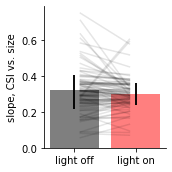

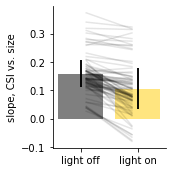

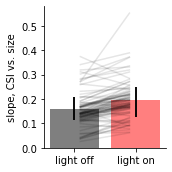

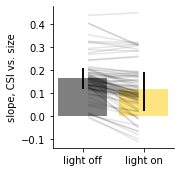

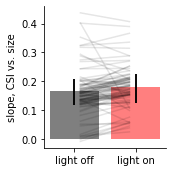

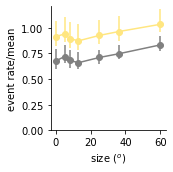

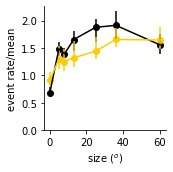

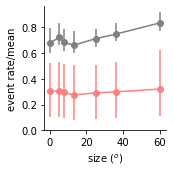

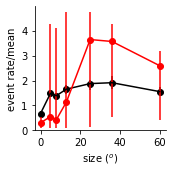

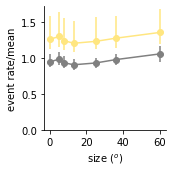

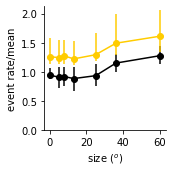

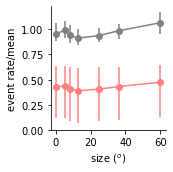

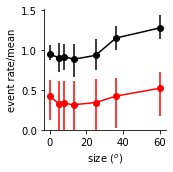

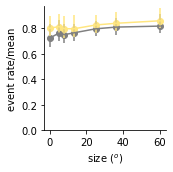

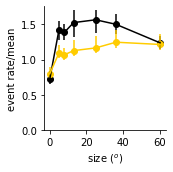

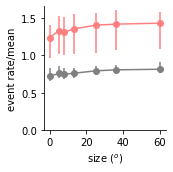

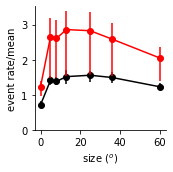

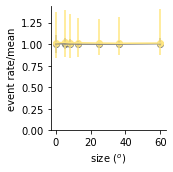

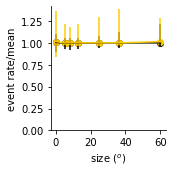

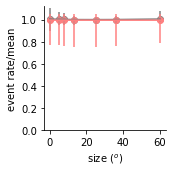

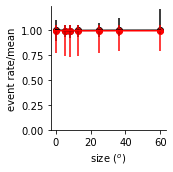

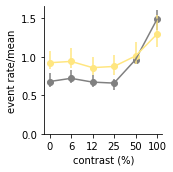

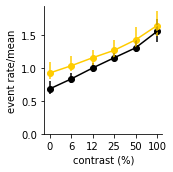

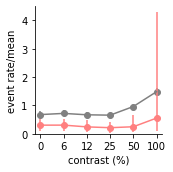

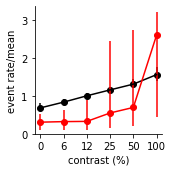

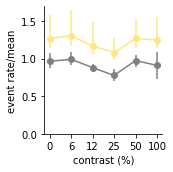

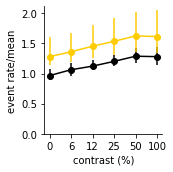

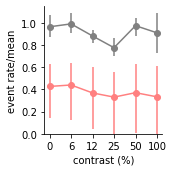

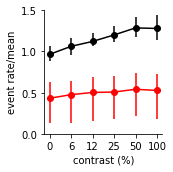

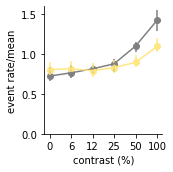

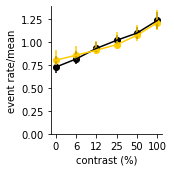

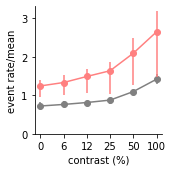

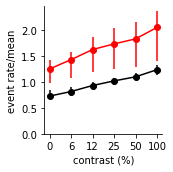

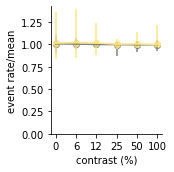

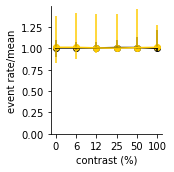

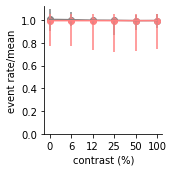

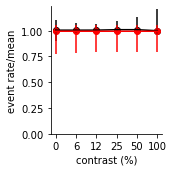

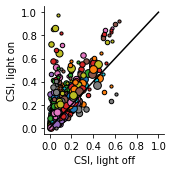

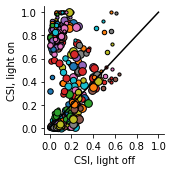

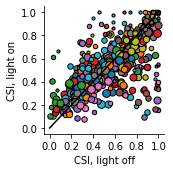

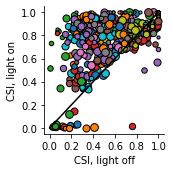

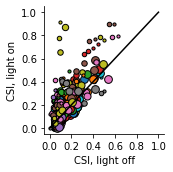

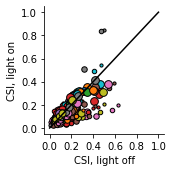

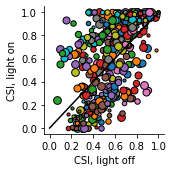

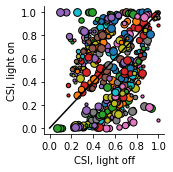

In [ ]:
# ibaseline = 15
# ilow = 5
# ihigh = 5
# ibaseline = 1
# ilow = 0
# ihigh = 2

itype = 0

# this_target_amplitude = params[:,23,0,0]
this_target_amplitude = np.nanmean(params[:,5::6,0,0],axis=1)
# this_target_amplitude = np.nanmean(params[:,:,0,0],axis=1)
this_target_bin = np.maximum(np.digitize(this_target_amplitude,opto_levels)-1,0)
this_target_bin = (
    int(0.5 * np.round(np.mean(target_bin[lkat]))) * np.ones((this_target_bin.shape[0],)),
    int(np.round(np.mean(target_bin[lkat]))) * np.ones((this_target_bin.shape[0],)),
)
# this_target_bin = np.digitize(target_amplitude,opto_levels)-1

# ucontrast = np.array((0,6,12,25,50,100))
# usize = np.array((5,8,13,25,36,60))
# this_nsize = len(usize)
# this_ncontrast = len(ucontrast)
# cfrac = np.linspace(1,0,this_nsize+1)[:-1]
# c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

import scipy.stats as sst
import opto_utils
import size_contrast_figures as scf
reload(scof)
reload(scf)

# light_lbls = ['silencing','activation']
# conn_lbls = ['baseline','pcpc_deleted','pcpv_deleted','pcvip_deleted','pcsst_deleted','']

# cs = [np.array((1,0.8,0)),np.array((1,0,0))]
iconns = [0,2,3,4]
# iconns = [0]

opt = {'save': False}

scof.run_mi_plotting(network_resps,this_target_bin,plot_mi_fn=scof.plot_size_tuning_errorbars,
    plot_mi_lbl='pc_rate_vs_size_contrast_%d_l4',ext='eps',iconns=iconns, **opt)

scof.run_mi_plotting(network_resps,this_target_bin,plot_mi_fn=scof.plot_contrast_tuning_errorbars,
    plot_mi_lbl='pc_rate_vs_contrast_size_%d_l4',ext='eps',iconns=iconns, **opt)

scof.run_mi_plotting(network_resps,this_target_bin,plot_mi_fn=scof.plot_smi_errorbars,
    plot_mi_lbl='pc_smi_vs_contrast_l4',ext='eps',iconns=iconns, **opt)

scof.run_mi_plotting(network_resps,this_target_bin,plot_mi_fn=scof.plot_csi_errorbars,
    plot_mi_lbl='pc_c50_vs_size_l4',ext='eps',iconns=iconns, **opt)

# opt = {'xaxis':ucontrast,'norm_to_max':True}
opt['xaxis'] = ucontrast
opt['norm_to_max'] = True
scof.run_mi_plotting(network_resps,this_target_bin,plot_mi_fn=scof.plot_smimi_bars_with_lines,
                     plot_mi_lbl='pc_delta_smi_l4',ext='jpg',iconns=iconns,**opt)

# opt = {'xaxis':usize,'norm_to_max':True}
opt['xaxis'] = usize
opt['norm_to_max'] = True
scof.run_mi_plotting(network_resps,this_target_bin,plot_mi_fn=scof.plot_csimi_bars_with_lines,
                     plot_mi_lbl='pc_delta_c50_l4',ext='jpg',iconns=iconns,**opt)

del opt['xaxis']
del opt['norm_to_max']

scof.run_mi_plotting(network_resps,this_target_bin,plot_mi_fn=scof.plot_size_tuning_errorbars,
    plot_mi_lbl='sst_rate_vs_size_contrast_%d_l4',ext='eps',iconns=iconns,itype=1,**opt)

scof.run_mi_plotting(network_resps,this_target_bin,plot_mi_fn=scof.plot_contrast_tuning_errorbars,
    plot_mi_lbl='sst_rate_vs_contrast_size_%d_l4',ext='eps',iconns=iconns,itype=1,**opt)

scof.run_mi_plotting(network_resps,this_target_bin,plot_mi_fn=scof.scatter_csi,
    plot_mi_lbl='sst_csi_light_on_light_off_l4',ext='eps',iconns=iconns,itype=1,**opt)

# # ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

# idir = 2
# # lkat = (network_resps[idir][0].max(1).max(1).max(1) < 10)
# lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
# # lkat = np.ones_like(lkat)

# for iconn in [0,2,3,4]:
#     ihigh = int(np.round(np.mean(target_bin[lkat])))#np.minimum(np.maximum(target_bin[lkat],0),20)#np.maximum(target_bin[lkat]-2,15)#ilight_drmax[2][iconn][lkat]
#     ilow = ihigh#30-ihigh#4#ilight_drmax[1][iconn][lkat]
#     idir = 0
#     xdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
#     xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
#     for idir,ilight,light_lbl,c,ylim in zip([1,2],[ilow,ihigh],light_lbls,cs,ylims):
#         ydata = network_resps[idir][iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
#         ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
        
#         smis = [scf.smi_fn(x[:,:,:,np.newaxis]) for x in preprocess(xdata_norm,ydata_norm,average=False)]
#         plt.figure(figsize=(2.5,2.5))
#         colors = [np.array((0,0,0))[np.newaxis],cs[idir-1][np.newaxis]]
#         for smi,color in zip(smis,colors):
#             ut.plot_pct_errorbars_hillel(np.arange(1,6),smi[:,np.newaxis,1:],colors=color,pct=(16,84))#,markersize=10)
#         plt.xticks(np.arange(len(ucontrast[rg])),ucontrast[rg])
#         ut.erase_top_right()
#         plt.xlabel('contrast (%)')
#         plt.ylabel('SMI')
#         plt.tight_layout()
# #         plt.savefig('figures/pc_smi_vs_contrast_l4_%s_%s.eps'%(light_lbl,conn_lbls[iconn]))

(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)
(89, 7, 6)


FileNotFoundError: [Errno 2] No such file or directory: 'cleaned'

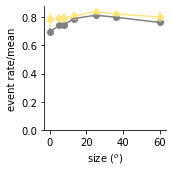

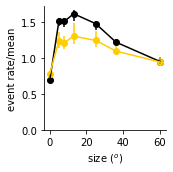

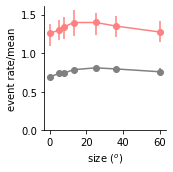

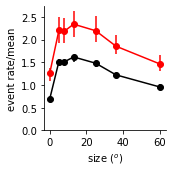

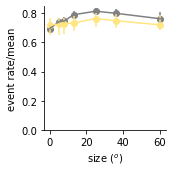

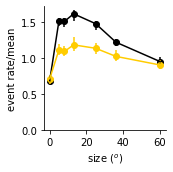

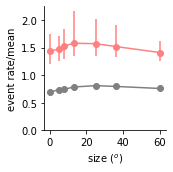

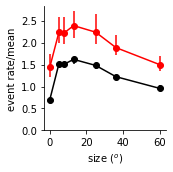

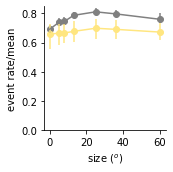

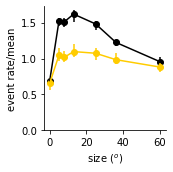

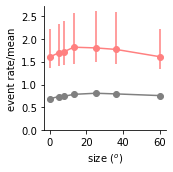

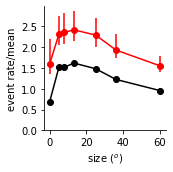

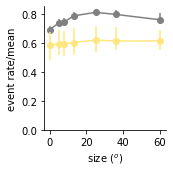

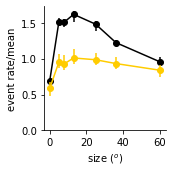

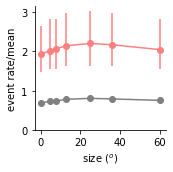

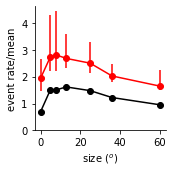

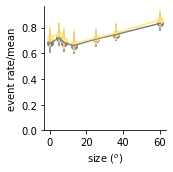

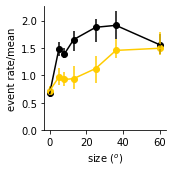

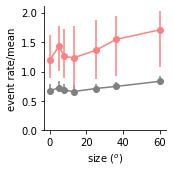

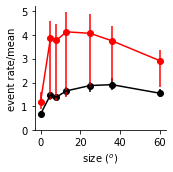

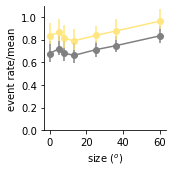

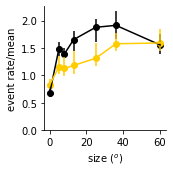

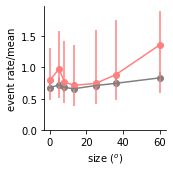

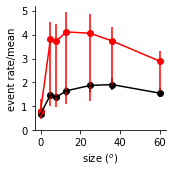

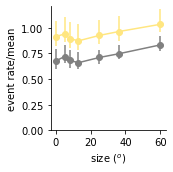

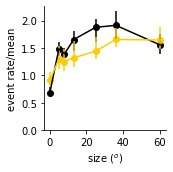

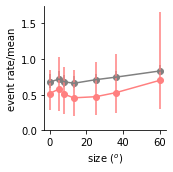

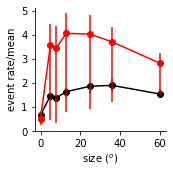

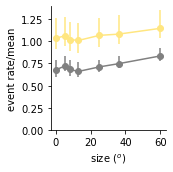

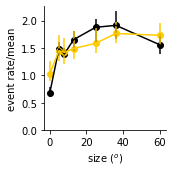

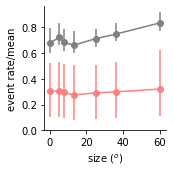

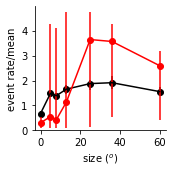

In [ ]:
# ibaseline = 15
# ilow = 5
# ihigh = 5
# ibaseline = 1
# ilow = 0
# ihigh = 2

itype = 0

# this_target_amplitude = params[:,23,0,0]
this_target_amplitude = np.nanmean(params[:,5::6,0,0],axis=1)
# this_target_amplitude = np.nanmean(params[:,:,0,0],axis=1)
this_target_bin = np.maximum(np.digitize(this_target_amplitude,opto_levels)-1,0)
# this_target_bin = (
#     int(0.5 * np.round(np.mean(target_bin[lkat]))) * np.ones((this_target_bin.shape[0],)),
#     int(np.round(np.mean(target_bin[lkat]))) * np.ones((this_target_bin.shape[0],)),
# )
# this_target_bin = np.digitize(target_amplitude,opto_levels)-1

# ucontrast = np.array((0,6,12,25,50,100))
# usize = np.array((5,8,13,25,36,60))
# this_nsize = len(usize)
# this_ncontrast = len(ucontrast)
# cfrac = np.linspace(1,0,this_nsize+1)[:-1]
# c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

import scipy.stats as sst
import opto_utils
import size_contrast_figures as scf
reload(scof)
reload(scf)

# light_lbls = ['silencing','activation']
# conn_lbls = ['baseline','pcpc_deleted','pcpv_deleted','pcvip_deleted','pcsst_deleted','']

# cs = [np.array((1,0.8,0)),np.array((1,0,0))]
iconns = [0]#[0,2,3,4]
# iconns = [0]
os.chdir('..')
opt = {'save': False}
for this_type in [0, 1]:
    for x in [0.0, 0.25, 0.5, 1.0]:
        this_one_target_bin = int(x * np.round(np.mean(target_bin[lkat]))) * np.ones((this_target_bin.shape[0],))
        plot_mi_lbl = 'pc_rate_vs_size_contrast_%d_l4'+f'_type_{this_type}_{str(x).replace(".","x")}'
        scof.run_mi_plotting(network_resps,this_one_target_bin,plot_mi_fn=scof.plot_size_tuning_errorbars,
            plot_mi_lbl=plot_mi_lbl,ext='eps',iconns=iconns, itype=this_type, **opt)
os.chdir('cleaned')

In [ ]:
opto_levels[int(this_target_bin[0])]

0.75

In [ ]:
plt.close('all')

p-value: 2.475110312161136e-09
64/89 higher
p-value: 8.464910503033258e-12
14/89 higher
p-value: 3.003877541971129e-10
68/89 higher
p-value: 8.08351430033266e-09
18/89 higher
p-value: 8.276783852872205e-15
80/89 higher
p-value: 0.01895734064093258
33/89 higher
p-value: 2.8574202100962303e-13
75/89 higher
p-value: 5.3385601418658056e-09
20/89 higher


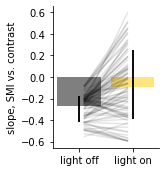

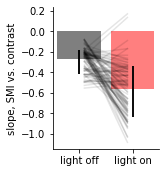

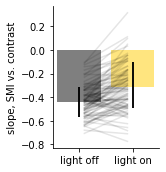

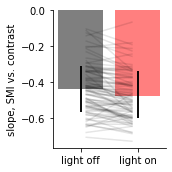

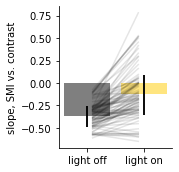

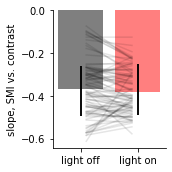

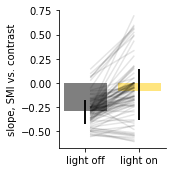

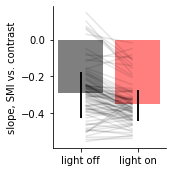

In [ ]:
reload(scof)
reload(scf)
iconns = [0, 2, 3, 4]
opt = {'xaxis':np.array(ucontrast),'norm_to_max':True,'save':False}
this_target_bin = np.maximum(np.digitize(this_target_amplitude,opto_levels)-1,0)
this_target_bin = int(np.round(np.mean(target_bin[lkat]))) * np.ones((this_target_bin.shape[0],))
scof.run_mi_plotting(network_resps,this_target_bin,plot_mi_fn=scof.plot_smimi_bars_with_lines,
                     plot_mi_lbl='pc_delta_smi_l4',ext='jpg',iconns=iconns,**opt)

# opt = {'xaxis':np.array(usize),'norm_to_max':True,'save':False}
# scof.run_mi_plotting(network_resps,this_target_bin,plot_mi_fn=scof.plot_csimi_bars_with_lines,
#                      plot_mi_lbl='pc_delta_c50_l4',ext='jpg',iconns=iconns,opt=opt)

In [ ]:
this_target_bin

array([15,  9,  1,  5, 11,  8, 17,  3,  2,  0, 12,  9,  9, 17,  0,  3,  8,
       10, 20,  0, 15,  7, 10,  7,  9, 11, 20, 20,  0, 18,  9,  8, 12,  9,
        0,  6,  9, 19, 16,  3, 20,  1,  6, 12,  1,  0,  0,  3, 18,  2, 16,
        5, 15, 13,  4, 20, 10,  0,  0, 12, 12,  0, 12, 10,  9, 17,  0,  9,
        0, 10,  0, 15,  0,  6, 12, 19,  0,  9, 14,  0, 18, 20,  6,  7, 11,
        2, 20,  8,  3,  8, 14,  5, 15, 15])

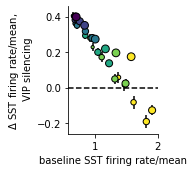

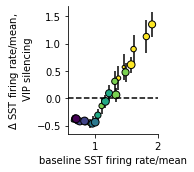

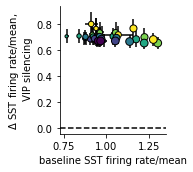

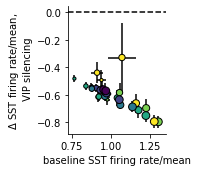

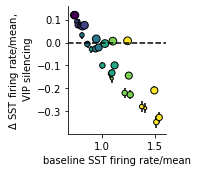

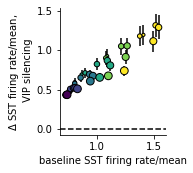

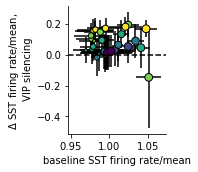

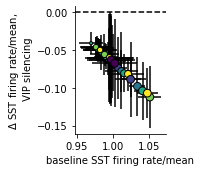

In [ ]:
reload(scof)

opt = {'ylim':None,'save':False}
scof.run_mi_plotting(network_resps,this_target_bin,plot_mi_fn=scof.scatter_size_contrast_x_dx,
                     plot_mi_lbl='sim_sst_delta_vip_halo',ext='eps',iconns=iconns,itype=1,**opt)

In [ ]:
# ibaseline = 15
# # ilow = 5
# # ihigh = 5
# # ibaseline = 1
# # ilow = 0
# # ihigh = 2

# itype = 0

# ucontrast = np.array((0,6,12,25,50,100))
# usize = np.array((5,8,13,25,36,60))
# this_nsize = len(usize)
# this_ncontrast = len(ucontrast)
# cfrac = np.linspace(1,0,this_nsize+1)[:-1]
# c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

# import scipy.stats as sst
# import opto_utils
# import size_contrast_opto_figures as scof

# light_lbls = ['silencing','activation']
# conn_lbls = ['baseline','pcpc_deleted','pcpv_deleted','pcvip_deleted','pcsst_deleted','']

# cs = [np.array((1,0.8,0)),np.array((1,0,0))]

# ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

# idir = 2
# # lkat = (network_resps[idir][0].max(1).max(1).max(1) < 10)
# lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
# # lkat = np.ones_like(lkat)

# for iconn in [0,2,3,4]:

# #     ilow = 5*np.ones((lkat.sum(),),dtype='int')
# #     ihigh = 5*np.ones((lkat.sum(),),dtype='int')
#     ihigh = int(np.round(np.mean(target_bin[lkat])))#np.minimum(np.maximum(target_bin[lkat],0),20)#np.maximum(target_bin[lkat]-2,15)#ilight_drmax[2][iconn][lkat]
#     ilow = ihigh#30-ihigh#4#ilight_drmax[1][iconn][lkat]
#     idir = 0
#     xdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
#     xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
#     for idir,ilight,light_lbl,c,ylim in zip([1,2],[ilow,ihigh],light_lbls,cs,ylims):
#         ydata = network_resps[idir][iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
#         ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
        
# #         these_datas = [x - x.min(1).min(1)[:,np.newaxis,np.newaxis] for x in [xdata_norm,ydata_norm]]
# #         smis = [x[:,-1,:]/np.max(x,1) for x in these_datas]
# #         smimis = np.concatenate([smi[:,0:1]-smi[:,5:6] for smi in smis],axis=1)
#         smi = np.stack([scf.smi_fn(x[:,:,:,np.newaxis]) for x in preprocess(xdata_norm,ydata_norm,average=False)],axis=-1)
#         smimis = scof.compute_slopes(smi,first_ind=1)
#         plt.figure(figsize=(2.5,2.5))
#         colors = [np.array((0,0,0))[np.newaxis],cs[idir-1][np.newaxis]]
#         ut.plot_bars_with_lines(smimis,colors=colors,alpha=0.05,errorstyle='pct')
# #         plt.ylabel(r'$\Delta$ SMI')
#         plt.ylabel('slope, SMI vs. contrast')
#         _,p = sst.wilcoxon(smimis[:,0],smimis[:,1])
#         print(p)
# #         xs = np.arange(6)[np.newaxis] #np.concatenate((np.arange(6)[np.newaxis],np.arange(6)[np.newaxis]),axis=0)#[np.newaxis]
# #         for this_size in these_sizes:
# #             sca.scatter_size_contrast(xs,np.nanmean(actual[:,this_size:this_size+1]-pred[:,this_size:this_size+1],0),equality_line=False,dot_scale=(this_size+1)*10)
# #         plt.axhline(0,c='k',linestyle='dashed')
# #             plt.xticks(np.arange(this_ncontrast),ucontrast)
# #         plt.gca().set_ylim(bottom=0)
#         ut.erase_top_right()
# #         plt.xlabel('contrast (%)')
# #         plt.ylabel('event rate/mean')
# # #         plt.ylim((-1,0.5))
# #         plt.ylim((-0.2,0.2))
#         plt.tight_layout()
#         plt.savefig('figures/pc_delta_smi_l4_%s_%s.jpg'%(light_lbl,conn_lbls[iconn]),dpi=300)

In [ ]:
# ibaseline = 15
# # ilow = 5
# # ihigh = 5
# # ibaseline = 1
# # ilow = 0
# # ihigh = 2

# itype = 0

# ucontrast = np.array((0,6,12,25,50,100))
# usize = np.array((5,8,13,25,36,60))
# this_nsize = len(usize)
# this_ncontrast = len(ucontrast)
# cfrac = np.linspace(1,0,this_nsize+1)[:-1]
# c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

# import scipy.stats as sst
# import opto_utils
# import size_contrast_figures as scf

# light_lbls = ['silencing','activation']
# conn_lbls = ['baseline','pcpc_deleted','pcpv_deleted','pcvip_deleted','pcsst_deleted','']

# cs = [np.array((1,0.8,0)),np.array((1,0,0))]

# ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

# idir = 2
# # lkat = (network_resps[idir][0].max(1).max(1).max(1) < 10)
# # lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0]])
# lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
# # lkat = np.ones_like(lkat)

# for iconn in [0,2,3,4]:

# #     ilow = 5*np.ones((lkat.sum(),),dtype='int')
# #     ihigh = 5*np.ones((lkat.sum(),),dtype='int')
#     ihigh = int(np.round(np.mean(target_bin[lkat])))#np.minimum(np.maximum(target_bin[lkat],0),20)#np.maximum(target_bin[lkat]-2,15)#ilight_drmax[2][iconn][lkat]
#     ilow = ihigh#30-ihigh#4#ilight_drmax[1][iconn][lkat]
#     idir = 0
#     xdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
#     xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
#     for idir,ilight,light_lbl,c,ylim in zip([1,2],[ilow,ihigh],light_lbls,cs,ylims):
#         ydata = network_resps[idir][iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
#         ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
        
# #         these_datas = [x - x.min(1).min(1)[:,np.newaxis,np.newaxis] for x in [xdata_norm,ydata_norm]]
# #         smis = [x[:,-1,:]/np.max(x,1) for x in these_datas]
# #         csis = [scf.csi_fn(x[:,:,:,np.newaxis]) for x in [xdata_norm,ydata_norm]]
#         csis = [scf.csi_fn(x[:,:,:,np.newaxis],subtract_min=True) for x in preprocess(xdata_norm,ydata_norm,average=True)]
#         plt.figure(figsize=(2.5,2.5))
#         colors = [np.array((0,0,0))[np.newaxis],cs[idir-1][np.newaxis]]
#         for csi,color in zip(csis,colors):
#             ut.plot_pct_errorbars_hillel(np.arange(6),csi[:,np.newaxis,:],colors=color,pct=(16,84))#,markersize=10)
#         plt.xticks(np.arange(6),usize)
# #         xs = np.arange(6)[np.newaxis] #np.concatenate((np.arange(6)[np.newaxis],np.arange(6)[np.newaxis]),axis=0)#[np.newaxis]
# #         for this_size in these_sizes:
# #             sca.scatter_size_contrast(xs,np.nanmean(actual[:,this_size:this_size+1]-pred[:,this_size:this_size+1],0),equality_line=False,dot_scale=(this_size+1)*10)
# #         plt.axhline(0,c='k',linestyle='dashed')
# #             plt.xticks(np.arange(this_ncontrast),ucontrast)
# #         plt.gca().set_ylim(bottom=0)
#         ut.erase_top_right()
#         plt.xlabel('size ($^o$)')
#         plt.ylabel('CSI')
# #         plt.ylim((-1,0.5))
# #         plt.ylim((-0.2,0.2))
#         plt.tight_layout()

#     #         plt.savefig('figures/pc_c50_vs_size_l4_%s_%s.eps'%(light_lbl,conn_lbls[iconn]))

In [ ]:
# reload(scf)

# ibaseline = 15
# # ilow = 5
# # ihigh = 5
# # ibaseline = 1
# # ilow = 0
# # ihigh = 2

# itype = 0

# ucontrast = np.array((0,6,12,25,50,100))
# usize = np.array((5,8,13,25,36,60))
# this_nsize = len(usize)
# this_ncontrast = len(ucontrast)
# cfrac = np.linspace(1,0,this_nsize+1)[:-1]
# c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

# import scipy.stats as sst
# import opto_utils
# import size_contrast_opto_figures as scof

# light_lbls = ['silencing','activation']
# conn_lbls = ['baseline','pcpc_deleted','pcpv_deleted','pcvip_deleted','pcsst_deleted','']

# cs = [np.array((1,0.8,0)),np.array((1,0,0))]

# ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

# idir = 2
# # lkat = (network_resps[idir][0].max(1).max(1).max(1) < 10)
# lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
# # lkat = np.ones_like(lkat)

# for iconn in [0,2,3,4]:

# #     ilow = 5*np.ones((lkat.sum(),),dtype='int')
# #     ihigh = 5*np.ones((lkat.sum(),),dtype='int')
#     ihigh = int(np.round(np.mean(target_bin[lkat])))#np.minimum(np.maximum(target_bin[lkat],0),20)#np.maximum(target_bin[lkat]-2,15)#ilight_drmax[2][iconn][lkat]
#     ilow = ihigh#30-ihigh#4#ilight_drmax[1][iconn][lkat]
#     idir = 0
#     xdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
#     xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
#     for idir,ilight,light_lbl,c,ylim in zip([1,2],[ilow,ihigh],light_lbls,cs,ylims):
#         ydata = network_resps[idir][iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
#         ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
        
# #         these_datas = [x - x.min(1).min(1)[:,np.newaxis,np.newaxis] for x in [xdata_norm,ydata_norm]]
# #         smis = [x[:,-1,:]/np.max(x,1) for x in these_datas]
# #         smimis = np.concatenate([smi[:,0:1]-smi[:,5:6] for smi in smis],axis=1)
#         csi = np.stack([scf.csi_fn(x[:,:,:,np.newaxis],subtract_min=True) for x in preprocess(xdata_norm,ydata_norm,average=True)],axis=-1)
#         csimis = scof.compute_slopes(csi,first_ind=0)
#         plt.figure(figsize=(2.5,2.5))
#         colors = [np.array((0,0,0))[np.newaxis],cs[idir-1][np.newaxis]]
#         ut.plot_bars_with_lines(csimis,colors=colors,alpha=0.05,errorstyle='pct')
# #         plt.ylabel(r'$\Delta$ SMI')
#         plt.ylabel('slope, CSI vs. size')
#         _,p = sst.wilcoxon(csimis[:,0],csimis[:,1])
#         print(p)
# #         xs = np.arange(6)[np.newaxis] #np.concatenate((np.arange(6)[np.newaxis],np.arange(6)[np.newaxis]),axis=0)#[np.newaxis]
# #         for this_size in these_sizes:
# #             sca.scatter_size_contrast(xs,np.nanmean(actual[:,this_size:this_size+1]-pred[:,this_size:this_size+1],0),equality_line=False,dot_scale=(this_size+1)*10)
# #         plt.axhline(0,c='k',linestyle='dashed')
# #             plt.xticks(np.arange(this_ncontrast),ucontrast)
# #         plt.gca().set_ylim(bottom=0)
#         ut.erase_top_right()
# #         plt.xlabel('contrast (%)')
# #         plt.ylabel('event rate/mean')
# # #         plt.ylim((-1,0.5))
# #         plt.ylim((-0.2,0.2))
#         plt.tight_layout()
#         plt.savefig('figures/pc_delta_c50_l4_%s_%s.jpg'%(light_lbl,conn_lbls[iconn]),dpi=300)

In [ ]:
# ibaseline = 15
# # ilow = 5
# # ihigh = 5
# # ibaseline = 1
# # ilow = 0
# # ihigh = 2

# itype = 0

# ucontrast = np.array((0,6,12,25,50,100))
# usize = np.array((5,8,13,25,36,60))
# this_nsize = len(usize)
# this_ncontrast = len(ucontrast)
# cfrac = np.linspace(1,0,this_nsize+1)[:-1]
# c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

# import scipy.stats as sst
# import opto_utils

# light_lbls = ['silencing','activation']
# conn_lbls = ['baseline','pcpc_deleted','pcpv_deleted','pcvip_deleted','pcsst_deleted','']

# cs = [np.array((1,0.8,0)),np.array((1,0,0))]

# ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

# idir = 2
# # lkat = (network_resps[idir][0].max(1).max(1).max(1) < 10)
# lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
# # lkat = np.ones_like(lkat)

# for iconn in [0,2,3,4]:

# #     ilow = 5*np.ones((lkat.sum(),),dtype='int')
# #     ihigh = 5*np.ones((lkat.sum(),),dtype='int')
#     ihigh = int(np.round(np.mean(target_bin[lkat])))#np.minimum(np.maximum(target_bin[lkat],0),20)#np.maximum(target_bin[lkat]-2,15)#ilight_drmax[2][iconn][lkat]
#     ilow = ihigh#30-ihigh#4#ilight_drmax[1][iconn][lkat]
#     idir = 0
#     xdata = network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
#     xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
#     for idir,ilight,light_lbl,c,ylim in zip([1,2],[ilow,ihigh],light_lbls,cs,ylims):
#         ydata = network_resps[idir][iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
#         ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
        
#         these_datas = [x - x.min(1).min(1)[:,np.newaxis,np.newaxis] for x in [xdata_norm,ydata_norm]]
#         smis = [x[:,-1,:]/np.max(x,1) for x in these_datas]
#         plt.figure(figsize=(2.5,2.5))
#         colors = [np.array((0,0,0))[np.newaxis],cs[idir-1][np.newaxis]]
#         for smi,color in zip(smis,colors):
#             ut.plot_pct_errorbars_hillel(np.arange(6),smi[:,np.newaxis],colors=color,pct=(16,84))#,markersize=10)
#         plt.xticks(np.arange(6),ucontrast)
# #         xs = np.arange(6)[np.newaxis] #np.concatenate((np.arange(6)[np.newaxis],np.arange(6)[np.newaxis]),axis=0)#[np.newaxis]
# #         for this_size in these_sizes:
# #             sca.scatter_size_contrast(xs,np.nanmean(actual[:,this_size:this_size+1]-pred[:,this_size:this_size+1],0),equality_line=False,dot_scale=(this_size+1)*10)
# #         plt.axhline(0,c='k',linestyle='dashed')
# #             plt.xticks(np.arange(this_ncontrast),ucontrast)
# #         plt.gca().set_ylim(bottom=0)
#         ut.erase_top_right()
#         plt.xlabel('contrast (%)')
#         plt.ylabel('event rate/mean')
# #         plt.ylim((-1,0.5))
# #         plt.ylim((-0.2,0.2))
#         plt.tight_layout()
# #         plt.savefig('figures/pc_rate_vs_contrast_size_%d_l4_%s_%s.eps'%(this_size,light_lbl,conn_lbls[iconn]))

In [ ]:
xdata_norm.shape

(89, 6, 6)

0.12821156812745216
0.12821156812745216
halo
p-value:
WilcoxonResult(statistic=1847.0, pvalue=0.5246464780347189)
halo
p-value:
WilcoxonResult(statistic=11.0, pvalue=3.7044382273599564e-16)
0.2548899446482812
0.2548899446482812
chrimson
p-value:
WilcoxonResult(statistic=1858.0, pvalue=0.5543898253755807)
chrimson
p-value:
WilcoxonResult(statistic=802.0, pvalue=9.032566346873514e-07)
0.12821156812745216
0.008436637371726485
halo
p-value:
WilcoxonResult(statistic=1054.0, pvalue=0.00010419410179762839)
halo
p-value:
WilcoxonResult(statistic=1533.0, pvalue=0.05474783653578478)
0.2548899446482812
0.012620103777007069
chrimson
p-value:
WilcoxonResult(statistic=1684.0, pvalue=0.19254621682433426)
chrimson
p-value:
WilcoxonResult(statistic=1251.0, pvalue=0.0021076898887374905)
0.12821156812745216
0.15046398955602602
halo
p-value:
WilcoxonResult(statistic=1283.0, pvalue=0.003243135070527757)
halo
p-value:
WilcoxonResult(statistic=28.0, pvalue=6.567579578291704e-16)
0.2548899446482812
0.03351885

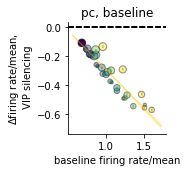

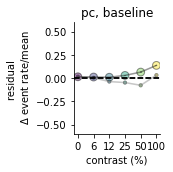

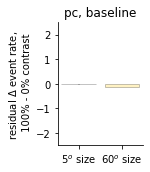

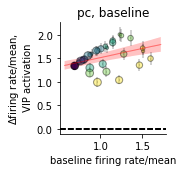

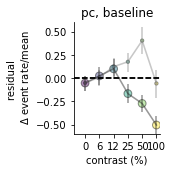

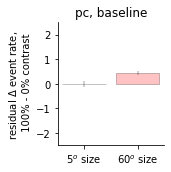

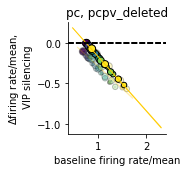

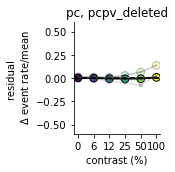

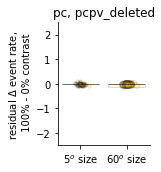

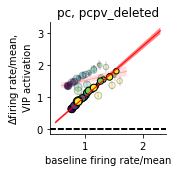

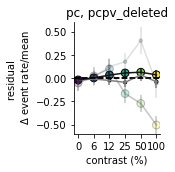

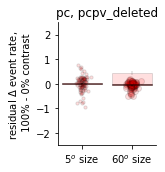

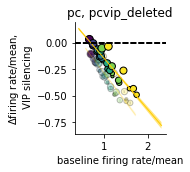

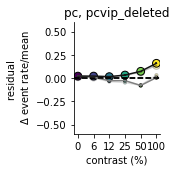

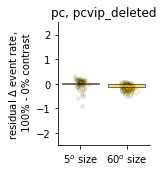

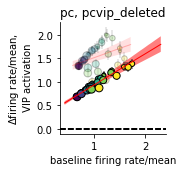

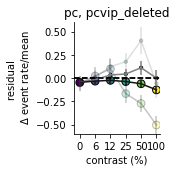

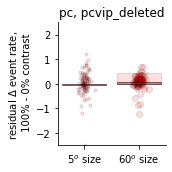

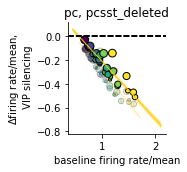

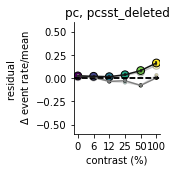

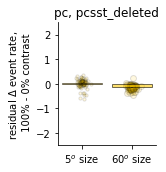

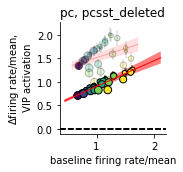

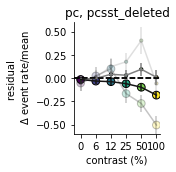

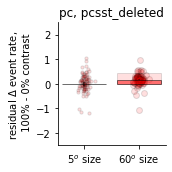

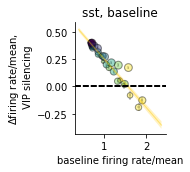

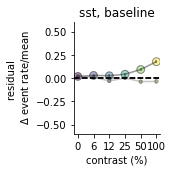

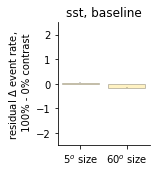

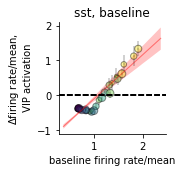

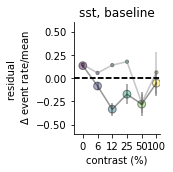

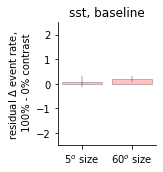

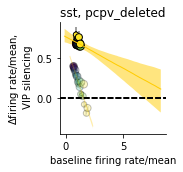

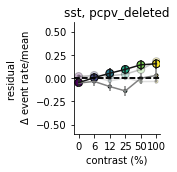

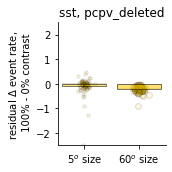

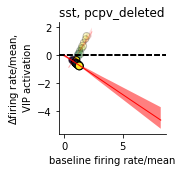

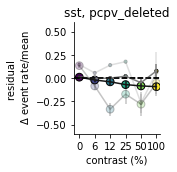

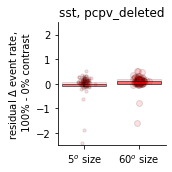

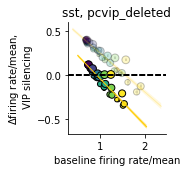

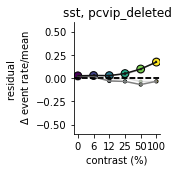

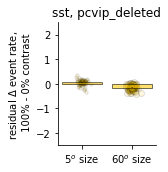

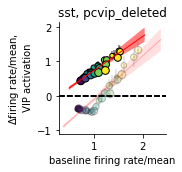

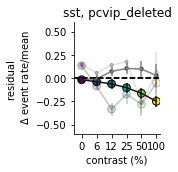

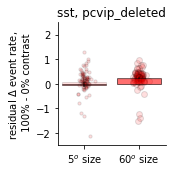

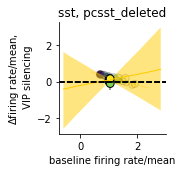

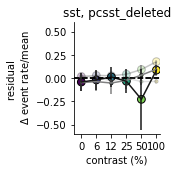

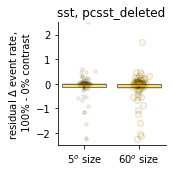

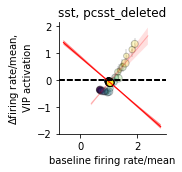

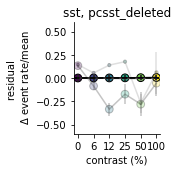

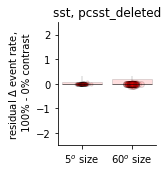

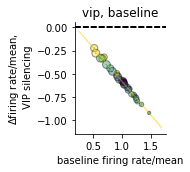

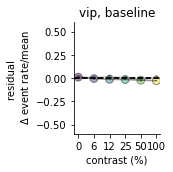

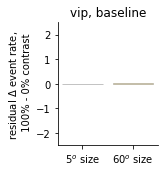

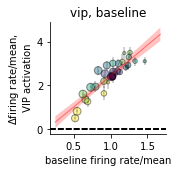

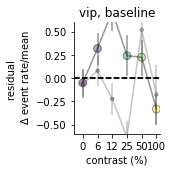

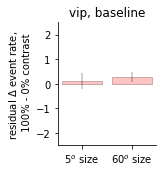

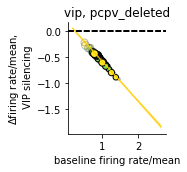

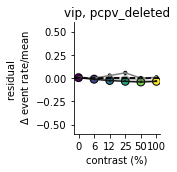

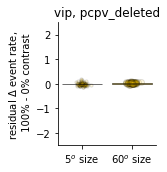

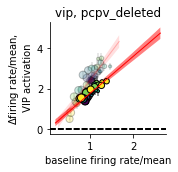

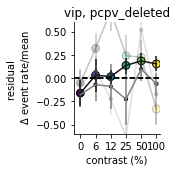

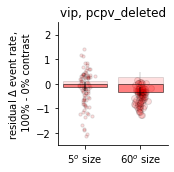

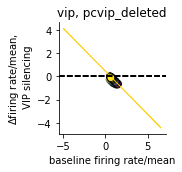

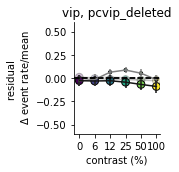

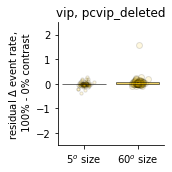

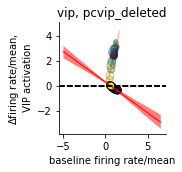

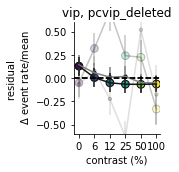

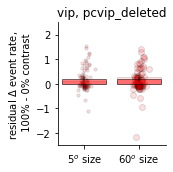

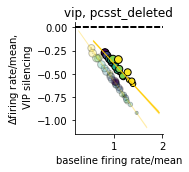

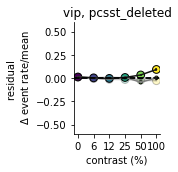

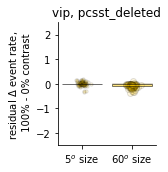

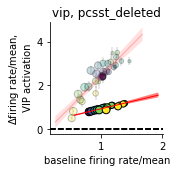

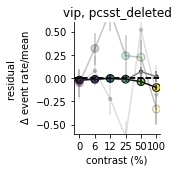

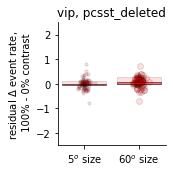

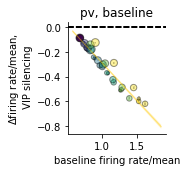

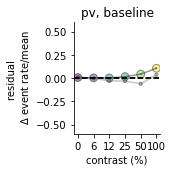

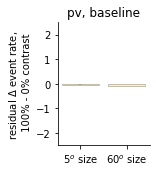

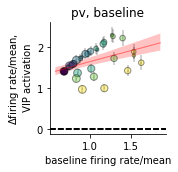

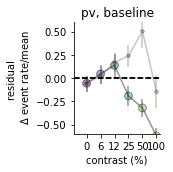

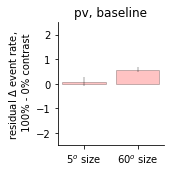

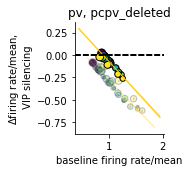

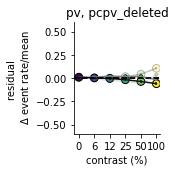

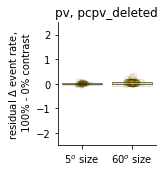

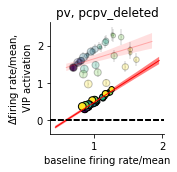

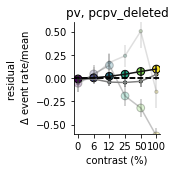

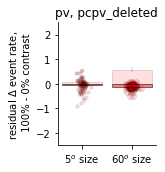

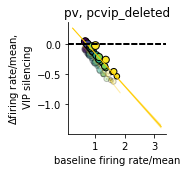

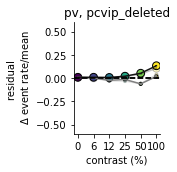

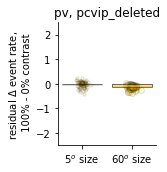

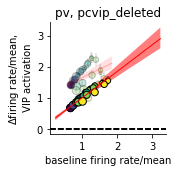

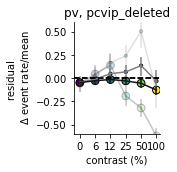

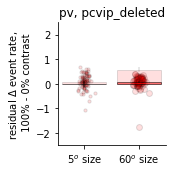

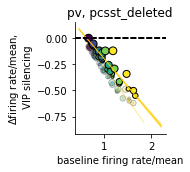

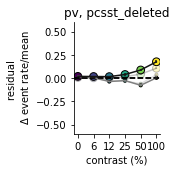

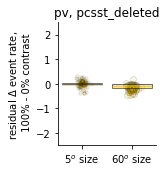

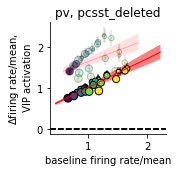

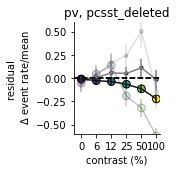

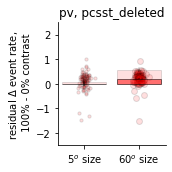

In [ ]:
ibaseline = 15
# ilow = 5
# ihigh = 5
# ibaseline = 1
# ilow = 0
# ihigh = 2

save_fig = False

ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,8,13,25,36,60))
this_nsize = len(usize)
this_ncontrast = len(ucontrast)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

import scipy.stats as sst
import opto_utils
reload(opto_utils)
reload(ut)

celltype_lbls = ['pc','sst','vip','pv']
light_lbls = ['silencing','activation']
conn_lbls = ['baseline','pcpc_deleted','pcpv_deleted','pcvip_deleted','pcsst_deleted','']

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

idir = 2
lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
# lkat = np.ones_like(lkat)

for itype in [0,1,2,3]:

    for iconn in [0,2,3,4]:

    #     ilow = 5*np.ones((lkat.sum(),),dtype='int')
    #     ihigh = 5*np.ones((lkat.sum(),),dtype='int')

        for idir,light_lbl,c,ylim,opto_lbl in zip([1,2],light_lbls,cs,ylims,opto_lbls):

            plt.figure(figsize=(2.5,2.5))
            plt.title('%s, %s'%(celltype_lbls[itype],conn_lbls[iconn]))
            for this_iconn in [0,iconn]:
                ilight = int(np.round(np.mean(target_bin[lkat])))##ilight_drmax[idir][this_iconn][lkat]

                xdata = network_resps[0][this_iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
                xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]

                ydata = network_resps[idir][this_iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
                ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
        #         sca.scatter_size_contrast_errorbar(xdata_norm,ydata_norm-xdata_norm,equality_line=False,square=False)
                if this_iconn==0:
                    alpha = 0.25
                else:
                    alpha = 1
                opto_utils.scatter_size_contrast_x_dx_errorbar(np.concatenate((xdata_norm[:,:,:,np.newaxis],ydata_norm[:,:,:,np.newaxis]),axis=-1),opto_color=c,alpha=alpha)
                plt.axhline(0,c='k',linestyle='dashed')
            #     ut.zero_origin('x')
                plt.xlabel('baseline firing rate/mean')
                plt.ylabel('$\Delta$firing rate/mean, \n VIP %s'%light_lbl)
                ut.erase_top_right()
                plt.tight_layout()
            if save_fig:
                plt.savefig('figures/delta_rate_vs_rate_l4_%s_%s_%s_overlay_intact.jpg'%(light_lbl,celltype_lbls[itype],conn_lbls[iconn]),dpi=300)

            plt.figure(figsize=(2.5,2.5))
            plt.title('%s, %s'%(celltype_lbls[itype],conn_lbls[iconn]))
            for this_iconn in [0,iconn]:
                ilight = int(np.round(np.mean(target_bin[lkat])))#ilight_drmax[idir][this_iconn][lkat]

                xdata = network_resps[0][this_iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
                xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]

                ydata = network_resps[idir][this_iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
                ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]

                slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())

                pred = slope*xdata_norm + intercept
                actual = (ydata_norm-xdata_norm)
                residual = actual - pred
                these_sizes = [0,5]#[0,5]
                if this_iconn==0:
                    alpha = 0.25
                else:
                    alpha = 1
                ut.plot_bootstrapped_errorbars_hillel(np.arange(6),actual[:,these_sizes]-pred[:,these_sizes],colors=c_l23[these_sizes],pct=(16,84),markersize=0,alpha=alpha)
                xs = np.arange(6)[np.newaxis] #np.concatenate((np.arange(6)[np.newaxis],np.arange(6)[np.newaxis]),axis=0)#[np.newaxis]
                for this_size in these_sizes:
                    sca.scatter_size_contrast(xs,np.nanmean(actual[:,this_size:this_size+1]-pred[:,this_size:this_size+1],0),equality_line=False,dot_scale=(this_size+1)*10,alpha=alpha)
                plt.axhline(0,c='k',linestyle='dashed')
                plt.xticks(np.arange(this_ncontrast),ucontrast)
                ut.erase_top_right()
                plt.xlabel('contrast (%)')
                plt.ylabel('residual \n $\Delta$ event rate/mean')
                plt.ylim((-0.6,0.6))
                plt.tight_layout()
            if save_fig:
                plt.savefig('figures/residual_delta_rate_vs_contrast_l4_%s_%s_%s_overlay_intact.jpg'%(light_lbl,celltype_lbls[itype],conn_lbls[iconn]),dpi=300)

            plt.figure(figsize=(2.5,2.5))
            plt.title('%s, %s'%(celltype_lbls[itype],conn_lbls[iconn]))
            for this_iconn in [0,iconn]:
                ilight = int(np.round(np.mean(target_bin[lkat])))#ilight_drmax[idir][this_iconn][lkat]

                xdata = network_resps[0][this_iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
                xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]

                ydata = network_resps[idir][this_iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
                ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]

                slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())

                pred = slope*xdata_norm + intercept
                actual = (ydata_norm-xdata_norm)
                residual = actual - pred
                these_sizes = [0,5]#[0,5]
                base_alpha = 0.125
                if this_iconn==0:
                    alpha = 0.25*base_alpha
                    show_dots = False
                else:
                    alpha = 1*base_alpha
                    show_dots = True
                
                d_residual = [residual[:,this_size,0]-residual[:,this_size,-1] for this_size in these_sizes]
                ut.bar_with_dots(d_residual,colors=[cs[idir-1] for _ in range(len(these_sizes))],\
                                 tick_labels=['%d$^o$ size'%u for u in usize[these_sizes]],\
                                 s=[dot_sizes[isize] for isize in these_sizes],\
                                alpha=alpha,bar_alpha_frac=4,show_dots=show_dots)
            plt.ylabel('residual $\Delta$ event rate, \n 100% - 0% contrast')
    #         plt.title('%d$^o$ size'%usize[isize])
            ut.erase_top_right()
            plt.tight_layout()
            plt.ylim((-2.5,2.5))
            if save_fig:
                plt.savefig('figures/sim_residual_vip_%s_effect_%s_overlay_intact.jpg'%(opto_lbl,conn_lbls[iconn]),dpi=300)
            for isize,this_size in enumerate(these_sizes):
                print(opto_lbl)
                print('p-value:')
                print(sst.wilcoxon(d_residual[isize]))
            
        # plt.figure(figsize=(2.5,2.5))
        # xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
        # ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
        # sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
        # plt.axhline(0,c='k',linestyle='dashed')
        # ut.zero_origin('x')


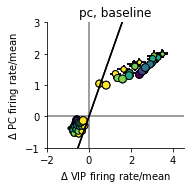

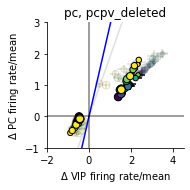

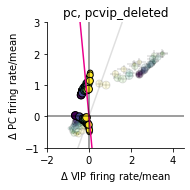

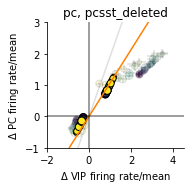

In [ ]:
reload(sca)
ibaseline = 15
# ilow = 5
# ihigh = 5
# ibaseline = 1
# ilow = 0
# ihigh = 2
nreps = 100

ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,8,13,25,36,60))
this_nsize = len(usize)
this_ncontrast = len(ucontrast)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))

import scipy.stats as sst
import opto_utils
reload(opto_utils)
reload(ut)

celltype_lbls = ['pc','sst','vip','pv']
light_lbls = ['silencing','activation']
conn_lbls = ['baseline','pcpc_deleted','pcpv_deleted','pcvip_deleted','pcsst_deleted','']

conn_colors = ['k','','b',np.array((236, 0, 140))/255,np.array((1,0.5,0)),'','']

cs = [np.array((1,0.8,0)),np.array((1,0,0))]

ylims = [np.array((-0.58,0.02)),np.array((-0.02,0.55))]

idir = 2
lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
# lkat = np.ones_like(lkat)

for itype in [0]:

    for iconn in [0,2,3,4]:
        
        plt.figure(figsize=(2.5,2.5))
        plt.title('%s, %s'%(celltype_lbls[itype],conn_lbls[iconn]))

        for this_iconn in [0,iconn]:
            
            vipdiffs = np.array(())
            pcdiffs = np.array(())
            
            for idir,light_lbl,c,ylim in zip([1,2],light_lbls,cs,ylims):

                ilight = int(np.round(np.mean(target_bin[lkat])))#ilight_drmax[idir][this_iconn][lkat]

                xdata = network_resps[0][this_iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
                xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]

                ydata = network_resps[idir][this_iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
                ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]

                pcdiff = ydata_norm - xdata_norm
                
                slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())

                pred = slope*xdata_norm + intercept
                actual = (ydata_norm-xdata_norm)
                residual = actual - pred
                
                viptype = 2
                xdata = network_resps[0][this_iconn][lkat][:,ibaseline,:,viptype].reshape((-1,6,6))
                xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]

                ydata = network_resps[idir][this_iconn][lkat][:,:,:,viptype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
                ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
                
                vipdiff = ydata_norm - xdata_norm
                
                if this_iconn==0 and not iconn==0:
                    alpha = 0.125
                else:
                    alpha = 1
                
                sca.scatter_size_contrast_errorbar(vipdiff,pcdiff,nsize=6,ncontrast=6,square=False,equality_line=False,alpha=alpha)
#                 sca.scatter_size_contrast_errorbar(pcdiff,vipdiff,nsize=6,ncontrast=6,square=False,equality_line=False,alpha=alpha)
                
                vipdiffs = np.concatenate((vipdiffs,vipdiff.flatten()))
                pcdiffs = np.concatenate((pcdiffs,pcdiff.flatten()))
            
            opto_utils.plot_bootstrapped_regression_lines(np.concatenate((vipdiffs[:,np.newaxis],pcdiffs[:,np.newaxis]),axis=1),alpha=alpha,c=conn_colors[this_iconn],incl_intercept=False,nreps=nreps,flipxy=True)
#             opto_utils.plot_bootstrapped_regression_lines(np.concatenate((pcdiffs[:,np.newaxis],vipdiffs[:,np.newaxis]),axis=1),alpha=alpha,c=conn_colors[this_iconn],incl_intercept=False,equal_cond=True,nreps=nreps)
#             slp = opto_utils.compute_slope(pcdiffs,vipdiffs)
#             plt.plot((np.nanmin(vipdiffs),np.nanmax(vipdiffs)),np.array((np.nanmin(vipdiffs),np.nanmax(vipdiffs)))/slp,c='k',linestyle='dashed',alpha=alpha)
        plt.xlim((-2,4.5))
        plt.ylim((-1,3))
#         plt.ylim((-2,4))
#         plt.xlim((-1,2))
        plt.axhline(0,c='k',alpha=0.5)
        plt.axvline(0,c='k',alpha=0.5)
        ut.erase_top_right()
        plt.tight_layout()
        plt.xlabel('$\Delta$ VIP firing rate/mean')
        plt.ylabel('$\Delta$ PC firing rate/mean')
#         plt.ylabel('$\Delta$ VIP firing rate/mean')
#         plt.xlabel('$\Delta$ PC firing rate/mean')
#         plt.savefig('figures/pc_vs_vip_delta_event_rate_%s.jpg'%conn_lbls[iconn],dpi=300)
#         plt.savefig('figures/vip_vs_pc_delta_event_rate_%s.jpg'%conn_lbls[iconn],dpi=300)

            #                 these_sizes = [0,5]#[0,5]
#                 if this_iconn==0:
#                     alpha = 0.25
#                 else:
#                     alpha = 1
#                 ut.plot_bootstrapped_errorbars_hillel(np.arange(6),actual[:,these_sizes]-pred[:,these_sizes],colors=c_l23[these_sizes],pct=(16,84),markersize=0,alpha=alpha)
#                 xs = np.arange(6)[np.newaxis] #np.concatenate((np.arange(6)[np.newaxis],np.arange(6)[np.newaxis]),axis=0)#[np.newaxis]
#                 for this_size in these_sizes:
#                     sca.scatter_size_contrast(xs,np.nanmean(actual[:,this_size:this_size+1]-pred[:,this_size:this_size+1],0),equality_line=False,dot_scale=(this_size+1)*10,alpha=alpha)
#                 plt.axhline(0,c='k',linestyle='dashed')
#                 plt.xticks(np.arange(this_ncontrast),ucontrast)
#                 ut.erase_top_right()
#                 plt.xlabel('contrast (%)')
#                 plt.ylabel('residual \n $\Delta$ event rate/mean')
#                 plt.ylim((-0.6,0.4))
#                 plt.tight_layout()
#             plt.savefig('figures/residual_delta_rate_vs_contrast_l4_%s_%s_%s_overlay_intact.jpg'%(light_lbl,celltype_lbls[itype],conn_lbls[iconn]),dpi=300)

        # plt.figure(figsize=(2.5,2.5))
        # xdata = network_resp[:,ibaseline,:,itype].reshape((-1,6,6))
        # ydata = network_resp[:,ihigh,:,itype].reshape((-1,6,6))
        # sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
        # plt.axhline(0,c='k',linestyle='dashed')
        # ut.zero_origin('x')


In [ ]:
target_bin.mean()

8.840425531914894

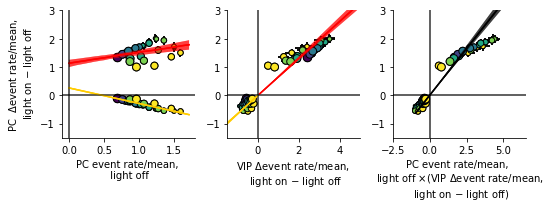

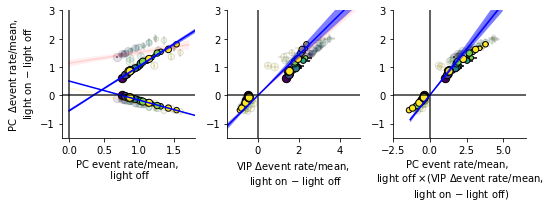

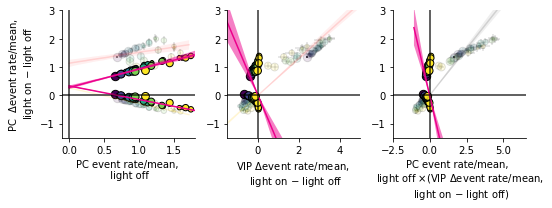

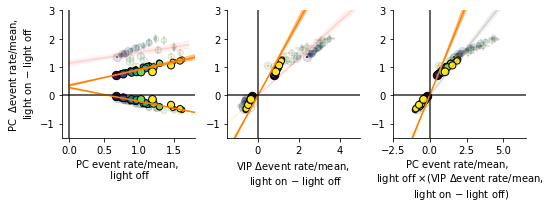

In [ ]:
save_fig = False
# plt.figure()
# mx = np.nanmax(np.nanmean(scsstanimal,0))
# for ilight in range(2):
#     plt.subplot(1,2,ilight+1)
#     plt.imshow(np.nanmean(scsstanimal,0)[:,:,ilight],vmin=0,vmax=mx)

reload(opto_utils)

def plot_all_three(pcrate,vipdiff,pcdiff,alpha=1):
    plt.subplot(1,3,2)
    sca.scatter_size_contrast_errorbar(vipdiff,pcdiff,equate_0=True,square=False,equality_line=False,alpha=alpha)
    plt.subplot(1,3,1)
    sca.scatter_size_contrast_errorbar(pcrate,pcdiff,equate_0=True,square=False,equality_line=False,alpha=alpha)
    plt.subplot(1,3,3)
    sca.scatter_size_contrast_errorbar(pcrate*vipdiff,pcdiff,equate_0=True,square=False,equality_line=False,alpha=alpha)
    
def regress_all_three(pcrates,vipdiffs,pcdiffs,c='k',alpha=1):
    plt.subplot(1,3,2)
    if c=='k':
        this_c1 = np.array((1,0.8,0))
        this_c2 = np.array((1,0,0))
    else:
        this_c1 = c
        this_c2 = c
    opto_utils.plot_bootstrapped_regression_lines(np.concatenate((pcdiffs[:,:,:,np.newaxis],vipdiffs[:,:,:,np.newaxis]),axis=-1),
                                                  alpha=alpha,c=[this_c1,this_c2],incl_intercept=False,nreps=nreps,flipxy=True,xmin=-2)
    plt.xlabel('VIP $\Delta$event rate/mean, \n light on $-$ light off')
    plt.subplot(1,3,1)

#     opto_utils.plot_bootstrapped_regression_lines(np.concatenate((pcrates[:,:,:,np.newaxis],np.abs(pcdiffs[:,:,:,np.newaxis])),axis=-1),alpha=alpha,c=c,incl_intercept=False,nreps=nreps,flipxy=True,xmin=0)
#     opto_utils.plot_bootstrapped_regression_lines(np.concatenate((pcrates[:,:,:,np.newaxis],-np.abs(pcdiffs[:,:,:,np.newaxis])),axis=-1),alpha=alpha,c=c,incl_intercept=False,nreps=nreps,flipxy=True,xmin=0)
    opto_utils.plot_bootstrapped_regression_lines(np.concatenate((pcrates[:int(pcrates.shape[0]/2),:,:,np.newaxis],
                                                                  pcdiffs[:int(pcrates.shape[0]/2),:,:,np.newaxis]),
                                                                 axis=-1),alpha=alpha,incl_intercept=True,nreps=nreps,
                                                  flipxy=True,xmin=0,c=this_c1)
    opto_utils.plot_bootstrapped_regression_lines(np.concatenate((pcrates[int(pcrates.shape[0]/2):,:,:,np.newaxis],
                                                                  pcdiffs[int(pcrates.shape[0]/2):,:,:,np.newaxis]),
                                                                 axis=-1),alpha=alpha,incl_intercept=True,nreps=nreps,
                                                  flipxy=True,xmin=0,c=this_c2)
    plt.xlabel('PC event rate/mean, \n light off')
    plt.subplot(1,3,3)
    opto_utils.plot_bootstrapped_regression_lines(np.concatenate((pcdiffs[:,:,:,np.newaxis],
                                                                  (pcrates*vipdiffs)[:,:,:,np.newaxis]),axis=-1),
                                                  alpha=alpha,c=c,incl_intercept=False,nreps=nreps,flipxy=True)
    plt.xlabel('PC event rate/mean, \n light off '+r'$\times$'+'(VIP $\Delta$event rate/mean, \n light on $-$ light off)')
    xlims = [(-0.1,1.8),(-1.5,5),(-2.5,6.5)]
    for iplot in range(3):
        plt.subplot(1,3,iplot+1)
        plt.axhline(0,c='k',alpha=0.5)#linestyle='dashed')
        plt.axvline(0,c='k',alpha=0.5)#linestyle='dashed')
        plt.ylim((-1.5,3))
        plt.xlim(xlims[iplot])
        ut.erase_top_right()
    
reload(opto_utils)

nreps = 100

for itype in [0]:

    for iconn in [0,2,3,4]:
        
        plt.figure(figsize=(7.5,3))

        for this_iconn in [0,iconn]:
            
            pcrates = np.zeros((0,6,6))
            vipdiffs = np.zeros((0,6,6))
            pcdiffs = np.zeros((0,6,6))
            
            if this_iconn==0 and not iconn==0:
                alpha = 0.125
            else:
                alpha = 1
            
            for idir,light_lbl,c,ylim in zip([1,2],light_lbls,cs,ylims):

                ilight = int(np.round(np.mean(target_bin[lkat])))#ilight_drmax[idir][this_iconn][lkat]

                xdata = network_resps[0][this_iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
                xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]

                ydata = network_resps[idir][this_iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
                ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]

                pcdiff = ydata_norm - xdata_norm
                pcrate = xdata_norm
                
                slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())

                pred = slope*xdata_norm + intercept
                actual = (ydata_norm-xdata_norm)
                residual = actual - pred
                
                viptype = 2
                xdata = network_resps[0][this_iconn][lkat][:,ibaseline,:,viptype].reshape((-1,6,6))
                xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]

                ydata = network_resps[idir][this_iconn][lkat][:,:,:,viptype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
                ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
                
                vipdiff = ydata_norm - xdata_norm

                plot_all_three(pcrate,vipdiff,pcdiff,alpha=alpha)

                pcrates = np.concatenate((pcrates,pcrate),axis=0)#.flatten()))
                pcdiffs = np.concatenate((pcdiffs,pcdiff),axis=0)#.flatten()))
                vipdiffs = np.concatenate((vipdiffs,vipdiff),axis=0)#.flatten()))

            regress_all_three(pcrates,vipdiffs,pcdiffs,c=conn_colors[this_iconn],alpha=alpha)
# opto_utils.plot_bootstrapped_regression_lines(np.concatenate((pcdiffs[:,np.newaxis],vipdiffs[:,np.newaxis]),axis=1),alpha=1,c='k',incl_intercept=False,equal_cond=True,nreps=nreps)
# plt.axhline(0,c='k',alpha=0.5)#linestyle='dashed')
# plt.axvline(0,c='k',alpha=0.5)#linestyle='dashed')
# plt.xlim((-1.5,3))
# plt.ylim((-0.5,1))
            plt.subplot(1,3,1)
            plt.ylabel('PC  $\Delta$event rate/mean, \n light on $-$ light off')
            ut.erase_top_right()
            plt.tight_layout()
            if save_fig:
                plt.savefig('figures/pc_vip_halo_chrimson_scatter_three_plots_%s.jpg'%conn_lbls[iconn],dpi=300)

In [ ]:
target_bin.mean()

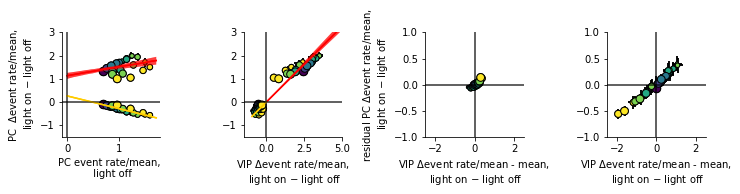

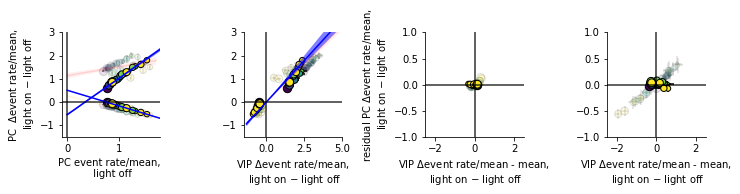

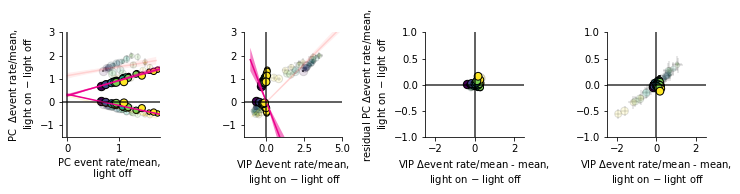

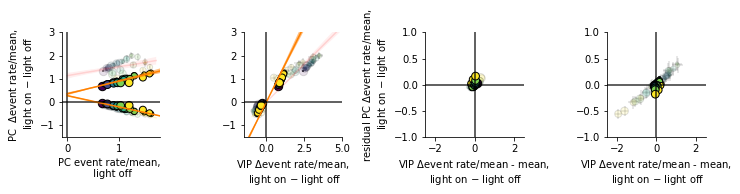

In [ ]:
save_fig = True
reload(opto_utils)

def compute_residual(xdata,ydata):
    slope,intercept,_,_,_ = sst.linregress(xdata.flatten(), ydata.flatten())
    res = ydata - slope*xdata - intercept
    return res
    
def plot_all_three(pcrate,vipdiff,pcdiff,alpha=1,idir=1):
    plt.subplot(1,4,2)
    sca.scatter_size_contrast_errorbar(vipdiff,pcdiff,equate_0=True,square=False,equality_line=False,alpha=alpha)
    plt.subplot(1,4,1)
    sca.scatter_size_contrast_errorbar(pcrate,pcdiff,equate_0=True,square=False,equality_line=False,alpha=alpha)
    plt.subplot(1,4,2+idir)
    res_pc = compute_residual(pcrate,pcdiff)
    res_vip = vipdiff-vipdiff.mean()#compute_residual(vipdiff,pcdiff)
    sca.scatter_size_contrast_errorbar(res_vip,res_pc,equate_0=True,square=False,equality_line=False,alpha=alpha)
    
def regress_all_three(pcrates,vipdiffs,pcdiffs,c='k',alpha=1):
    rg1 = slice(None,pcrates.shape[0]//2)
    rg2 = slice(pcrates.shape[0]//2,None)
    if c=='k':
        this_c1 = np.array((1,0.8,0))
        this_c2 = np.array((1,0,0))
    else:
        this_c1 = c
        this_c2 = c
    plt.subplot(1,4,2)
#     opto_utils.plot_bootstrapped_regression_lines(np.concatenate((vipdiffs[:,:,:,np.newaxis],pcdiffs[:,:,:,np.newaxis]),axis=-1),alpha=alpha,c=[this_c1,this_c2],incl_intercept=False,nreps=nreps,flipxy=True)
    opto_utils.plot_bootstrapped_regression_lines(np.concatenate((pcdiffs[:,:,:,np.newaxis],vipdiffs[:,:,:,np.newaxis]),axis=-1),alpha=alpha,c=[this_c1,this_c2],incl_intercept=False,nreps=nreps,flipxy=True)
    plt.xlabel('VIP $\Delta$event rate/mean, \n light on $-$ light off')
    plt.subplot(1,4,1)
    opto_utils.plot_bootstrapped_regression_lines(np.concatenate((pcrates[rg1,:,:,np.newaxis],pcdiffs[rg1,:,:,np.newaxis]),axis=-1),alpha=alpha,incl_intercept=True,nreps=nreps,flipxy=True,xmin=0,c=this_c1)
    opto_utils.plot_bootstrapped_regression_lines(np.concatenate((pcrates[rg2,:,:,np.newaxis],pcdiffs[rg2,:,:,np.newaxis]),axis=-1),alpha=alpha,incl_intercept=True,nreps=nreps,flipxy=True,xmin=0,c=this_c2)
    plt.xlabel('PC event rate/mean, \n light off')
    plt.subplot(1,4,3)
    plt.xlabel('VIP $\Delta$event rate/mean - mean, \n light on $-$ light off')
    plt.ylabel('residual PC $\Delta$event rate/mean, \n light on $-$ light off')
    plt.subplot(1,4,4)
    plt.xlabel('VIP $\Delta$event rate/mean - mean, \n light on $-$ light off')
    xlims = [(-0.1,1.8),(-1.5,5),(-4.5,6.5),(-2.5,2.5)]
#     for iplot in range(3):
    for iplot in range(4):
        plt.subplot(1,4,iplot+1)
        plt.axhline(0,c='k',alpha=0.5)#linestyle='dashed')
        plt.axvline(0,c='k',alpha=0.5)#linestyle='dashed')
        plt.ylim((-1.5,3))
        plt.xlim(xlims[iplot])
        ut.erase_top_right()
    for iplot in range(2,4):
        plt.subplot(1,4,iplot+1)
        plt.xlim((-2.5,2.5))
        plt.ylim((-1,1))
    
reload(opto_utils)

nreps = 100

for itype in [0]:

    for iconn in [0,2,3,4]:
        
        plt.figure(figsize=(10,2.5))

        for this_iconn in [0,iconn]:
            
            pcrates = np.zeros((0,6,6))
            vipdiffs = np.zeros((0,6,6))
            pcdiffs = np.zeros((0,6,6))
            
            if this_iconn==0 and not iconn==0:
                alpha = 0.125
            else:
                alpha = 1
            
            for idir,light_lbl,c,ylim in zip([1,2],light_lbls,cs,ylims):

                ilight = int(np.round(np.mean(target_bin[lkat])))#ilight_drmax[idir][this_iconn][lkat]

                xdata = network_resps[0][this_iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6))
                xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]

                ydata = network_resps[idir][this_iconn][lkat][:,:,:,itype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
                ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]

                pcdiff = ydata_norm - xdata_norm
                pcrate = xdata_norm
                
                slope, intercept, r_value, p_value, std_err = sst.linregress(xdata_norm.flatten(), (ydata_norm-xdata_norm).flatten())

                pred = slope*xdata_norm + intercept
                actual = (ydata_norm-xdata_norm)
                residual = actual - pred
                
                viptype = 2
                xdata = network_resps[0][this_iconn][lkat][:,ibaseline,:,viptype].reshape((-1,6,6))
                xdata_norm = xdata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]

                ydata = network_resps[idir][this_iconn][lkat][:,:,:,viptype][np.arange(lkat.sum()),ilight].reshape((-1,6,6))
                ydata_norm = ydata/xdata.mean(1).mean(1)[:,np.newaxis,np.newaxis]
                
                vipdiff = ydata_norm - xdata_norm

                plot_all_three(pcrate,vipdiff,pcdiff,alpha=alpha,idir=idir)

                pcrates = np.concatenate((pcrates,pcrate),axis=0)#.flatten()))
                pcdiffs = np.concatenate((pcdiffs,pcdiff),axis=0)#.flatten()))
                vipdiffs = np.concatenate((vipdiffs,vipdiff),axis=0)#.flatten()))

            regress_all_three(pcrates,vipdiffs,pcdiffs,c=conn_colors[this_iconn],alpha=alpha)
# opto_utils.plot_bootstrapped_regression_lines(np.concatenate((pcdiffs[:,np.newaxis],vipdiffs[:,np.newaxis]),axis=1),alpha=1,c='k',incl_intercept=False,equal_cond=True,nreps=nreps)
# plt.axhline(0,c='k',alpha=0.5)#linestyle='dashed')
# plt.axvline(0,c='k',alpha=0.5)#linestyle='dashed')
# plt.xlim((-1.5,3))
# plt.ylim((-0.5,1))
            plt.subplot(1,4,1)
            plt.ylabel('PC  $\Delta$event rate/mean, \n light on $-$ light off')
            ut.erase_top_right()
            plt.tight_layout()
            if save_fig:
                plt.savefig(notebook_base+'figures/pc_vip_halo_chrimson_scatter_four_plots_%s.jpg'%conn_lbls[iconn],dpi=300)

In [ ]:
pcrates.shape

(178, 6, 6)

In [ ]:
iconn = 0
idir = 1
res[iconn][idir][lkat][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat]].shape

(89, 6, 6, 8)

0.40714202679278566


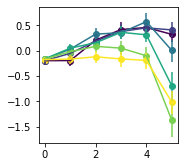

In [ ]:
plt.figure(figsize=(2.5,2.5))
iconn = 0
idir = 1
ut.plot_bootstrapped_errorbars_hillel(np.arange(6),
    res[iconn][idir][lkat][
        np.arange(lkat.sum()),
        ilight_drmax[idir+1][iconn][lkat]
    ][:,:,:,0])

In [ ]:
conn_lbls

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

Ttest_indResult(statistic=4.367441474119447, pvalue=2.1415558832637474e-05)
Ttest_indResult(statistic=-6.779885011201471, pvalue=1.7512953787855644e-10)
Ttest_indResult(statistic=-7.251693903125529, pvalue=1.254310965735569e-11)
Ttest_indResult(statistic=-7.723548521615263, pvalue=8.22283772187309e-13)
Ttest_indResult(statistic=-0.40202093281403517, pvalue=0.6881564084437456)
Ttest_indResult(statistic=-4.818918045367914, pvalue=3.1035794064172665e-06)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

Ttest_indResult(statistic=-3.4650666970738726, pvalue=0.0006658990418544803)
Ttest_indResult(statistic=-4.263503203643726, pvalue=3.276799992163956e-05)
Ttest_indResult(statistic=-1.5299833107079703, pvalue=0.12781621391265172)
Ttest_indResult(statistic=-5.654448187609682, pvalue=6.211396891853583e-08)
Ttest_indResult(statistic=-12.454015854231795, pvalue=6.150768243593387e-26)
Ttest_indResult(statistic=-2.9910393422926504, pvalue=0.003179117484163146)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

Ttest_indResult(statistic=3.627718225913719, pvalue=0.00037441204417873355)
Ttest_indResult(statistic=-1.6636290319419542, pvalue=0.09796614486669361)
Ttest_indResult(statistic=-11.555973871721015, pvalue=2.3984614955178713e-23)
Ttest_indResult(statistic=-1.4495084174115518, pvalue=0.14897518378379893)


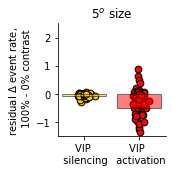

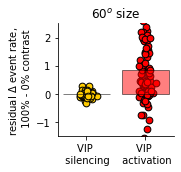

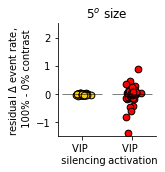

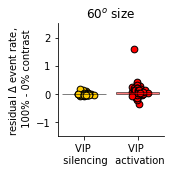

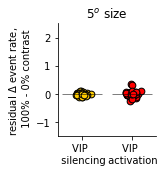

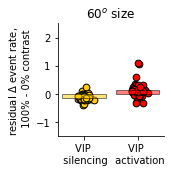

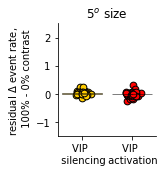

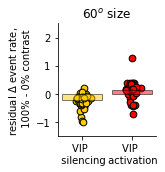

In [ ]:
reload(ut)

these_sizes = [0,5]

dot_sizes = 10+np.arange(6)*5

ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,8,13,22,36,60))
this_nsize = len(usize)
this_ncontrast = len(ucontrast)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))
itype = 0

idir = 2

lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])

for iconn in [0,2,3,4]:

    for isize in these_sizes:

        isize1 = isize
        isize2 = isize
        icontrast1 = 1
        icontrast2 = 5

        lim = (-0.33,0.33)

        mean_res = [[] for idir in range(2)]
        diff_res = [[] for idir in range(2)]

        for idir,lbl in enumerate(['halo','chrimson']):
            this_res = res[iconn][idir][lkat][np.arange(lkat.sum()),ilight_drmax[idir+1][iconn][lkat]][:,isize,:,itype]
            mean_res[idir] = np.nanmean(np.abs(this_res),axis=1)
            diff_res[idir] = this_res[:,icontrast1] - this_res[:,icontrast2]
        plt.figure(figsize=(2.5,2.5))
        ut.bar_with_dots(diff_res,colors=[np.array((1,0.8,0)),'r'],tick_labels=['VIP \n silencing','VIP \n activation'])#,s=dot_sizes[isize])
        plt.ylabel('residual $\Delta$ event rate, \n 100% - 0% contrast')
        plt.title('%d$^o$ size'%usize[isize])
        ut.erase_top_right()
        plt.tight_layout()
        plt.ylim((-1.5,2.5))
#         plt.savefig('figures/exptl_residual_vip_effect_size_%d_%s.jpg'%(isize,conn_lbls[iconn]),dpi=300)
        print(sst.ttest_ind(diff_res[0][~np.isnan(diff_res[0])],diff_res[1][~np.isnan(diff_res[1])]))
        print(sst.ttest_ind(mean_res[0][~np.isnan(mean_res[0])],mean_res[1][~np.isnan(mean_res[1])]))
        plt.savefig(notebook_base+'figures/vip_%s_residual_over_line.eps'%lbl)

Ttest_indResult(statistic=-4.940866672672072, pvalue=1.8006027583998324e-06)
Ttest_indResult(statistic=-0.6010162263464611, pvalue=0.548602430590706)
Ttest_indResult(statistic=-8.699737307052171, pvalue=2.3098969338320363e-15)
Ttest_indResult(statistic=-1.3502025392030943, pvalue=0.17868477580332273)
Ttest_indResult(statistic=-1.9612199145642446, pvalue=0.05143102552884121)
Ttest_indResult(statistic=-0.7962721365033802, pvalue=0.4269466144945381)
Ttest_indResult(statistic=-2.1826236397527454, pvalue=0.030387968287659075)
Ttest_indResult(statistic=0.7309401072341662, pvalue=0.4657877028068571)
Ttest_indResult(statistic=12.452007365925036, pvalue=6.233618047222019e-26)
Ttest_indResult(statistic=-5.477553798366208, pvalue=1.4714635360725552e-07)
Ttest_indResult(statistic=-6.358923266548674, pvalue=1.694101996590226e-09)
Ttest_indResult(statistic=-1.9276647042680595, pvalue=0.05550684480918767)
Ttest_indResult(statistic=11.212344258217186, pvalue=2.321105363502391e-22)
Ttest_indResult(stat

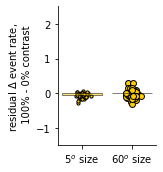

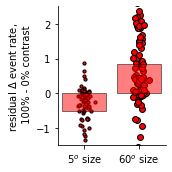

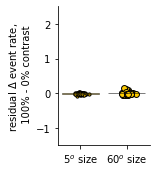

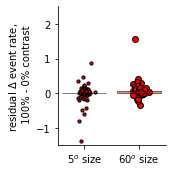

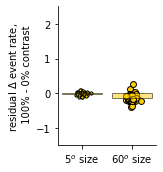

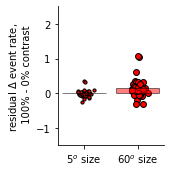

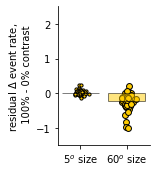

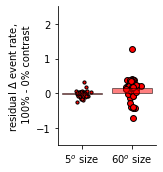

In [ ]:
reload(ut)

these_sizes = [0,5]

dot_sizes = 10+np.arange(6)*5

ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,8,13,22,36,60))
this_nsize = len(usize)
this_ncontrast = len(ucontrast)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))
itype = 0
c_opto = [np.array((1,0.8,0)),'r']

idir = 2

lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])

for iconn in [0,2,3,4]:

    for idir,lbl in enumerate(['halo','chrimson']):

        isize1 = isize
        isize2 = isize
        icontrast1 = 1
        icontrast2 = 5

        lim = (-0.33,0.33)

        mean_res = [[] for this_isize in range(2)]
        diff_res = [[] for this_isize in range(2)]

        for this_isize in range(2):
            isize = these_sizes[this_isize]
            this_res = res[iconn][idir][lkat][np.arange(lkat.sum()),ilight_drmax[idir+1][iconn][lkat]][:,isize,:,itype]
            mean_res[this_isize] = np.nanmean(np.abs(this_res),axis=1)
            diff_res[this_isize] = this_res[:,icontrast1] - this_res[:,icontrast2]
        plt.figure(figsize=(2.5,2.5))
        ut.bar_with_dots(diff_res,colors=[c_opto[idir] for this_isize in range(2)],tick_labels=['%d$^o$ size'%u for u in usize[these_sizes]],s=[dot_sizes[isize] for isize in these_sizes])
        plt.ylabel('residual $\Delta$ event rate, \n 100% - 0% contrast')
#         plt.title('%d$^o$ size'%usize[isize])
        ut.erase_top_right()
        plt.tight_layout()
        plt.ylim((-1.5,2.5))
#         plt.savefig('figures/sim_residual_vip_%s_effect_%s.jpg'%(lbl,conn_lbls[iconn]),dpi=300)
        print(sst.ttest_ind(diff_res[0][~np.isnan(diff_res[0])],diff_res[1][~np.isnan(diff_res[1])]))
        print(sst.ttest_ind(mean_res[0][~np.isnan(mean_res[0])],mean_res[1][~np.isnan(mean_res[1])]))
        # plt.savefig('figures/vip_%s_residual_over_line.eps'%lbl)

Ttest_indResult(statistic=-4.940866672672072, pvalue=1.8006027583998324e-06)
Ttest_indResult(statistic=-0.6010162263464611, pvalue=0.548602430590706)
Ttest_indResult(statistic=-8.699737307052171, pvalue=2.3098969338320363e-15)
Ttest_indResult(statistic=-1.3502025392030943, pvalue=0.17868477580332273)
Ttest_indResult(statistic=-1.9612199145642446, pvalue=0.05143102552884121)
Ttest_indResult(statistic=-0.7962721365033802, pvalue=0.4269466144945381)
Ttest_indResult(statistic=-2.1826236397527454, pvalue=0.030387968287659075)
Ttest_indResult(statistic=0.7309401072341662, pvalue=0.4657877028068571)
Ttest_indResult(statistic=12.452007365925036, pvalue=6.233618047222019e-26)
Ttest_indResult(statistic=-5.477553798366208, pvalue=1.4714635360725552e-07)
Ttest_indResult(statistic=-6.358923266548674, pvalue=1.694101996590226e-09)
Ttest_indResult(statistic=-1.9276647042680595, pvalue=0.05550684480918767)
Ttest_indResult(statistic=11.212344258217186, pvalue=2.321105363502391e-22)
Ttest_indResult(stat

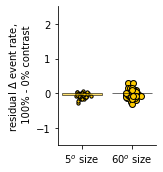

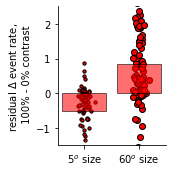

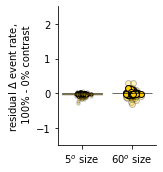

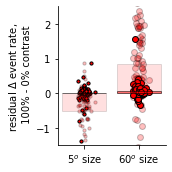

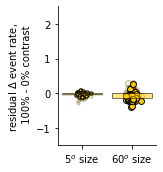

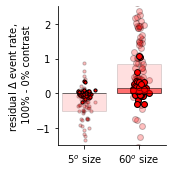

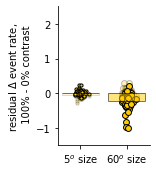

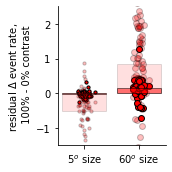

In [ ]:
reload(ut)

save_fig = False

these_sizes = [0,5]

dot_sizes = 10+np.arange(6)*5

ucontrast = np.array((0,6,12,25,50,100))
usize = np.array((5,8,13,22,36,60))
this_nsize = len(usize)
this_ncontrast = len(ucontrast)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))
itype = 0
c_opto = [np.array((1,0.8,0)),'r']

idir = 2

lkat = ut.k_and(*[network_resps[idir][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])

for iconn in [0,2,3,4]:

    for idir,lbl in enumerate(['halo','chrimson']):

        isize1 = isize
        isize2 = isize
        icontrast1 = 1
        icontrast2 = 5

        plt.figure(figsize=(2.5,2.5))

        for this_iconn,this_alpha in zip([0,iconn],[0.25,1]):

            mean_res = [[] for this_isize in range(2)]
            diff_res = [[] for this_isize in range(2)]

            for this_isize in range(2):
                isize = these_sizes[this_isize]
                this_res = res[this_iconn][idir][lkat][np.arange(lkat.sum()),ilight_drmax[idir+1][this_iconn][lkat]][:,isize,:,itype]
                mean_res[this_isize] = np.nanmean(np.abs(this_res),axis=1)
                diff_res[this_isize] = this_res[:,icontrast1] - this_res[:,icontrast2]
            ut.bar_with_dots(diff_res,colors=[c_opto[idir] for this_isize in range(2)],tick_labels=['%d$^o$ size'%u for u in usize[these_sizes]],s=[dot_sizes[isize] for isize in these_sizes],alpha=this_alpha)
        plt.ylabel('residual $\Delta$ event rate, \n 100% - 0% contrast')
#         plt.title('%d$^o$ size'%usize[isize])
        ut.erase_top_right()
        plt.tight_layout()
        plt.ylim((-1.5,2.5))
        if save_fig:
            plt.savefig('figures/sim_residual_vip_%s_effect_%s_overlay_intact.jpg'%(lbl,conn_lbls[iconn]),dpi=300)
        print(sst.ttest_ind(diff_res[0][~np.isnan(diff_res[0])],diff_res[1][~np.isnan(diff_res[1])]))
        print(sst.ttest_ind(mean_res[0][~np.isnan(mean_res[0])],mean_res[1][~np.isnan(mean_res[1])]))
        # plt.savefig('figures/vip_%s_residual_over_line.eps'%lbl)

ValueError: cannot reshape array of size 6048 into shape (6,6)

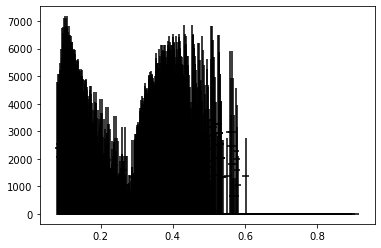

In [ ]:
iconn = 0
nopto = len(opto_levels)
xdata = network_resps[1][iconn][:,:,:,:].reshape((-1,nopto,nsize,ncontrast,ntypes))
ydata = network_resps[2][iconn][:,:,:,:].reshape((-1,nopto,nsize,ncontrast,ntypes))
# zdata = network_resps[0][iconn][:,:,:,:].reshape((-1,1,nsize,ncontrast,ntypes))
plt.figure()
sca.scatter_size_contrast_errorbar(xdata, ydata, nsize=nsize, ncontrast=ncontrast)

In [ ]:
network_resps[1][iconn].shape

(94, 21, 36, 8)

In [ ]:
celltype_lbls = ['pc','sst','vip','pv']

IndexError: invalid index to scalar variable.

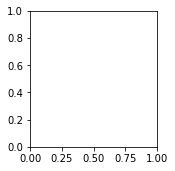

In [ ]:
for itype in [0,1]:
    for iconn in [0,2,3,4]:
        plt.figure(figsize=(5,2.5))
        for idir in range(2):
            plt.subplot(1,2,idir+1)
        #     data = np.abs(res[idir][lkat]/slope[idir][lkat,:,np.newaxis,np.newaxis]).sum(2).sum(2)
            data = slope[iconn][idir][lkat,:,itype]
            plt.plot(opto_levels,(data/np.abs(data).max(1)[:,np.newaxis]).T,alpha=0.05,c='k')
            plt.plot(opto_levels,np.mean(data/np.abs(data).max(1)[:,np.newaxis],0),c='k',label='slope')
        #     plt.plot((data).T,alpha=0.05,c='k')
        #     plt.plot(np.mean(data,0),c='k')
            data = np.abs(res[iconn][idir][lkat,:,:,:,itype]).sum(2).sum(2)
            plt.plot(opto_levels,(data/np.abs(data).max(1)[:,np.newaxis]).T,alpha=0.05,c='b')
            plt.plot(opto_levels,np.mean(data/np.abs(data).max(1)[:,np.newaxis],0),c='b',label='residual')
            plt.ylim((-1,1))
            ut.erase_top_right()
            if idir==0:
                plt.xlabel('injected VIP inhibitory current')
            else:
                plt.xlabel('injected VIP excitatory current')
            plt.ylabel('value/max')
            plt.legend(frameon=False)
        plt.tight_layout()
#         plt.savefig('figures/vip_opto_%s_res_slope_by_light_level_%s.jpg'%(celltype_lbls[itype],conn_lbls[iconn]),dpi=300)

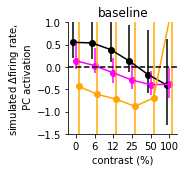

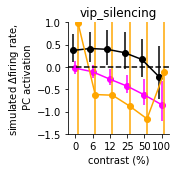

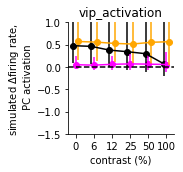

In [ ]:
i,j = 4,0
isize = 3
ilight = 5
dir_lbls = ['baseline','vip_silencing','vip_activation']
for idir,ilight in zip([0,1,2],[0,5,5]):
    plt.figure(figsize=(2.5,2.5))
    # for iconn in [0,3]:
    colors = np.array(((0,0,0),(1,0,1),(1,0.65,0)))
#     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
    cpl = np.concatenate([couplingses[idir][iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for iconn in [0,3,4]],axis=1)
    ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors)
    ut.erase_top_right()
    plt.xticks(np.arange(6),ucontrast)
    plt.axhline(0,c='k',linestyle='dashed')
    plt.xlabel('contrast (%)')
    plt.ylabel('simulated $\Delta$firing rate, \n PC activation')
    plt.title(dir_lbls[idir])
    plt.tight_layout()
    plt.ylim((-1.5,1))
#     plt.savefig('figures/far_pc_coupling_pcsst_pcvip_deleted_%s.jpg'%dir_lbls[idir],dpi=300)

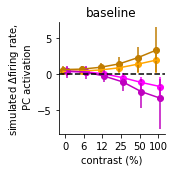

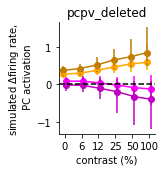

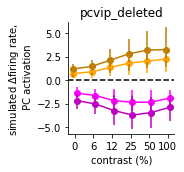

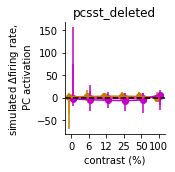

In [ ]:
i = 0
js = [1,2]
isize = 3
ilight = 5
dir_lbls = ['baseline','vip_silencing','vip_activation']
for iconn in [0,2,3,4]:
    for idir,ilight in zip([0],[0]):
        plt.figure(figsize=(2.5,2.5))
        # for iconn in [0,3]:
        
        colors = np.array(((1,0.65,0),(1,0,1)))
    #     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
        cpl = np.concatenate([couplingses[idir][iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for j in js],axis=1)
        ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors)
        
        colors = 0.75*np.array(((1,0.65,0),(1,0,1)))
    #     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
        cpl = np.concatenate([couplingses[idir][iconn][lkat][:,:,isize,:,i::nQ,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for j in js],axis=1)
        ut.plot_pct_errorbars_hillel(np.arange(6),cpl.sum(3),delta=0.1,pct=(16,84),colors=colors)
        
        ut.erase_top_right()
        plt.xticks(np.arange(6),ucontrast)
        plt.axhline(0,c='k',linestyle='dashed')
        plt.xlabel('contrast (%)')
        plt.ylabel('simulated $\Delta$firing rate, \n PC activation')
        plt.title(conn_lbls[iconn])
        plt.tight_layout()
#         plt.ylim((-1.5,1))
        plt.savefig(notebook_base+'figures/far_pc_coupling_pcsst_pcvip_deleted_%s.jpg'%dir_lbls[idir],dpi=300)

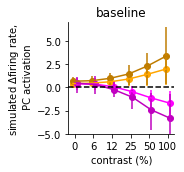

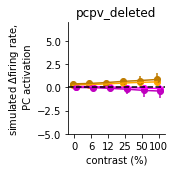

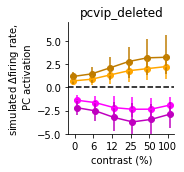

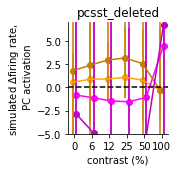

In [ ]:
i = 0
js = [1,2]
isize = 3
ilight = 5
dir_lbls = ['baseline','vip_silencing','vip_activation']
for iconn in [0,2,3,4]:
    for idir,ilight in zip([0],[0]):
        plt.figure(figsize=(2.5,2.5))
        # for iconn in [0,3]:
        
        colors = np.array(((1,0.65,0),(1,0,1)))
    #     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
        cpl = np.concatenate([couplingses[idir][iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for j in js],axis=1)
        ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors)
        
        colors = 0.75*np.array(((1,0.65,0),(1,0,1)))
    #     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
        cpl = np.concatenate([couplingses[idir][iconn][lkat][:,:,isize,:,i::nQ,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for j in js],axis=1)
        ut.plot_pct_errorbars_hillel(np.arange(6),cpl.sum(3),delta=0.1,pct=(16,84),colors=colors)
        
        ut.erase_top_right()
        plt.xticks(np.arange(6),ucontrast)
        plt.axhline(0,c='k',linestyle='dashed')
        plt.xlabel('contrast (%)')
        plt.ylabel('simulated $\Delta$firing rate, \n PC activation')
        plt.title(conn_lbls[iconn])
        plt.tight_layout()
        plt.ylim((-5,7))
        plt.savefig(notebook_base+'figures/l23_sst_vip_coupling_%s.jpg'%conn_lbls[iconn],dpi=300)

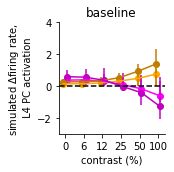

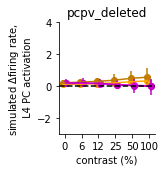

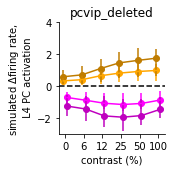

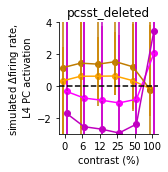

In [ ]:
i = 0
js = [1,2]
nP = 2
isize = 3
ilight = 5
dir_lbls = ['baseline','vip_silencing','vip_activation']
for iconn in [0,2,3,4]:
    for idir,ilight in zip([0],[0]):
        plt.figure(figsize=(2.5,2.5))
        # for iconn in [0,3]:
        
        colors = np.array(((1,0.65,0),(1,0,1)))
    #     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
        cpl = np.concatenate([Xcouplingses[idir][iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for j in js],axis=1)
        ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors)
        
        colors = 0.75*np.array(((1,0.65,0),(1,0,1)))
    #     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
        cpl = np.concatenate([Xcouplingses[idir][iconn][lkat][:,:,isize,:,i::nP,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for j in js],axis=1)
        ut.plot_pct_errorbars_hillel(np.arange(6),cpl.sum(3),delta=0.1,pct=(16,84),colors=colors)
        
        ut.erase_top_right()
        plt.xticks(np.arange(6),ucontrast)
        plt.axhline(0,c='k',linestyle='dashed')
        plt.xlabel('contrast (%)')
        plt.ylabel('simulated $\Delta$firing rate, \n L4 PC activation')
        plt.title(conn_lbls[iconn])
        plt.tight_layout()
        plt.ylim((-3,4))
        plt.savefig(notebook_base+'figures/l4_sst_vip_coupling_%s.jpg'%conn_lbls[iconn],dpi=300)

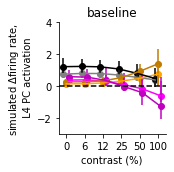

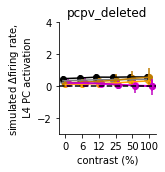

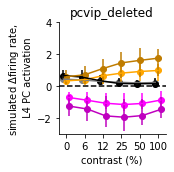

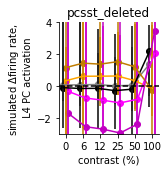

In [ ]:
i = 0
js = [0,1,2]
nP = 2
isize = 3
ilight = 5
dir_lbls = ['baseline','vip_silencing','vip_activation']
for iconn in [0,2,3,4]:
    for idir,ilight in zip([0],[0]):
        plt.figure(figsize=(2.5,2.5))
        # for iconn in [0,3]:
        
        colors = np.array(((0.5,0.5,0.5),(1,0.65,0),(1,0,1)))
    #     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
        cpl = np.concatenate([Xcouplingses[idir][iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for j in js],axis=1)
        ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors)
        
        colors = 0.75*np.array(((0,0,0),(1,0.65,0),(1,0,1)))
    #     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
        cpl = np.concatenate([Xcouplingses[idir][iconn][lkat][:,:,isize,:,i::nP,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for j in js],axis=1)
        ut.plot_pct_errorbars_hillel(np.arange(6),cpl.sum(3),delta=0.1,pct=(16,84),colors=colors)
#         cpl = np.concatenate([Xcouplingses[idir][iconn][lkat][:,:,isize,:,i+nP,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for j in js],axis=1)
#         ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors)
        
        ut.erase_top_right()
        plt.xticks(np.arange(6),ucontrast)
        plt.axhline(0,c='k',linestyle='dashed')
        plt.xlabel('contrast (%)')
        plt.ylabel('simulated $\Delta$firing rate, \n L4 PC activation')
        plt.title(conn_lbls[iconn])
        plt.tight_layout()
        plt.ylim((-3,4))
#         plt.ylim((-2,4))
#         plt.savefig('figures/l4_sst_vip_coupling_%s.jpg'%conn_lbls[iconn],dpi=300)

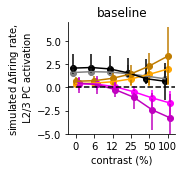

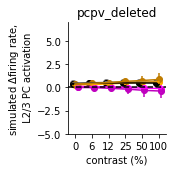

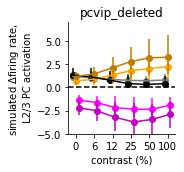

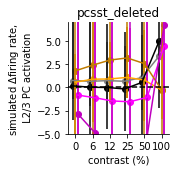

In [ ]:
i = 0
js = [0,1,2]
nP = 2
isize = 3
ilight = 5
dir_lbls = ['baseline','vip_silencing','vip_activation']
for iconn in [0,2,3,4]:
    for idir,ilight in zip([0],[0]):
        plt.figure(figsize=(2.5,2.5))
        # for iconn in [0,3]:
        
        colors = np.array(((0.5,0.5,0.5),(1,0.65,0),(1,0,1)))
    #     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
        cpl = np.concatenate([couplingses[idir][iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for j in js],axis=1)
        ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors)
        
        colors = 0.75*np.array(((0,0,0),(1,0.65,0),(1,0,1)))
    #     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
        cpl = np.concatenate([couplingses[idir][iconn][lkat][:,:,isize,:,i::nQ,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for j in js],axis=1)
        ut.plot_pct_errorbars_hillel(np.arange(6),cpl.sum(3),delta=0.1,pct=(16,84),colors=colors)
#         cpl = np.concatenate([Xcouplingses[idir][iconn][lkat][:,:,isize,:,i+nP,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for j in js],axis=1)
#         ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors)
        
        ut.erase_top_right()
        plt.xticks(np.arange(6),ucontrast)
        plt.axhline(0,c='k',linestyle='dashed')
        plt.xlabel('contrast (%)')
        plt.ylabel('simulated $\Delta$firing rate, \n L2/3 PC activation')
        plt.title(conn_lbls[iconn])
        plt.tight_layout()
        plt.ylim((-5,7))
#         plt.ylim((-2,4))
#         plt.savefig('figures/l23_pc_sst_vip_coupling_%s.jpg'%conn_lbls[iconn],dpi=300)

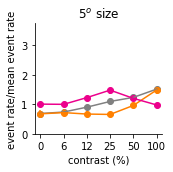

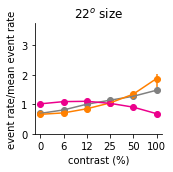

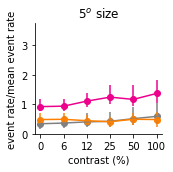

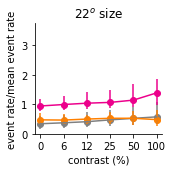

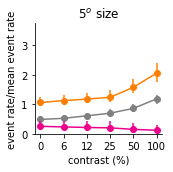

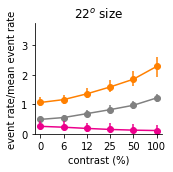

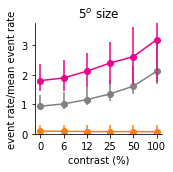

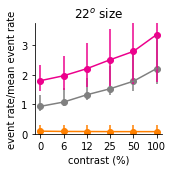

In [ ]:
save_fig = True

reload(ut)
ialign = 0
irun = 0
idir = 0

# ylim = (0,2.5)
ylim = (0,3.75)

for iconn,ylim in zip([0,2,3,4],[ylim for _ in range(4)]):

    nr = network_resps[0][iconn][:,15].reshape((-1,6,6,8))
    nr_baseline = network_resps[0][0][:,15].reshape((-1,6,6,8))

    lbls = ['pc_l4','pc_l23','sst','vip','pv']
    c_l4 = np.array((0,0.5,0))
    c_l23 = [np.array((0.5, 0.5, 0.5)) for i in range(2)]#[np.array((0.33,0.33,0.33)),np.array((0.5,0.5,0.5))][::-1]
    c_sst = [np.array((1, 0.5, 0)) for i in range(2)]#[np.array((0.75,0.45,0)),np.array((1,0.65,0))][::-1]
    c_vip = [np.array((236, 0, 140))/255 for i in range(2)]#[np.array((0.75,0,0.75)),np.array((1,0,1))][::-1]
    c_pv = np.array((0,0,1))
    colors = [c_l4,c_l23,c_sst,c_vip,c_pv]
    usize = [5,8,13,22,36,60]
    ucontrast = [0,6,12,25,50,100]

    for iisize,isize in enumerate([0,3]): #[0,4]):
        plt.figure(figsize=(2.5,2.5))
        these_types = [1,2,3]
        for itype in these_types:#range(len(rsexpt)):
            data = ut.norm_to_mean(nr[:,:,:,itype-1],nr_baseline[:,:,:,itype-1])[lkat]
#             data = data/np.nanmean(np.nanmean(data,1),1)[:,np.newaxis,np.newaxis]
        #     for icontrast in range(6):
            #     plt.errorbar([5,8,13,22,36,60],np.nanmean(data,0)[:,icontrast],compute_sem(data,0)[:,icontrast])
#             ut.plot_pct_errorbars_hillel(ucontrast,data[:,isize:isize+1,:],pct=(16,84),colors=colors[itype][iisize][np.newaxis])
            ut.plot_pct_errorbars_hillel(np.arange(6),data[:,isize:isize+1,:],pct=(16,84),colors=colors[itype][iisize][np.newaxis])
            plt.xticks(np.arange(6),ucontrast)
    #         plt.legend(['6%','25%','100%'])
            plt.xlabel('contrast (%)')
            plt.ylabel('event rate/mean event rate')
#         plt.legend(['PC','SST','VIP'],frameon=False)
        plt.title('%d$^o$ size'%usize[isize])
        plt.ylim(ylim)
        ut.erase_top_right()
        plt.tight_layout()
        if save_fig:
            plt.savefig(notebook_base+'/figures/sim_pc_sst_vip_%s_contrast_by_size_%d.eps'%(conn_lbls[iconn],isize))

In [ ]:
os.getcwd()

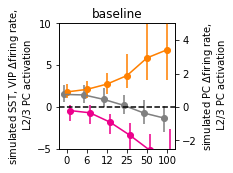

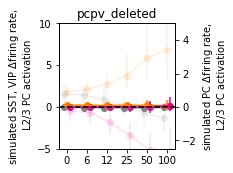

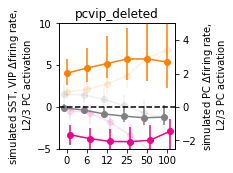

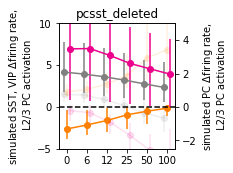

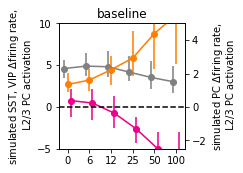

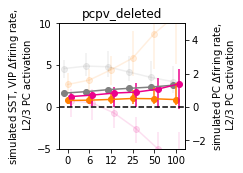

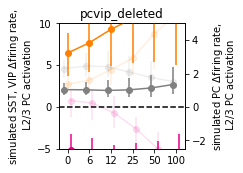

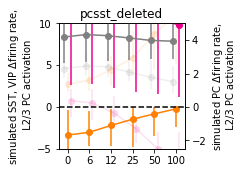

In [ ]:
reload(ut)

def plot_pc_sst_vip_coupling(center: bool = True, save_fig: bool = False):
    if center:
        i = 0 + nQ
        js = [0,1,2]
        center_or_surround: str = "center"
    else:
        i = 0
        js = [0,1,2]
        center_or_surround = "surround"
    def get_figname(iconn: int):
        if iconn == 0:
            return f'figures/l23_{center_or_surround}_pc_sst_vip_coupling_{conn_lbls[iconn]}.jpg'
        else:
            return f'figures/l23_{center_or_surround}_pc_sst_vip_coupling_{conn_lbls[iconn]}_overlay.jpg'
    nP = 2
    isize = 3
    ibaseline = 15
    alphas = [0.125,1]
    dir_lbls = ['baseline','vip_silencing','vip_activation']

    baseline_means = np.nanmean(np.nanmean(nr_baseline,1),1)

    for iconn in [0,2,3,4]:
        for idir,ilight in zip([0],[ibaseline]):
            plt.figure(figsize=(3.5,2.5))
            # for iconn in [0,3]:
            
    #         colors = np.array(((0.5,0.5,0.5),(1,0.65,0),(1,0,1)))
    #     #     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
    #         cpl = np.concatenate([couplingses[idir][iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for j in js],axis=1)
    #         ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors)
            
    #         colors = 1*np.array(((0,0,0),(1,0.5,0),(1,0,1))) # np.array((236, 0, 140))/255
            colors = 1*np.array(((0.5,0.5,0.5),(1,0.5,0),np.array((236, 0, 140))/255)) # np.array((236, 0, 140))/255
        #     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
            ax_inh = plt.gca()
            ax_pc = ax_inh.twinx()
            for this_iconn,alpha in zip([0,iconn],alphas):
                cpl = np.concatenate([couplingses[idir][this_iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),ilight,:][:,np.newaxis] for j in js],axis=1)
                cpl = cpl/baseline_means[lkat][:,js,np.newaxis]
                #             cpl = np.concatenate([couplingses[idir][this_iconn][lkat][:,:,isize,:,i+nQ,j][np.arange(lkat.sum()),ilight_drmax[idir][this_iconn][lkat],:][:,np.newaxis] for j in js],axis=1)
    #             ut.plot_parametric_fn_pct_errorbars(np.arange(6),cpl,fit_fn=nra.fit_opt_params_two_asymptote_fn,plot_fn=nra.two_asymptote_fn,colors=colors,alpha=alpha)
                ax_list = ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors,alpha=alpha)#, ax_list = [ax_pc, ax_inh, ax_inh])
    #         cpl = np.concatenate([Xcouplingses[idir][iconn][lkat][:,:,isize,:,i+nP,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for j in js],axis=1)
    #         ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors)
            
            # ut.erase_top_right()
#             ut.erase_top(ax=ax_pc)
#             ut.erase_top(ax=ax_inh)
            plt.xticks(np.arange(6),ucontrast)
            plt.axhline(0,c='k',linestyle='dashed')
            plt.xlabel('contrast (%)')
            ax_inh.set_ylabel('simulated SST, VIP $\Delta$firing rate, \n L2/3 PC activation')
            ax_pc.set_ylabel('simulated PC $\Delta$firing rate, \n L2/3 PC activation')
            plt.title(conn_lbls[iconn])
            plt.tight_layout()
    #         plt.ylim((-2,2))
    #         plt.ylim((-2.5,3.5))
            ax_inh.set_ylim((-5, 10))
            ax_pc.set_ylim((-2.5, 5))
            ax_inh.set_yticks([-5, 0, 5, 10])
            ax_pc.set_yticks([-2, 0, 2, 4])
    #         plt.ylim((-2,4))
    #         plt.savefig('figures/l23_surround_pc_sst_vip_coupling_%s.jpg'%conn_lbls[iconn],dpi=300)
            if save_fig:
                plt.savefig(get_figname(iconn),dpi=300)

plot_pc_sst_vip_coupling(center=True, save_fig=True)
plot_pc_sst_vip_coupling(center=False, save_fig=True)

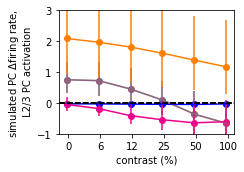

In [ ]:
reload(ut)

def plot_pc_coupling_by_connection_perturbation(center: bool = True, save_fig: bool = False):
    if center:
        i = 0
        js = [0]
        center_or_surround: str = "center"
    else:
        i = 0 + nQ
        js = [0]
        center_or_surround = "surround"
    def get_figname():
        return f'figures/l23_{center_or_surround}_pc_sst_vip_coupling_pc_only.jpg'
    nP = 2
    isize = 3
    ibaseline = 15
    alphas = [0.125,1]
    dir_lbls = ['baseline','vip_silencing','vip_activation']

    baseline_means = np.nanmean(np.nanmean(nr_baseline,1),1)

    plt.figure(figsize=(3.5,2.5))

    iconn_list = [0, 2, 3, 4]

    colors = 1*np.array(((0.5,0.5,0.5), (0, 0, 1), np.array((236, 0, 140))/255, (1,0.5,0))) # np.array((236, 0, 140))/255

    for this_iconn_index, iconn in enumerate(iconn_list):
        for idir,ilight in zip([0],[ibaseline]):

            ax_pc = plt.gca()
            for this_iconn, alpha in zip([0,iconn],alphas):
                cpl = np.concatenate([couplingses[idir][this_iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),ilight,:][:,np.newaxis] for j in js],axis=1)
                cpl = cpl/baseline_means[lkat][:,js,np.newaxis]
                ax_list = ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors[this_iconn_index][None],alpha=alpha)#, ax_list = [ax_pc])

#             ut.erase_top_right(ax=ax_pc)
            plt.xticks(np.arange(6),ucontrast)
            plt.axhline(0,c='k',linestyle='dashed')
            plt.xlabel('contrast (%)')
            ax_pc.set_ylabel('simulated PC $\Delta$firing rate, \n L2/3 PC activation')
            # plt.title(conn_lbls[iconn])
            plt.tight_layout()
            ax_pc.set_ylim((-1, 3))
            ax_pc.set_yticks([-1, 0, 1, 2, 3])
    if save_fig:
        plt.savefig(get_figname(),dpi=300)

plot_pc_coupling_by_connection_perturbation(center=False, save_fig=True)

In [ ]:
pwd

'/Users/agos/Dropbox/ColumbiaProjects/Project_DansPaper'

In [ ]:
save_fig = False
i = 0
js = [0,1,2]
nP = 2
isize = 3
ibaseline = 15
alphas = [0.125,1]
dir_lbls = ['baseline','vip_silencing','vip_activation']
for iconn in [0,2,3,4]:
    for idir,ilight in zip([0],[ibaseline]):
        plt.figure(figsize=(2.5,2.5))
        # for iconn in [0,3]:
        
#         colors = np.array(((0.5,0.5,0.5),(1,0.65,0),(1,0,1)))
#     #     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
#         cpl = np.concatenate([couplingses[idir][iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for j in js],axis=1)
#         ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors)
        
#         colors = 1*np.array(((0,0,0),(1,0.5,0),(1,0,1))) # np.array((236, 0, 140))/255
        colors = 1*np.array(((0.5,0.5,0.5),(1,0.5,0),np.array((236, 0, 140))/255)) # np.array((236, 0, 140))/255
    #     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
        for this_iconn,alpha in zip([0,iconn],alphas):
            cpl = np.concatenate([couplingses[idir][this_iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),ilight,:][:,np.newaxis] for j in js],axis=1)
#             cpl = np.concatenate([couplingses[idir][this_iconn][lkat][:,:,isize,:,i+nQ,j][np.arange(lkat.sum()),ilight_drmax[idir][this_iconn][lkat],:][:,np.newaxis] for j in js],axis=1)
            cpl = cpl/baseline_means[lkat][:,js,np.newaxis]
            ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors,alpha=alpha)
#             ut.plot_parametric_fn_pct_errorbars(np.arange(6),cpl,fit_fn=nra.fit_opt_params_two_asymptote_fn,plot_fn=nra.two_asymptote_fn,colors=colors,alpha=alpha)
#         cpl = np.concatenate([Xcouplingses[idir][iconn][lkat][:,:,isize,:,i+nP,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for j in js],axis=1)
#         ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors)
        
        ut.erase_top_right()
        plt.xticks(np.arange(6),ucontrast)
        plt.axhline(0,c='k',linestyle='dashed')
        plt.xlabel('contrast (%)')
        plt.ylabel('simulated $\Delta$firing rate, \n L2/3 PC activation')
        plt.title(conn_lbls[iconn])
        plt.tight_layout()
#         plt.ylim((-3,4))
        plt.ylim((-6,10))
#         plt.ylim((-2.5,3.5))
#         plt.ylim((-2,4))
        if save_fig:
            if iconn == 0:
                plt.savefig(notebook_base+'figures/l23_center_pc_sst_vip_coupling_%s.jpg'%conn_lbls[iconn],dpi=300)
            else:
                plt.savefig(notebook_base+'figures/l23_center_pc_sst_vip_coupling_%s_overlay.jpg'%conn_lbls[iconn],dpi=300)

NameError: name 'baseline_means' is not defined

<Figure size 180x180 with 0 Axes>

In [ ]:
save_fig = True
idir = 0
this_iconn = 0
i, j = 4, 0
cpl = couplingses[idir][this_iconn][lkat][:,ibaseline,:,:,i,j]
midpoints = np.load(os.path.expanduser('~/Documents/notebooks/mossing-PC/shared_data/vip_sigmoid_midpoints.npy'))[lkat]
scales = np.load(os.path.expanduser('~/Documents/notebooks/mossing-PC/shared_data/vip_sigmoid_scales.npy'))[lkat]
for isize in range(nsize):
    plt.figure(figsize=(2.5,2.5))
    sca.scatter_size_contrast_errorbar(cpl[:,isize:isize+1], midpoints[:,isize:isize+1], equality_line=False, square=False, dot_size_offset=isize*10)
    plt.xlabel('center PC response to driving surround PC')
    plt.ylabel('distance to VIP sigmoid midpoint')
    plt.axhline(0, c='k', linestyle='dashed')
    plt.tight_layout()
    if save_fig:
        plt.savefig(notebook_base+f'../figures/vip_sigmoid_midpoint_vs_cdcc_size_{isize}.eps')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/agos/Documents/notebooks/mossing-PC/shared_data/vip_sigmoid_midpoints.npy'

In [ ]:
scales.mean()

NameError: name 'scales' is not defined

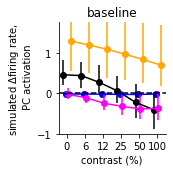

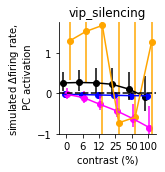

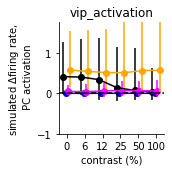

In [ ]:
i,j = 4,0
isize = 3
ilight = 0
dir_lbls = ['baseline','vip_silencing','vip_activation']
save_fig = False
for idir,ilight in zip([0,1,2],[15,5,5]):
    plt.figure(figsize=(2.5,2.5))
    # for iconn in [0,3]:
    colors = np.array(((0,0,0),(0,0,1),(1,0,1),(1,0.65,0)))
    cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,2,3,4]],axis=1)
#     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for iconn in [0,2,3,4]],axis=1)
    ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors)
    ut.erase_top_right()
    plt.xticks(np.arange(6),ucontrast)
    plt.axhline(0,c='k',linestyle='dashed')
    plt.xlabel('contrast (%)')
    plt.ylabel('simulated $\Delta$firing rate, \n PC activation')
    plt.title(dir_lbls[idir])
    plt.tight_layout()
    plt.ylim((-1,1.75))
    if save_fig:
        if iconn == 0:
            plt.savefig('figures/l23_center_pc_sst_vip_coupling_%s.jpg'%conn_lbls[iconn],dpi=300)
        else:
            plt.savefig('figures/l23_center_pc_sst_vip_coupling_%s_overlay.jpg'%conn_lbls[iconn],dpi=300)

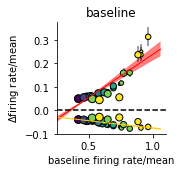

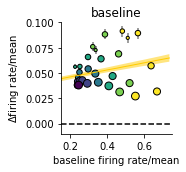

In [ ]:
save_fig = False
import opto_utils
reload(opto_utils)
this_lkat = ut.k_and(*[network_resps[0][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
usize = np.array((5,8,13,22,35,60))
ucontrast = np.array((0,6,12,25,50,100))
celltype_to_plot = "sst"

isize = 3
ilight = 0
iconn = 0
alpha = 1
dir_lbls = ['baseline','vip_silencing','vip_activation']
delta_ilight = 1

for celltype_to_plot in ["pc","sst"]:
    if celltype_to_plot == "pc":
        i, j, show_vip_activation, show_vip_silencing = 0, 0, True, True
        ylim = (-0.1,0.375)
        xlim = (0.25,1.1)
    else:
        assert celltype_to_plot == "sst"
        i, j, show_vip_activation, show_vip_silencing = 1, 1, False, True
        ylim = (-0.01, 0.1)
        xlim = (0.15,0.75)

    for idir,ilight in zip([0],[15]):
        
        xlabel = 'baseline firing rate/mean'
        ylabel = '$\Delta$firing rate/mean'
        
        plt.figure(figsize=(2.5,2.5))
        # for iconn in [0,3]:
        colors = np.array(((0,0,0),(0,0,1),(1,0,1),(1,0.65,0)))
        
        if show_vip_activation:
            r = network_resps[0][iconn][this_lkat][:,ilight,:,j].reshape((-1,6,6))
        #     cpl = couplingses[idir][iconn][this_lkat][:,ilight,:,:,i,j]
            cpl = network_resps[0][iconn][this_lkat][:,ilight + delta_ilight,:,j].reshape((-1,6,6))-r
            this_data = np.stack((r,cpl),axis=3)
            opto_utils.scatter_size_contrast_errorbar(this_data,pct=(16,84),opto_color='r',equality_line=False,square=False,\
                                                    xlabel=xlabel,ylabel=ylabel,alpha=alpha,linewidth=1)
        
        if show_vip_silencing:
            r = network_resps[0][iconn][this_lkat][:,ilight,:,i].reshape((-1,6,6))
        #     cpl = couplingses[idir][iconn][this_lkat][:,ilight,:,:,i,j]
            cpl = network_resps[0][iconn][this_lkat][:,ilight - delta_ilight,:,j].reshape((-1,6,6))-network_resps[0][iconn][this_lkat][:,15,:,j].reshape((-1,6,6))
            this_data = np.stack((r,cpl),axis=3)
            opto_utils.scatter_size_contrast_errorbar(this_data,pct=(16,84),opto_color=np.array((1,0.8,0)),equality_line=False,square=False,\
                                                    xlabel=xlabel,ylabel=ylabel,alpha=alpha,linewidth=1)
        
        #,mn_plot=mn_plot,mx_plot=mx_plot
        plt.axhline(0,c='k',linestyle='dashed')
        plt.ylabel(ylabel)
    #     ut.zero_origin('x')
        
        ut.erase_top_right()
        plt.title(dir_lbls[idir])
        plt.tight_layout()
        plt.ylim(ylim)
        plt.xlim(xlim)
        if save_fig:
            plt.savefig(f'figures/delta_{celltype_to_plot}_rate_vs_rate_finite_vip.jpg',dpi=300)

In [ ]:
slope, intercept, res = compute_slope_intercept_res_arr(network_resps)



In [ ]:
res.shape

(1, 6, 6)

In [ ]:
r = network_resps[0][iconn][this_lkat][:,ilight,:,j].reshape((-1,6,6))
#     cpl = couplingses[idir][iconn][this_lkat][:,ilight,:,:,i,j]
cpl = network_resps[0][iconn][this_lkat][:,16,:,j].reshape((-1,6,6))-r
slope = np.zeros((r.shape[0],))
intercept = np.zeros((r.shape[0],))
res = np.zeros(r.shape)
# for ifit in range(r.shape[0]):
#     slope[ifit], intercept[ifit], res[ifit] = compute_slope_intercept_res_reshape(r[ifit], (cpl - r)[ifit])
# plt.plot(res.T)

In [ ]:
# load fit parameters
# np.save(os.path.expanduser('~/Documents/notebooks/mossing-PC/shared_data/vip_sigmoid_midpoints.npy'), midpoints)
midpoints = np.load(os.path.expanduser('~/Documents/notebooks/mossing-PC/shared_data/vip_sigmoid_midpoints.npy'))[this_lkat]
# np.save(os.path.expanduser('~/Documents/notebooks/mossing-PC/shared_data/vip_sigmoid_scales.npy'), scales)
scales = np.load(os.path.expanduser('~/Documents/notebooks/mossing-PC/shared_data/vip_sigmoid_scales.npy'))[this_lkat]
# np.save(os.path.expanduser("~/Documents/notebooks/mossing-PC/shared_data/vip_sigmoid_amplitude_at_x0.npy"), amplitude_at_x0)
amplitude_at_x0 = np.load(os.path.expanduser("~/Documents/notebooks/mossing-PC/shared_data/vip_sigmoid_amplitude_at_x0.npy"))[this_lkat]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/agos/Documents/notebooks/mossing-PC/shared_data/vip_sigmoid_midpoints.npy'

In [ ]:
# sca.scatter_size_contrast(np.nanmean(res, 0).flatten(), np.nanmean(midpoints, 0).flatten(),nsize=6,ncontrast=6, equality_line=False)
sca.scatter_size_contrast(np.nanmean(slope[:, np.newaxis, np.newaxis]*r, 0).flatten(), np.nanmean(scales, 0).flatten(),nsize=6,ncontrast=6, equality_line=False, square=False)
plt.axhline(0, c='k', linestyle='dashed')
plt.axvline(0, c='k', linestyle='dashed')

NameError: name 'scales' is not defined

In [ ]:
opto_is_insufficient = (np.nanmean(midpoints, 0).flatten()>np.nanmean(scales, 0).flatten()*2)
sca.scatter_size_contrast(opto_is_insufficient, np.nanmean(res, 0).flatten(), nsize=6,ncontrast=6, equality_line=False, square=False)
# sca.scatter_size_contrast(np.nanmean(slope[:, np.newaxis, np.newaxis]*r, 0).flatten(), np.nanmean(scales, 0).flatten(),nsize=6,ncontrast=6, equality_line=False, square=False)
plt.axhline(0, c='k', linestyle='dashed')
plt.axvline(0, c='k', linestyle='dashed')

NameError: name 'midpoints' is not defined

In [ ]:
slope.shape

(1,)

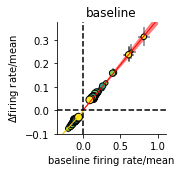

In [ ]:
save_fig = False
import opto_utils
reload(opto_utils)
this_lkat = ut.k_and(*[network_resps[0][iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])
usize = np.array((5,8,13,22,35,60))
ucontrast = np.array((0,6,12,25,50,100))
i,j = 2,0
isize = 3
ilight = 0
iconn = 0
alpha = 1
dir_lbls = ['baseline','vip_silencing','vip_activation']
for idir,ilight in zip([0],[15]):
    
    xlabel = 'baseline firing rate/mean'
    ylabel = '$\Delta$firing rate/mean'
    
    plt.figure(figsize=(2.5,2.5))
    # for iconn in [0,3]:
    colors = np.array(((0,0,0),(0,0,1),(1,0,1),(1,0.65,0)))
    r = network_resps[0][iconn][this_lkat][:,16,:,i].reshape((-1,6,6))-network_resps[0][iconn][this_lkat][:,15,:,i].reshape((-1,6,6))
#     cpl = couplingses[idir][iconn][this_lkat][:,ilight,:,:,i,j]
    cpl = network_resps[0][iconn][this_lkat][:,16,:,j].reshape((-1,6,6))-network_resps[0][iconn][this_lkat][:,15,:,j].reshape((-1,6,6))
    this_data = np.stack((r,cpl),axis=3)
    opto_utils.scatter_size_contrast_errorbar(this_data,pct=(16,84),opto_color='r',equality_line=False,square=False,\
                                              xlabel=xlabel,ylabel=ylabel,alpha=alpha,linewidth=1,mn_plot=0,mx_plot=1)
    
    r = network_resps[0][iconn][this_lkat][:,14,:,i].reshape((-1,6,6))-network_resps[0][iconn][this_lkat][:,15,:,i].reshape((-1,6,6))
#     cpl = couplingses[idir][iconn][this_lkat][:,ilight,:,:,i,j]
    cpl = network_resps[0][iconn][this_lkat][:,14,:,j].reshape((-1,6,6))-network_resps[0][iconn][this_lkat][:,15,:,j].reshape((-1,6,6))
    this_data = np.stack((r,cpl),axis=3)
    opto_utils.scatter_size_contrast_errorbar(this_data,pct=(16,84),opto_color=np.array((1,0.8,0)),equality_line=False,square=False,\
                                              xlabel=xlabel,ylabel=ylabel,alpha=alpha,linewidth=1,mn_plot=-1,mx_plot=0)
    
    #,mn_plot=mn_plot,mx_plot=mx_plot
    plt.ylabel(ylabel)
    plt.axhline(0,c='k',linestyle='dashed')
    plt.axvline(0,c='k',linestyle='dashed')
#     ut.zero_origin('x')
    
    ut.erase_top_right()
    plt.title(dir_lbls[idir])
    plt.tight_layout()
    plt.ylim((-0.1,0.375))
    plt.xlim((-0.35,1.1))
    if save_fig:
        plt.savefig('figures/delta_pc_rate_vs_delta_vip_rate_finite_vip.jpg',dpi=300)

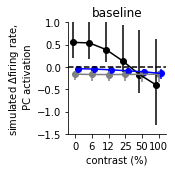

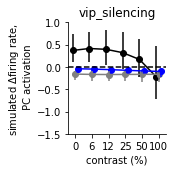

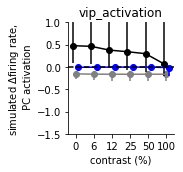

In [ ]:
i,j = 4,0
isize = 3
ilight = 5
dir_lbls = ['baseline','vip_silencing','vip_activation']
for idir,ilight in zip([0,1,2],[0,5,5]):
    plt.figure(figsize=(2.5,2.5))
    # for iconn in [0,3]:
    colors = np.array(((0,0,0),(0.5,0.5,0.5),(0,0,1)))
#     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
    cpl = np.concatenate([couplingses[idir][iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for iconn in [0,1,2]],axis=1)
    ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors)
    ut.erase_top_right()
    plt.xticks(np.arange(6),ucontrast)
    plt.axhline(0,c='k',linestyle='dashed')
    plt.xlabel('contrast (%)')
    plt.ylabel('simulated $\Delta$firing rate, \n PC activation')
    plt.title(dir_lbls[idir])
    plt.tight_layout()
    plt.ylim((-1.5,1))
#     plt.savefig('figures/far_pc_coupling_pcpc_pcpv_deleted_%s.jpg'%dir_lbls[idir],dpi=300)

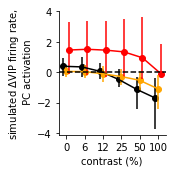

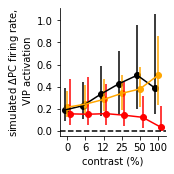

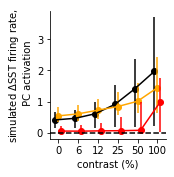

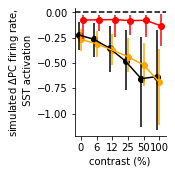

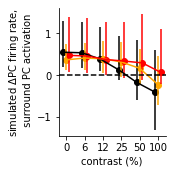

In [ ]:
i,j = 0,2
isize = 3
ilight = 5
# dir_lbls = ['baseline','vip_silencing','vip_activation']
iconn = 0
small_lbl = ['pc','sst','vip','pv','surround_pc']
big_lbl = ['PC','SST','VIP','PV','surround PC']
for i,j,ylim in zip([0,2,0,1,4],[2,0,1,0,0],[None,None,None,None,None]):
    plt.figure(figsize=(2.5,2.5))
    # for iconn in [0,3]:
    colors = np.array(((0,0,0),(1,0.65,0),(1,0,0)))
#     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
#     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for iconn in [0,3,4]],axis=1)
    cpl = np.concatenate([couplingses[idir][iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for idir in [0,1,2]],axis=1)
    ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors)
    ut.erase_top_right()
    plt.xticks(np.arange(6),ucontrast)
    plt.axhline(0,c='k',linestyle='dashed')
    plt.xlabel('contrast (%)')
    plt.ylabel('simulated $\Delta$%s firing rate, \n %s activation'%(big_lbl[j],big_lbl[i]))
#     plt.title(dir_lbls[idir])
    plt.tight_layout()
#     plt.ylim((-2.5,5.5))
#     plt.savefig('figures/%s_%s_coupling_vip_silencing_activation.jpg'%(small_lbl[i],small_lbl[j]),dpi=300)

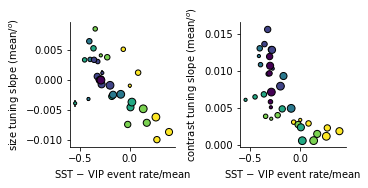

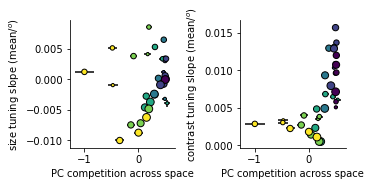

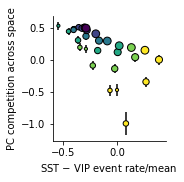

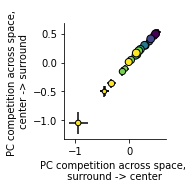

In [ ]:
idir = 0
iconn = 0
ibaseline = 15

usize = np.array((5,8,13,22,35,60))
ucontrast = np.array((0,6,12,25,50,100))

lkat = this_lkat

itype = 0
size_slp = sca.compute_slope_avg(usize,network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6)),axis=1)
contrast_slp = sca.compute_slope_avg(ucontrast,network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6)),axis=2)

# size_slp = sca.compute_diff_avg(YYs[ifit][low_loss[ifit]][:,:,:,itype],axis=1)
# contrast_slp = sca.compute_diff_avg(YYs[ifit][low_loss[ifit]][:,:,:,itype],axis=2)

sst_vip_diff = network_resps[idir][iconn][lkat][:,ibaseline,:,1] - network_resps[idir][iconn][lkat][:,ibaseline,:,2]
i,j = 4,0
# cpl = couplingses[idir][iconn][lkat][:,ibaseline,:,:,i,j] #+ couplingses[idir][iconn][lkat][:,ibaseline,:,:,0,0]
cpl = 0.5*(couplingses[idir][iconn][lkat][:,ibaseline,:,:,i,j] + couplingses[idir][iconn][lkat][:,ibaseline,:,:,j,i])#+ couplingses[idir][iconn][lkat][:,ibaseline,:,:,0,0]


itype = 0
pc_baseline = network_resps[0][iconn][lkat][:,0,:,itype]
vip_chrimson_pc_diff = network_resps[2][iconn][lkat][np.arange(lkat.sum()),ilight_drmax[2][iconn][lkat],:][:,:,itype] - pc_baseline

itype = 2
vip_baseline = network_resps[0][iconn][lkat][:,0,:,itype]
vip_chrimson_vip_diff = network_resps[2][iconn][lkat][np.arange(lkat.sum()),ilight_drmax[2][iconn][lkat],:][:,:,itype] - vip_baseline

itype = 0
# pc_baseline = network_resps[0][iconn][lkat][:,0,:,itype]
vip_halo_pc_diff = network_resps[1][iconn][lkat][np.arange(lkat.sum()),ilight_drmax[1][iconn][lkat],:][:,:,itype] - pc_baseline

itype = 2
# vip_baseline = network_resps[0][iconn][lkat][:,0,:,itype]
vip_halo_vip_diff = network_resps[1][iconn][lkat][np.arange(lkat.sum()),ilight_drmax[1][iconn][lkat],:][:,:,itype] - vip_baseline

plt.figure(figsize=(5,2.5))
plt.subplot(1,2,1)
sca.scatter_size_contrast_errorbar(sst_vip_diff,size_slp,equality_line=False,square=False,nsize=6,ncontrast=6)
plt.xlabel('SST $-$ VIP event rate/mean')
plt.ylabel('size tuning slope (mean/$^o$)')
ut.erase_top_right()
plt.subplot(1,2,2)
sca.scatter_size_contrast_errorbar(sst_vip_diff,contrast_slp,equality_line=False,square=False,nsize=6,ncontrast=6)
plt.xlabel('SST $-$ VIP event rate/mean')
plt.ylabel('contrast tuning slope (mean/$^o$)')
ut.erase_top_right()
plt.tight_layout()
# plt.savefig('figures/slopes_vs_sst_vip.eps')

plt.figure(figsize=(5,2.5))
plt.subplot(1,2,1)
sca.scatter_size_contrast_errorbar(cpl,size_slp,equality_line=False,square=False,nsize=6,ncontrast=6)
plt.xlabel('PC competition across space')
plt.ylabel('size tuning slope (mean/$^o$)')
ut.erase_top_right()
plt.subplot(1,2,2)
sca.scatter_size_contrast_errorbar(cpl,contrast_slp,equality_line=False,square=False,nsize=6,ncontrast=6)
plt.xlabel('PC competition across space')
plt.ylabel('contrast tuning slope (mean/$^o$)')
ut.erase_top_right()
plt.tight_layout()
# plt.savefig('figures/slopes_vs_pc_competition.eps')

plt.figure(figsize=(2.5,2.5))
# plt.subplot(1,2,1)
sca.scatter_size_contrast_errorbar(sst_vip_diff,cpl,equality_line=False,square=False,nsize=6,ncontrast=6)
plt.xlabel('SST $-$ VIP event rate/mean')
plt.ylabel('PC competition across space')
ut.erase_top_right()
plt.tight_layout()
# plt.savefig('figures/pc_competition_vs_sst_vip.eps')

plt.figure(figsize=(2.5,2.5))
# plt.subplot(1,2,1)
sca.scatter_size_contrast_errorbar(couplingses[idir][iconn][lkat][:,ibaseline,:,:,i,j],couplingses[idir][iconn][lkat][:,ibaseline,:,:,j,i],equality_line=False,square=False,nsize=6,ncontrast=6)
# plt.xlabel('SST $-$ VIP event rate/mean')
plt.xlabel('PC competition across space, \n surround -> center ')
plt.ylabel('PC competition across space, \n center -> surround ')
ut.erase_top_right()
plt.tight_layout()
# plt.savefig('figures/pc_competition_vs_sst_vip.eps')


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

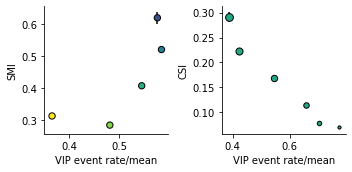

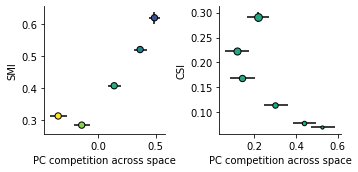

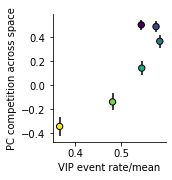

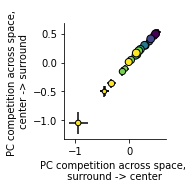

In [ ]:
idir = 0
iconn = 0
ibaseline = 15

lkat = this_lkat

usize = np.array((5,8,13,22,35,60))
ucontrast = np.array((0,6,12,25,50,100))

itype = 0
size_slp = sca.compute_slope_avg(usize,network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6)),axis=1)
contrast_slp = sca.compute_slope_avg(ucontrast,network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6)),axis=2)

smi = scf.smi_fn(network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6)), avg_last=False)
csi = scf.csi_fn(network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6)), avg_last=False)

# size_slp = sca.compute_diff_avg(YYs[ifit][low_loss[ifit]][:,:,:,itype],axis=1)
# contrast_slp = sca.compute_diff_avg(YYs[ifit][low_loss[ifit]][:,:,:,itype],axis=2)

sst_vip_diff = network_resps[idir][iconn][lkat][:,ibaseline,:,2] #network_resps[idir][iconn][lkat][:,ibaseline,:,1] - 
i,j = 4,0
# cpl = couplingses[idir][iconn][lkat][:,ibaseline,:,:,i,j] #+ couplingses[idir][iconn][lkat][:,ibaseline,:,:,0,0]
cpl = 0.5*(couplingses[idir][iconn][lkat][:,ibaseline,:,:,i,j] + couplingses[idir][iconn][lkat][:,ibaseline,:,:,j,i])#+ couplingses[idir][iconn][lkat][:,ibaseline,:,:,0,0]


itype = 0
pc_baseline = network_resps[0][iconn][lkat][:,0,:,itype]
vip_chrimson_pc_diff = network_resps[2][iconn][lkat][np.arange(lkat.sum()),ilight_drmax[2][iconn][lkat],:][:,:,itype] - pc_baseline

itype = 2
vip_baseline = network_resps[0][iconn][lkat][:,0,:,itype]
vip_chrimson_vip_diff = network_resps[2][iconn][lkat][np.arange(lkat.sum()),ilight_drmax[2][iconn][lkat],:][:,:,itype] - vip_baseline

itype = 0
# pc_baseline = network_resps[0][iconn][lkat][:,0,:,itype]
vip_halo_pc_diff = network_resps[1][iconn][lkat][np.arange(lkat.sum()),ilight_drmax[1][iconn][lkat],:][:,:,itype] - pc_baseline

itype = 2
# vip_baseline = network_resps[0][iconn][lkat][:,0,:,itype]
vip_halo_vip_diff = network_resps[1][iconn][lkat][np.arange(lkat.sum()),ilight_drmax[1][iconn][lkat],:][:,:,itype] - vip_baseline

plt.figure(figsize=(5,2.5))

xdata = sst_vip_diff.reshape((-1,6,6))

plt.subplot(1,2,1)
intermediate_size = 3
sca.scatter_size_contrast_errorbar_rg(xdata[:, intermediate_size:intermediate_size+1, 1:], smi[:, None, 1:], equality_line=False, 
            square=False, equate_0=False, use_bootstrap=True, isize=intermediate_size, contrast_rg=(1, None), nsize=6)
# sca.scatter_size_contrast_errorbar(sst_vip_diff,size_slp,equality_line=False,square=False,nsize=6,ncontrast=6)
plt.xlabel('VIP event rate/mean')
plt.ylabel('SMI')
ut.erase_top_right()

plt.subplot(1,2,2)
intermediate_contrast = 3
sca.scatter_size_contrast_errorbar_rg(xdata[:, :, intermediate_contrast:intermediate_contrast+1], csi[:, :, None], equality_line=False, 
            square=False, equate_0=False, use_bootstrap=True, icontrast=intermediate_contrast, ncontrast=6)
# sca.scatter_size_contrast_errorbar(sst_vip_diff,contrast_slp,equality_line=False,square=False,nsize=6,ncontrast=6)
plt.xlabel('VIP event rate/mean')
plt.ylabel('CSI')
ut.erase_top_right()

plt.tight_layout()
plt.savefig(notebook_base+'/figures/mis_vs_vip_pared_down.eps')

plt.figure(figsize=(5,2.5))

xdata = cpl.reshape((-1,6,6))

plt.subplot(1,2,1)
sca.scatter_size_contrast_errorbar_rg(xdata[:, intermediate_size:intermediate_size+1, 1:], smi[:, None, 1:], equality_line=False, 
            square=False, equate_0=False, use_bootstrap=True, isize=intermediate_size, contrast_rg=(1, None), nsize=6)
plt.xlabel('PC competition across space')
plt.ylabel('SMI')
ut.erase_top_right()
plt.subplot(1,2,2)
sca.scatter_size_contrast_errorbar_rg(xdata[:, :, intermediate_contrast:intermediate_contrast+1], csi[:, :, None], equality_line=False, 
            square=False, equate_0=False, use_bootstrap=True, icontrast=intermediate_contrast, ncontrast=6)
plt.xlabel('PC competition across space')
plt.ylabel('CSI')
ut.erase_top_right()
plt.tight_layout()
plt.savefig(notebook_base+'/figures/mis_vs_pc_competition_pared_down.eps')

plt.figure(figsize=(2.5,2.5))

xdata = sst_vip_diff.reshape((-1,6,6))
ydata = cpl.reshape((-1,6,6))

# plt.subplot(1,2,1)
sca.scatter_size_contrast_errorbar_rg(xdata[:, intermediate_size:intermediate_size+1], ydata[:, intermediate_size:intermediate_size+1], 
    equality_line=False, square=False, nsize=6, ncontrast=6, isize=intermediate_size)
plt.xlabel('VIP event rate/mean')
plt.ylabel('PC competition across space')
ut.erase_top_right()
plt.tight_layout()
plt.savefig(notebook_base+'/figures/pc_competition_vs_vip_pared_down.eps')

plt.figure(figsize=(2.5,2.5))
# plt.subplot(1,2,1)
sca.scatter_size_contrast_errorbar(couplingses[idir][iconn][lkat][:,ibaseline,:,:,i,j],couplingses[idir][iconn][lkat][:,ibaseline,:,:,j,i],equality_line=False,square=False,nsize=6,ncontrast=6)
# plt.xlabel('SST $-$ VIP event rate/mean')
plt.xlabel('PC competition across space, \n surround -> center ')
plt.ylabel('PC competition across space, \n center -> surround ')
ut.erase_top_right()
plt.tight_layout()
# plt.savefig('figures/pc_competition_vs_sst_vip.eps')


In [ ]:
network_resps[idir][iconn][lkat][:,ibaseline,:,itype].reshape((-1,6,6)).shape

(89, 6, 6)

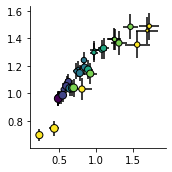

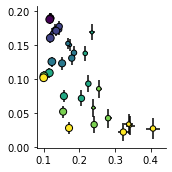

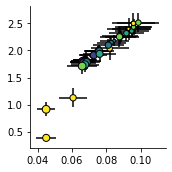

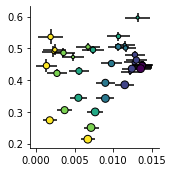

In [ ]:
plt.figure(figsize=(2.5,2.5))
# plt.subplot(1,2,1)
sca.scatter_size_contrast_errorbar(pc_baseline*vip_chrimson_vip_diff,vip_chrimson_pc_diff,equality_line=False,square=False,nsize=6,ncontrast=6)
# plt.xlabel('SST $-$ VIP event rate/mean')
# plt.ylabel('$\Delta$ PC event rate/mean, VIP activation')
ut.erase_top_right()
plt.tight_layout()

plt.figure(figsize=(2.5,2.5))
# plt.subplot(1,2,1)
sca.scatter_size_contrast_errorbar(pc_baseline*vip_halo_vip_diff,vip_halo_pc_diff,equality_line=False,square=False,nsize=6,ncontrast=6)
# plt.xlabel('SST $-$ VIP event rate/mean')
# plt.ylabel('$\Delta$ PC event rate/mean, VIP activation')
ut.erase_top_right()
plt.tight_layout()

plt.figure(figsize=(2.5,2.5))
# plt.subplot(1,2,1)
sca.scatter_size_contrast_errorbar(vip_baseline*vip_chrimson_pc_diff,vip_chrimson_vip_diff,equality_line=False,square=False,nsize=6,ncontrast=6)
# plt.xlabel('SST $-$ VIP event rate/mean')
# plt.ylabel('$\Delta$ PC event rate/mean, VIP activation')
ut.erase_top_right()
plt.tight_layout()

plt.figure(figsize=(2.5,2.5))
# plt.subplot(1,2,1)
sca.scatter_size_contrast_errorbar(vip_baseline*vip_halo_pc_diff,vip_halo_vip_diff,equality_line=False,square=False,nsize=6,ncontrast=6)
# plt.xlabel('SST $-$ VIP event rate/mean')
# plt.ylabel('$\Delta$ PC event rate/mean, VIP activation')
ut.erase_top_right()
plt.tight_layout()

(array([ 5.,  8.,  9.,  7., 20., 12., 11.,  4.,  2., 11.]),
 array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20.]),
 <BarContainer object of 10 artists>)

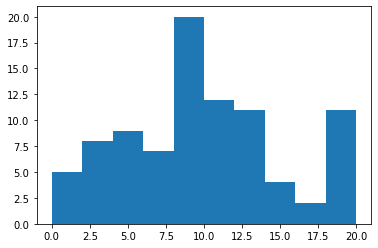

In [ ]:
idir = 2
iconn = 0
plt.figure()
plt.hist(ilight_drmax[idir][iconn][lkat])

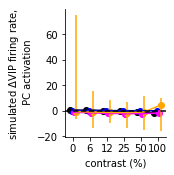

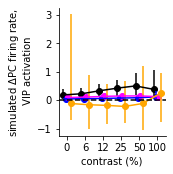

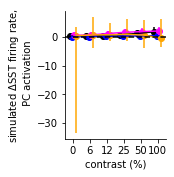

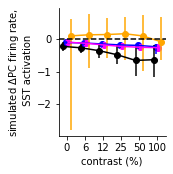

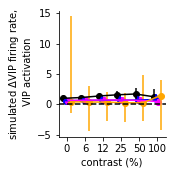

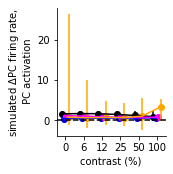

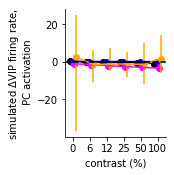

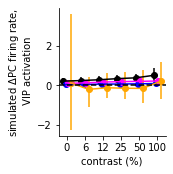

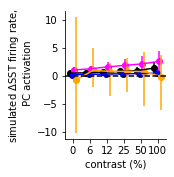

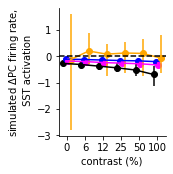

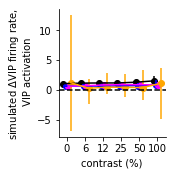

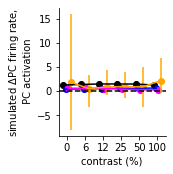

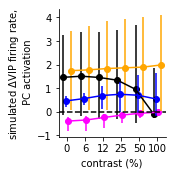

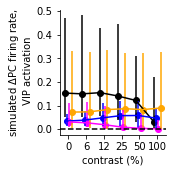

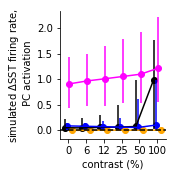

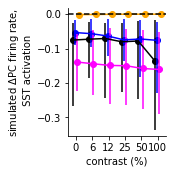

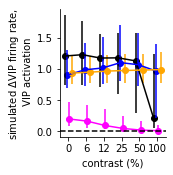

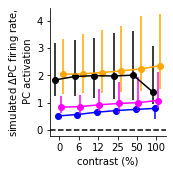

In [ ]:
i,j = 0,2
isize = 3
ilight = 5
dir_lbls = ['baseline','vip_silencing','vip_activation']
idir = 0
# iconn = 0
small_lbl = ['pc','sst','vip','pv']
big_lbl = ['PC','SST','VIP','PV']
for idir in [0,1,2]:
    for i,j,ylim in zip([0,2,0,1,2,0],[2,0,1,0,2,0],[None for _ in range(6)]):
        plt.figure(figsize=(2.5,2.5))
        # for iconn in [0,3]:
        colors = np.array(((0,0,0),(0,0,1),(1,0,1),(1,0.65,0)))
    #     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
    #     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for iconn in [0,3,4]],axis=1)
        cpl = np.concatenate([couplingses[idir][iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for iconn in [0,2,3,4]],axis=1)
        ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors)
        ut.erase_top_right()
        plt.xticks(np.arange(6),ucontrast)
        plt.axhline(0,c='k',linestyle='dashed')
        plt.xlabel('contrast (%)')
        plt.ylabel('simulated $\Delta$%s firing rate, \n %s activation'%(big_lbl[j],big_lbl[i]))
    #     plt.title(dir_lbls[idir])
        plt.tight_layout()
    #     plt.ylim((-2.5,5.5))
#         plt.savefig('figures/%s_%s_coupling_connection_deletion_%s.jpg'%(small_lbl[i],small_lbl[j],dir_lbls[idir]),dpi=300)

In [ ]:
big_lbl

['PC', 'SST', 'VIP', 'PV']

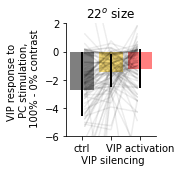

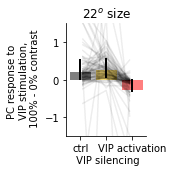

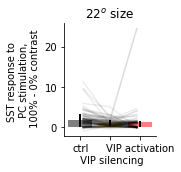

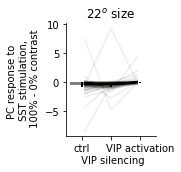

In [ ]:
iconn = 0
for i,j,ylim in zip([0,2,0,1],[2,0,1,0],[(-6,2),(-1.5,1.5),None,None]):
    plt.figure(figsize=(2.5,2.5))
    icontrast1,icontrast2 = 0,5
    arr1,arr2,arr3 = [couplingses[idir][iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:] for idir in range(3)]
    data1,data2,data3 = [arr[:,icontrast2] - arr[:,icontrast1] for arr in [arr1,arr2,arr3]]
    datas = np.concatenate((data1[:,np.newaxis],data2[:,np.newaxis],data3[:,np.newaxis]),axis=1)
    colors = np.array(((0,0,0),(1,0.8,0),(1,0,0)))
    xticklabels = ['ctrl','\n VIP silencing','VIP activation']
    ut.plot_bars_with_lines(datas,colors=colors,xticklabels=xticklabels,errorstyle='pct',alpha=0.025)
#     plt.ylim((-2.5,1.5))
    plt.ylabel('%s response to \n %s stimulation, \n 100%% - 0%% contrast'%(big_lbl[j],big_lbl[i]))
    plt.title('22$^o$ size')
    ut.erase_top_right()
    plt.ylim(ylim)
    plt.tight_layout()
    plt.savefig(notebook_base+'figures/%s_%s_coupling_100_minus_0_contrast_vip_silencing_activation.jpg'%(small_lbl[i],small_lbl[j]),dpi=300)

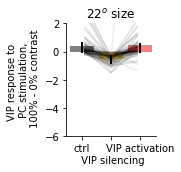

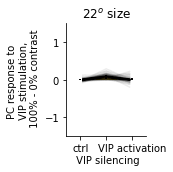

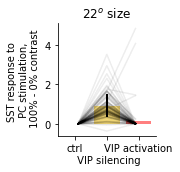

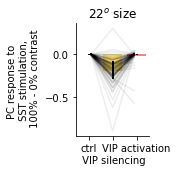

In [ ]:
iconn = 0
for i,j,ylim in zip([0,2,0,1],[2,0,1,0],[(-6,2),(-1.5,1.5),None,None]):
    plt.figure(figsize=(2.5,2.5))
    icontrast1,icontrast2 = 0,5
    arr1,arr2,arr3 = [couplingses[idir][iconn][lkat][:,:,isize,:,i,j][:,-1,:] for idir in range(3)]
    data1,data2,data3 = [arr[:,icontrast2] - arr[:,icontrast1] for arr in [arr1,arr2,arr3]]
    datas = np.concatenate((data1[:,np.newaxis],data2[:,np.newaxis],data3[:,np.newaxis]),axis=1)
    colors = np.array(((0,0,0),(1,0.8,0),(1,0,0)))
    xticklabels = ['ctrl','\n VIP silencing','VIP activation']
    ut.plot_bars_with_lines(datas,colors=colors,xticklabels=xticklabels,errorstyle='pct',alpha=0.025)
#     plt.ylim((-2.5,1.5))
    plt.ylabel('%s response to \n %s stimulation, \n 100%% - 0%% contrast'%(big_lbl[j],big_lbl[i]))
    plt.title('22$^o$ size')
    ut.erase_top_right()
    plt.ylim(ylim)
    plt.tight_layout()
#     plt.savefig('figures/%s_%s_coupling_100_minus_0_contrast_vip_silencing_activation_max_current.jpg'%(small_lbl[i],small_lbl[j]),dpi=300)

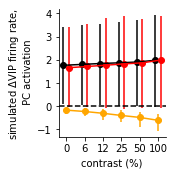

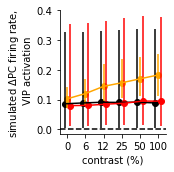

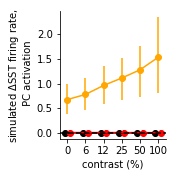

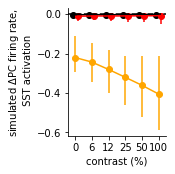

In [ ]:
i,j = 0,2
isize = 3
ilight = 5
# dir_lbls = ['baseline','vip_silencing','vip_activation']
iconn = 0
small_lbl = ['pc','sst','vip','pv']
big_lbl = ['PC','SST','VIP','PV']
for i,j,ylim in zip([0,2,0,1],[2,0,1,0],[None,None,None,None]):
    plt.figure(figsize=(2.5,2.5))
    # for iconn in [0,3]:
    colors = np.array(((0,0,0),(1,0.65,0),(1,0,0)))
#     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j][:,np.newaxis] for iconn in [0,3,4]],axis=1)
#     cpl = np.concatenate([couplingses[idir][iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),ilight_drmax[idir][iconn][lkat],:][:,np.newaxis] for iconn in [0,3,4]],axis=1)
    cpl = np.concatenate([couplingses[idir][iconn][lkat][:,:,isize,:,i,j][np.arange(lkat.sum()),-1,:][:,np.newaxis] for idir in [0,1,2]],axis=1)
    ut.plot_pct_errorbars_hillel(np.arange(6),cpl,delta=0.1,pct=(16,84),colors=colors)
    ut.erase_top_right()
    plt.xticks(np.arange(6),ucontrast)
    plt.axhline(0,c='k',linestyle='dashed')
    plt.xlabel('contrast (%)')
    plt.ylabel('simulated $\Delta$%s firing rate, \n %s activation'%(big_lbl[j],big_lbl[i]))
#     plt.title(dir_lbls[idir])
    plt.tight_layout()
#     plt.ylim((-2.5,5.5))
#     plt.savefig('figures/%s_%s_coupling_vip_full_power_silencing_activation.jpg'%(small_lbl[i],small_lbl[j]),dpi=300)

In [ ]:
ilight_drmax[0].shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
i,j = 4,0
plt.figure(figsize=(3,2.5))
icontrast1,icontrast2 = 0,5
idir = 0
ibaseline = 15
arrs = [couplingses[idir][iconn][lkat][:,ibaseline,isize,:,i,j]/baseline_means[lkat,j:j+1] for iconn in [0,4,3,2]]
# arr2 = couplingses[idir][4][lkat][:,0,isize,:,i,j]
# arr3 = couplingses[idir][3][lkat][:,0,isize,:,i,j]
# arr3 = couplingses[idir][3][lkat][:,0,isize,:,i,j]
datas = [arr[:,icontrast2] - arr[:,icontrast1] for arr in arrs]
datas = np.concatenate([d[:,np.newaxis] for d in datas],axis=1)
# colors = np.array(((0,0,0),(1,0.5,0),(1,0,1),(0,0,1))) # np.array((236, 0, 140))/255
colors = np.array(((0.5,0.5,0.5),(1,0.5,0),np.array((236, 0, 140))/255,(0,0,1))) # 
xticklabels = ['baseline','\n '+r'no PC$\rightarrow$SST',r'no PC$\rightarrow$VIP']
xticklabels = ['baseline','\n '+r'PC$\rightarrow$SST del.',r'PC$\rightarrow$SST del.','\n '+r'PC$\leftrightarrow$PV del.']
ut.plot_bars_with_lines(datas,colors=colors,xticklabels=xticklabels,errorstyle='pct',alpha=0.01)
# plt.ylim((-2.5,1.5))
plt.ylim((-5,3))
plt.ylabel('center PC response to \n surround PC stimulation, \n 100% - 0% contrast')
plt.title('22$^o$ size')
ut.erase_top_right()
plt.tight_layout()
# plt.savefig('figures/far_pc_coupling_pcsst_pcvip_pcpv_deleted_no_opto_dynamic_range_bars_%s.jpg'%wtfile,dpi=300)
# plt.savefig('figures/far_pc_coupling_pcsst_pcvip_pcpv_deleted_no_opto_dynamic_range_bars.jpg',dpi=300)


NameError: name 'baseline_means' is not defined

<Figure size 216x180 with 0 Axes>

In [ ]:
save_fig = False
iconn = 0
arrs = [couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j]/baseline_means[lkat,j:j+1] for idir,ilight in zip([0,1,2],[ibaseline,ilow,ihigh])]
changes = [network_resps[idir][iconn][lkat][:,ilight,:,j].reshape((-1,6,6))[:,isize,:]/baseline_means[lkat,j:j+1] for idir,ilight in zip([0,1,2],[ibaseline,ilow//1,ihigh//1])]
changes = [c - changes[0] for c in changes]
to_plot = np.array(arrs).transpose((1,0,2)) # reps x opto conditions x contrasts
i,j = 4,0
plt.figure(figsize=(2.5,2.5))
ucontrast = np.array((0,6,12,25,50,100))
isize = 3
colors = np.array(((0,0,0),(1,0.8,0),(1,0,0)))

to_plot = np.array(arrs).transpose((1,0,2)) #
slicer = slice(None, 1)
ut.plot_pct_errorbars_hillel(np.arange(6),to_plot[:,slicer],pct=(16,84),colors=colors[slicer])

to_plot = np.array(changes).transpose((1,0,2)) #
slicer = slice(1, None)
ut.plot_pct_errorbars_hillel(np.arange(6),to_plot[:,slicer],pct=(16,84),colors=colors[slicer])

ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')
plt.ylabel(r'near PC response'+'\n to driving far PC\nOR change in near PC activity')
plt.title('22$^o$ size')
plt.xticks(np.arange(6),ucontrast)
plt.tight_layout()
if save_fig:
    plt.savefig(notebook_base+'/figures/far_pc_near_pc_coupling_overlaid_with_sim_vip_opto_deltas.png')

NameError: name 'baseline_means' is not defined

In [251]:
save_fig = False
iconn = 0
arrs = [couplingses[idir][iconn][lkat][:,ilight,isize,:,i,j]/baseline_means[lkat,j:j+1] for idir,ilight in zip([0,1,2],[ibaseline,ilow,ihigh])]
changes = [network_resps[idir][iconn][lkat][:,ilight,:,j].reshape((-1,6,6))[:,isize,:]/baseline_means[lkat,j:j+1] for idir,ilight in zip([0,1,2],[ibaseline,ilow//1,ihigh//1])]
changes = [c - changes[0] for c in changes]
to_plot = np.array(arrs).transpose((1,0,2)) # reps x opto conditions x contrasts
i,j = 4,0
plt.figure(figsize=(2.5,2.5))
ucontrast = np.array((0,6,12,25,50,100))
isize = 3
colors = np.array(((0,0,0),(1,0.8,0),(1,0,0)))

to_plot = np.array(arrs).transpose((1,0,2)) #
slicer = slice(None)
ut.plot_pct_errorbars_hillel(np.arange(6),to_plot[:,slicer],pct=(16,84),colors=colors[slicer])

# to_plot = np.array(changes).transpose((1,0,2)) #
# slicer = slice(1, None)
# ut.plot_pct_errorbars_hillel(np.arange(6),to_plot[:,slicer],pct=(16,84),colors=colors[slicer])

ut.erase_top_right()
plt.axhline(c='k',linestyle='dashed')
plt.ylabel(r'near PC response'+'\n to driving far PC')#\nOR change in near PC activity')
plt.title('22$^o$ size')
plt.xticks(np.arange(6),ucontrast)
plt.tight_layout()
if save_fig:
    plt.savefig('../figures/far_pc_near_pc_coupling_sim_vip_opto.png')

NameError: name 'baseline_means' is not defined

In [252]:
plt.figure()
for i in range(1,4):
    print(sst.wilcoxon(datas[:,0],datas[:,i]))
    print((datas[:,0]<datas[:,i]).mean())

WilcoxonResult(statistic=93.0, pvalue=5.61248711940492e-15)
0.056179775280898875
WilcoxonResult(statistic=1765.0, pvalue=0.3312062094050663)
0.6179775280898876


IndexError: index 3 is out of bounds for axis 1 with size 3

<Figure size 432x288 with 0 Axes>

In [214]:
conn_lbls

['baseline',
 'pcpc_deleted',
 'pcpv_deleted',
 'pcvip_deleted',
 'pcsst_deleted',
 '']

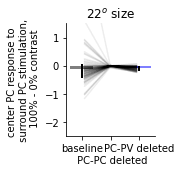

In [ ]:
i,j = 4,0
plt.figure(figsize=(2.5,2.5))
icontrast1,icontrast2 = 0,5
idir = 0
arr1 = couplingses[idir][0][lkat][:,0,isize,:,i,j]
arr2 = couplingses[idir][1][lkat][:,0,isize,:,i,j]
arr3 = couplingses[idir][2][lkat][:,0,isize,:,i,j]
data1,data2,data3 = [arr[:,icontrast2] - arr[:,icontrast1] for arr in [arr1,arr2,arr3]]
datas = np.concatenate((data1[:,np.newaxis],data2[:,np.newaxis],data3[:,np.newaxis]),axis=1)
colors = np.array(((0,0,0),(0.5,0.5,0.5),(0,0,1)))
xticklabels = ['baseline','\n PC-PC deleted','PC-PV deleted']
ut.plot_bars_with_lines(datas,colors=colors,xticklabels=xticklabels,errorstyle='pct',alpha=0.025)
plt.ylim((-2.5,1.5))
plt.ylabel('center PC response to \n surround PC stimulation, \n 100% - 0% contrast')
plt.title('22$^o$ size')
ut.erase_top_right()
plt.tight_layout()
# plt.savefig('figures/far_pc_coupling_pcpc_pcpv_deleted_no_opto_dynamic_range_bars.jpg',dpi=300)

In [ ]:
sst.wilcoxon(data1,data2)

WilcoxonResult(statistic=957.0, pvalue=1.8903015753786966e-05)

In [ ]:
sst.wilcoxon(data1,data3)

WilcoxonResult(statistic=1374.0, pvalue=0.010129087822745622)

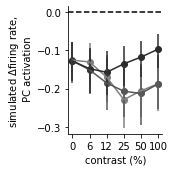

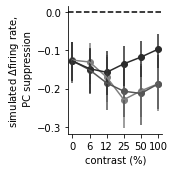

In [ ]:
def compute_dr(network_resp,iopto,ibaseline,itype=0):
    dr = np.reshape(network_resp[:,iopto,:,itype] - network_resp[:,ibaseline,:,itype],(nwt,6,6))
    return dr

dr_up = compute_dr(network_resp_no_pcpv,ihigh,ibaseline)
dr_down = compute_dr(network_resp_no_pcpv,ilow,ibaseline)

dr_up = compute_dr(network_resp,ihigh,ibaseline)
dr_down = compute_dr(network_resp,ilow,ibaseline)

isizes = [0,2,4]
this_nsize = len(isizes)
cfrac = np.linspace(1,0,this_nsize+1)[:-1]
c_l23 = cfrac[:,np.newaxis]*np.array(((0.5,0.5,0.5)))
ucontrast = np.array((0,6,12,25,50,100))

plt.figure(figsize=(2.5,2.5))
ut.plot_pct_errorbars_hillel(np.arange(6),dr_up[:,isizes],pct=(16,84),colors=c_l23)
ut.erase_top_right()
plt.xticks(np.arange(6),ucontrast)
plt.axhline(0,c='k',linestyle='dashed')
plt.xlabel('contrast (%)')
plt.ylabel('simulated $\Delta$firing rate, \n PC activation')
plt.tight_layout()
# plt.savefig('figures/sim_pc_activation_size_contrast.eps')

plt.figure(figsize=(2.5,2.5))
ut.plot_pct_errorbars_hillel(np.arange(6),dr_down[:,isizes],pct=(16,84),colors=c_l23)
ut.erase_top_right()
plt.xticks(np.arange(6),ucontrast)
plt.axhline(0,c='k',linestyle='dashed')
plt.xlabel('contrast (%)')
plt.ylabel('simulated $\Delta$firing rate, \n PC suppression')
plt.tight_layout()
# plt.savefig('figures/sim_pc_suppression_size_contrast.eps')

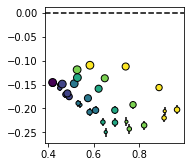

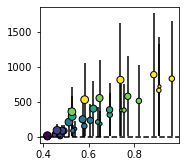

In [ ]:
ilight_halo = 5
ilight_chrimson = 25
ilight_off = 15

itype = 0
for ilight_light in [ilight_halo,ilight_chrimson]:
    plt.figure(figsize=(2.5,2.5))
    xdata = network_resp[:,ilight_off,:,itype].reshape((-1,6,6))
    ydata = network_resp[:,ilight_light,:,itype].reshape((-1,6,6))
    sca.scatter_size_contrast_errorbar(xdata,ydata-xdata,equality_line=False,square=False)
    plt.axhline(0,c='k',linestyle='dashed')

In [ ]:
# baseline_means = np.array([[0.59831338, 0.35549837, 0.51313612, 0.55155884, 0.64574025,
#         0.34655574, 0.59518061, 0.58903858],
#        [0.6265476 , 0.34923061, 0.54164721, 0.5681671 , 0.63051034,
#         0.34010741, 0.5577847 , 0.57693285],
#        [0.59679204, 0.34676945, 0.52189166, 0.56028437, 0.65235038,
#         0.34257354, 0.57661866, 0.61168981],
#        [0.61860379, 0.34527944, 0.54772243, 0.56384291, 0.64441281,
#         0.34184063, 0.55349653, 0.58074276],
#        [0.58789158, 0.35009168, 0.52939634, 0.54430732, 0.66362103,
#         0.34767499, 0.5846538 , 0.60003401],
#        [0.59291782, 0.35263042, 0.51683491, 0.54553352, 0.66039747,
#         0.34132553, 0.5833542 , 0.60365916],
#        [0.60017347, 0.35760101, 0.53087393, 0.54648481, 0.65724588,
#         0.34523342, 0.57593274, 0.61584633],
#        [0.60321257, 0.36201804, 0.54518945, 0.55704056, 0.63934964,
#         0.34414513, 0.57602136, 0.58330416],
#        [0.61985855, 0.35494893, 0.53100541, 0.56587596, 0.63809681,
#         0.33767655, 0.57127135, 0.5826782 ],
#        [0.6337915 , 0.36684552, 0.56249134, 0.55820205, 0.63542677,
#         0.35986559, 0.57526002, 0.56738551],
#        [0.58133546, 0.35969261, 0.52898627, 0.53926939, 0.63521507,
#         0.35654485, 0.58907064, 0.57950257],
#        [0.59334381, 0.34914416, 0.52413493, 0.55357249, 0.65358271,
#         0.34075513, 0.58094351, 0.60810346],
#        [0.6229475 , 0.33887916, 0.50158656, 0.55527576, 0.67790606,
#         0.32830246, 0.56107446, 0.59975661],
#        [0.62918207, 0.35728275, 0.53330385, 0.55993081, 0.63700887,
#         0.33478241, 0.57147606, 0.57082976],
#        [0.61987533, 0.35556566, 0.53003563, 0.5660793 , 0.63817799,
#         0.33855073, 0.56974955, 0.58266207],
#        [0.62130606, 0.33966456, 0.54252631, 0.56671314, 0.64070783,
#         0.34388147, 0.557594  , 0.57802311],
#        [0.59633712, 0.33884525, 0.51337476, 0.56680259, 0.64826807,
#         0.33114042, 0.56526297, 0.61135093],
#        [0.60435482, 0.34235315, 0.52042136, 0.54759793, 0.65358829,
#         0.3349741 , 0.56738013, 0.5949167 ],
#        [0.60652902, 0.35860612, 0.53202465, 0.53340975, 0.66695223,
#         0.34063732, 0.59042223, 0.59904684],
#        [0.59505849, 0.35037918, 0.51749801, 0.55190766, 0.65448164,
#         0.3437822 , 0.58179903, 0.59736471],
#        [0.60881141, 0.34350823, 0.50890577, 0.54746848, 0.66981339,
#         0.32785965, 0.5796606 , 0.60093404],
#        [0.59573781, 0.35551243, 0.52008963, 0.54351932, 0.65127021,
#         0.3358519 , 0.58307319, 0.61134802],
#        [0.57467885, 0.36238506, 0.55448267, 0.54540374, 0.64888756,
#         0.35985073, 0.60597712, 0.60359833],
#        [0.61031716, 0.34437362, 0.53374421, 0.56396754, 0.64682899,
#         0.34332756, 0.56136324, 0.59315743],
#        [0.59691754, 0.34754693, 0.52156733, 0.54896781, 0.65510974,
#         0.3477976 , 0.584276  , 0.60019573],
#        [0.60433676, 0.33740812, 0.5357699 , 0.5596085 , 0.64927753,
#         0.35019295, 0.56369259, 0.59534952],
#        [0.59477206, 0.34765887, 0.52406755, 0.54719822, 0.66087336,
#         0.34084777, 0.57911109, 0.60526538],
#        [0.59779211, 0.35268663, 0.53530254, 0.53236084, 0.65944701,
#         0.34224887, 0.57336747, 0.60857269],
#        [0.58760696, 0.36193739, 0.51811428, 0.53393953, 0.65967201,
#         0.35114788, 0.60076918, 0.60242812],
#        [0.59521486, 0.36100628, 0.52793885, 0.54633195, 0.63978666,
#         0.34984872, 0.58271682, 0.58862218],
#        [0.58939884, 0.35213705, 0.51389641, 0.56272665, 0.6415273 ,
#         0.3401448 , 0.58806834, 0.60982054],
#        [0.602281  , 0.35314865, 0.53921154, 0.5600508 , 0.65287089,
#         0.36204076, 0.56693775, 0.59928055],
#        [0.59412523, 0.35916063, 0.52690991, 0.54660787, 0.65128837,
#         0.34123831, 0.5870689 , 0.60490482],
#        [0.60699211, 0.3454768 , 0.52790262, 0.56330946, 0.64143862,
#         0.34141278, 0.567226  , 0.59398968],
#        [0.61378268, 0.35755217, 0.53552929, 0.5705591 , 0.63040611,
#         0.3406959 , 0.57577034, 0.58828259],
#        [0.5925918 , 0.3510916 , 0.51655915, 0.55198212, 0.65183567,
#         0.34164321, 0.57801761, 0.60028194],
#        [0.60782744, 0.34326956, 0.51338006, 0.55240886, 0.65578585,
#         0.33145766, 0.57153699, 0.59662429],
#        [0.61030691, 0.35137403, 0.51682947, 0.54643225, 0.66148844,
#         0.34014595, 0.59146567, 0.59555849],
#        [0.59683196, 0.35356511, 0.52402187, 0.54995853, 0.65430141,
#         0.3436042 , 0.58231101, 0.59884811],
#        [0.59689038, 0.34440889, 0.51114369, 0.556719  , 0.65460368,
#         0.33436453, 0.57976683, 0.61492735],
#        [0.61063166, 0.33919542, 0.56089403, 0.55216501, 0.66470513,
#         0.33955091, 0.59658192, 0.59858606],
#        [0.58701714, 0.35704727, 0.5236891 , 0.54968726, 0.6518909 ,
#         0.34765458, 0.58933628, 0.59849969],
#        [0.59990149, 0.34836492, 0.51958461, 0.55716097, 0.65885699,
#         0.33968352, 0.57664162, 0.60576834],
#        [0.59694654, 0.3464038 , 0.52374633, 0.54977665, 0.66122195,
#         0.34449883, 0.5853189 , 0.60273561],
#        [0.65120049, 0.33954125, 0.54040651, 0.51722581, 0.67328761,
#         0.33327224, 0.55106821, 0.53336779],
#        [0.60840005, 0.3473019 , 0.53043556, 0.5641516 , 0.64855635,
#         0.33215873, 0.55930192, 0.58975616],
#        [0.62388476, 0.35986013, 0.53573582, 0.55946061, 0.63794728,
#         0.34419251, 0.57789695, 0.57554619],
#        [0.62297374, 0.34636133, 0.52815991, 0.56241457, 0.62872585,
#         0.33424577, 0.54749527, 0.58065665],
#        [0.60050844, 0.34099459, 0.54504177, 0.55476824, 0.65316316,
#         0.34684159, 0.58181924, 0.59961913],
#        [0.60155257, 0.34878884, 0.52087341, 0.54718062, 0.66071343,
#         0.33676885, 0.57822898, 0.61022139],
#        [0.58198723, 0.34972248, 0.52927077, 0.55821027, 0.64536313,
#         0.3418553 , 0.5870924 , 0.61098037],
#        [0.61213105, 0.35053634, 0.53923597, 0.56239964, 0.64263447,
#         0.33672872, 0.55913963, 0.58509281],
#        [0.58936732, 0.36539038, 0.54921689, 0.5237981 , 0.66705495,
#         0.35915088, 0.60725801, 0.57933693],
#        [0.61615439, 0.33066458, 0.55410959, 0.57037352, 0.65613778,
#         0.33120541, 0.57941668, 0.60688325],
#        [0.625894  , 0.348715  , 0.54346152, 0.56415978, 0.63259358,
#         0.33650277, 0.56284886, 0.58191327],
#        [0.60211785, 0.34668084, 0.523573  , 0.54557858, 0.66265444,
#         0.33885493, 0.57984266, 0.59812823],
#        [0.59855296, 0.36968609, 0.54197057, 0.53585581, 0.6511861 ,
#         0.36021011, 0.59404249, 0.58871617],
#        [0.62843037, 0.34879434, 0.54229709, 0.56778858, 0.63142666,
#         0.34319905, 0.56205792, 0.57492118],
#        [0.5927688 , 0.34527442, 0.49793411, 0.54574195, 0.66450065,
#         0.33039104, 0.57617666, 0.61710057],
#        [0.60406119, 0.35875433, 0.54956257, 0.53365208, 0.6594716 ,
#         0.35346021, 0.60183476, 0.58777614],
#        [0.59526878, 0.34749177, 0.51870073, 0.54648902, 0.65726142,
#         0.34726374, 0.57613619, 0.60045126],
#        [0.60660005, 0.35416514, 0.53697648, 0.56043503, 0.64549828,
#         0.33532109, 0.56411131, 0.58925566],
#        [0.60842465, 0.34421012, 0.53539901, 0.56209555, 0.63957292,
#         0.34074013, 0.56858658, 0.59243453],
#        [0.61473282, 0.35256789, 0.53516666, 0.57486699, 0.63230653,
#         0.3380375 , 0.57276818, 0.59377776],
#        [0.6211122 , 0.35327199, 0.54077641, 0.56390877, 0.64282777,
#         0.33971135, 0.5650289 , 0.57893578],
#        [0.58294971, 0.33812488, 0.52052847, 0.53734049, 0.6365689 ,
#         0.33266974, 0.57214732, 0.58970447],
#        [0.62956028, 0.35010039, 0.54179091, 0.57512075, 0.63205441,
#         0.34433374, 0.56168134, 0.5827494 ],
#        [0.62659754, 0.34472716, 0.54350461, 0.57058743, 0.62742225,
#         0.33956053, 0.55040283, 0.5770076 ],
#        [0.59923069, 0.35439905, 0.51828958, 0.5402098 , 0.65918209,
#         0.33617281, 0.58254057, 0.60986601],
#        [0.62736367, 0.34640895, 0.54057705, 0.56929242, 0.62751134,
#         0.34066039, 0.54916904, 0.57419591],
#        [0.59574271, 0.34802372, 0.52002067, 0.55648656, 0.65505093,
#         0.339906  , 0.57713335, 0.60255662],
#        [0.59423262, 0.34371505, 0.51203301, 0.54915374, 0.6654685 ,
#         0.33467362, 0.57378131, 0.60978497],
#        [0.58954233, 0.35256176, 0.5063121 , 0.54336619, 0.66585167,
#         0.33905305, 0.59700087, 0.60716696],
#        [0.60045113, 0.34683458, 0.52304444, 0.55471168, 0.65831702,
#         0.33956933, 0.58081354, 0.59888364],
#        [0.61235416, 0.33866034, 0.55600223, 0.55518246, 0.65710437,
#         0.3419231 , 0.57664617, 0.60047962],
#        [0.60462359, 0.35259595, 0.51782979, 0.54860749, 0.65855678,
#         0.34073501, 0.59211647, 0.59470529],
#        [0.59636877, 0.33572402, 0.52890977, 0.5388083 , 0.65399464,
#         0.33802407, 0.57377038, 0.59704542],
#        [0.57989435, 0.35852015, 0.53772125, 0.53513243, 0.64565645,
#         0.3518621 , 0.59223959, 0.5945779 ],
#        [0.60751352, 0.35492049, 0.53172317, 0.55689148, 0.6491295 ,
#         0.34311502, 0.57413573, 0.59007942],
#        [0.62450636, 0.35085525, 0.53672033, 0.57989343, 0.6271839 ,
#         0.34498589, 0.55662581, 0.5871242 ],
#        [0.60837981, 0.34529528, 0.51414941, 0.55386534, 0.6601044 ,
#         0.3348662 , 0.57879549, 0.59624705],
#        [0.57519317, 0.36406058, 0.53673922, 0.53318789, 0.64520452,
#         0.3587238 , 0.60065814, 0.57963651],
#        [0.62553152, 0.34770581, 0.54018849, 0.57062741, 0.63143232,
#         0.33561207, 0.55637432, 0.57675888],
#        [0.5912793 , 0.35150322, 0.52660686, 0.54300284, 0.66157724,
#         0.34515457, 0.58367699, 0.59569782],
#        [0.60241205, 0.34761271, 0.52328202, 0.54534927, 0.6661152 ,
#         0.34695845, 0.58420586, 0.5983913 ],
#        [0.61836786, 0.34337438, 0.54278101, 0.57081906, 0.64192105,
#         0.33822547, 0.5527026 , 0.58523409],
#        [0.59675821, 0.34115926, 0.50416873, 0.56490096, 0.65854256,
#         0.33243862, 0.5755263 , 0.61556931],
#        [0.60008824, 0.34536309, 0.52030026, 0.55841849, 0.65631918,
#         0.34243125, 0.57883228, 0.60488374],
#        [0.58814142, 0.35713312, 0.52296313, 0.54473361, 0.66293388,
#         0.33557458, 0.57020459, 0.61824048],
#        [0.59818702, 0.35239576, 0.51449503, 0.55312701, 0.65331528,
#         0.34031815, 0.58788006, 0.59948916],
#        [0.59846369, 0.36334998, 0.52072568, 0.53213235, 0.65525295,
#         0.34477418, 0.60033157, 0.59377913],
#        [0.59899126, 0.34824649, 0.51579282, 0.54458886, 0.66264524,
#         0.33853972, 0.5783941 , 0.62054105],
#        [0.59094396, 0.3443464 , 0.50716563, 0.56115531, 0.65401453,
#         0.33173801, 0.56924787, 0.62486433],
#        [0.60339526, 0.3532665 , 0.53585583, 0.52897575, 0.66335377,
#         0.33930498, 0.58313202, 0.5995259 ]])

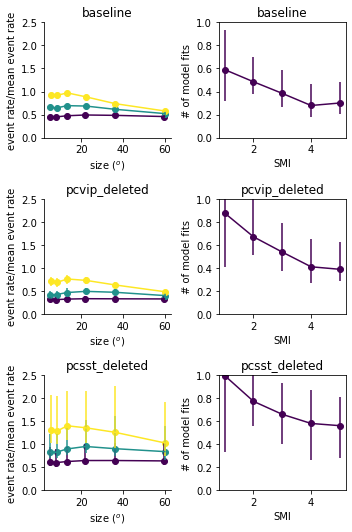

In [ ]:
conn_lbls = ['baseline','pcpc_deleted','pcpv_deleted','pcvip_deleted','pcsst_deleted','']
reload(ut)
ialign = 0
irun = 0
idir = 0

ylim = (0,2.5)
plt.figure(figsize=(5,7.5))
iplot = 0    

for iconn,ylim in zip([0,3,4],[ylim for _ in range(4)]):

    nr = network_resps[0][iconn][:,15].reshape((-1,6,6,8))

    lbls = ['pc_l4','pc_l23','sst','vip','pv']
    c_l4 = np.array((0,0.5,0))
    c_l23 = [np.array((0.33,0.33,0.33)),np.array((0.5,0.5,0.5))][::-1]
    c_sst = [np.array((0.75,0.45,0)),np.array((1,0.65,0))][::-1]
    c_vip = [np.array((0.75,0,0.75)),np.array((1,0,1))][::-1]
    c_pv = np.array((0,0,1))
    colors = [c_l4,c_l23,c_sst,c_vip,c_pv]
    usize = [5,8,13,22,36,60]
    ucontrast = [0,6,12,25,50,100]

    these_types = [1]
    for itype in these_types:#range(len(rsexpt)):
        for _ in range(1): #[0,4]):
            data = nr[:,:,:,itype-1]
#             data = data/np.nanmean(np.nanmean(data,1),1)[:,np.newaxis,np.newaxis]
        #     for icontrast in range(6):
            #     plt.errorbar([5,8,13,22,36,60],np.nanmean(data,0)[:,icontrast],compute_sem(data,0)[:,icontrast])
#             ut.plot_pct_errorbars_hillel(ucontrast,data[:,isize:isize+1,:],pct=(16,84),colors=colors[itype][iisize][np.newaxis])
            plt.subplot(3,2,iplot+1)
            ut.plot_pct_errorbars_hillel(usize,data[:,:,[1,3,5]].transpose((0,2,1)),pct=(16,84),delta=0.1)#,colors=colors[itype][iisize][np.newaxis])
#             plt.xticks(np.arange(6),usize)
    #         plt.legend(['6%','25%','100%'])
            plt.xlabel('size ($^o$)')
            plt.ylabel('event rate/mean event rate')
#         plt.legend(['PC','SST','VIP'],frameon=False)
#         plt.title('%d$^o$ size'%usize[isize])
            plt.ylim(ylim)
            ut.erase_top_right()
            plt.tight_layout()
            plt.title(conn_lbls[iconn])
            iplot += 1
        for _ in range(1):#range(len(rsexpt)):
            data = nr[:,:,:,itype-1]
            plt.subplot(3,2,iplot+1)
            smi = (data[:,-1,:]-data[:,:,:].min(1).min(1)[:,np.newaxis])/(data[:,:,:].max(1)-data[:,:,:].min(1).min(1)[:,np.newaxis])
#             smi = (data[:,-1,:]-0*data[:,:,:].min(1).min(1)[:,np.newaxis])/(data[:,:,:].max(1)-0*data[:,:,:].min(1).min(1)[:,np.newaxis])
            bins = np.linspace(0,1,20)
            icontrast1,icontrast2 = 1,-1
#             plt.hist(smi[:,icontrast1]-smi[:,icontrast2],bins=bins,alpha=0.5)
            ut.plot_pct_errorbars_hillel(np.arange(1,6),smi[:,np.newaxis,1:])
            plt.ylim((0,1))
            plt.title(conn_lbls[iconn])
            plt.xlabel('SMI')
            plt.ylabel('# of model fits')
            iplot += 1
#             ut.plot_pct_errorbars_hillel(usize,data[:,:,[1,3,5]].transpose((0,2,1)),pct=(16,84),delta=0.1)#,colors=colors[itype][iisize][np.newaxis])
#     plt.savefig('figures/sim_pc_tuning_baseline_pcsst.eps')

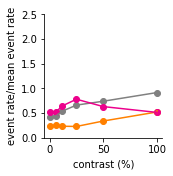

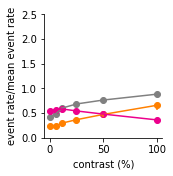

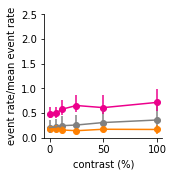

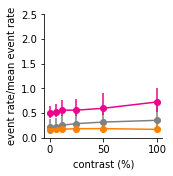

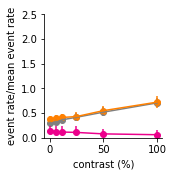

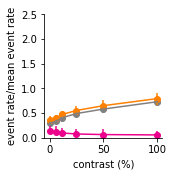

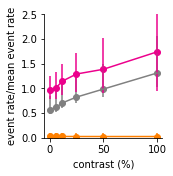

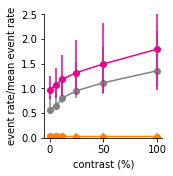

In [ ]:
save_fig = False
reload(ut)
ialign = 0
irun = 0
idir = 0

ylim = (0,2.5)

for iconn,ylim in zip([0,2,3,4],[ylim for _ in range(4)]):

    nr = network_resps[0][iconn][:,15].reshape((-1,6,6,8))

    lbls = ['pc_l4','pc_l23','sst','vip','pv']
    c_l4 = np.array((0,0.5,0))
    c_l23 = [np.array((0.5, 0.5, 0.5)) for i in range(2)]#[np.array((0.33,0.33,0.33)),np.array((0.5,0.5,0.5))][::-1]
    c_sst = [np.array((1, 0.5, 0)) for i in range(2)]#[np.array((0.75,0.45,0)),np.array((1,0.65,0))][::-1]
    c_vip = [np.array((236, 0, 140))/255 for i in range(2)]#[np.array((0.75,0,0.75)),np.array((1,0,1))][::-1]
    c_pv = np.array((0,0,1))
    colors = [c_l4,c_l23,c_sst,c_vip,c_pv]
    usize = [5,8,13,22,36,60]
    ucontrast = [0,6,12,25,50,100]

    for iisize,isize in enumerate([0,3]): #[0,4]):
        plt.figure(figsize=(2.5,2.5))
        these_types = [1,2,3]
        for itype in these_types:#range(len(rsexpt)):
            data = nr[:,:,:,itype-1]
#             data = data/np.nanmean(np.nanmean(data,1),1)[:,np.newaxis,np.newaxis]
        #     for icontrast in range(6):
            #     plt.errorbar([5,8,13,22,36,60],np.nanmean(data,0)[:,icontrast],compute_sem(data,0)[:,icontrast])
            ut.plot_pct_errorbars_hillel(ucontrast,data[:,isize:isize+1,:],pct=(16,84),colors=colors[itype][iisize][np.newaxis])
#             ut.plot_pct_errorbars_hillel(np.arange(6),data[:,isize:isize+1,:],pct=(16,84),colors=colors[itype][iisize][np.newaxis])
#             plt.xticks(np.arange(6),ucontrast)
    #         plt.legend(['6%','25%','100%'])
            plt.xlabel('contrast (%)')
            plt.ylabel('event rate/mean event rate')
#         plt.legend(['PC','SST','VIP'],frameon=False)
#         plt.title('%d$^o$ size'%usize[isize])
        plt.ylim(ylim)
        ut.erase_top_right()
        plt.tight_layout()
        if save_fig:
            plt.savefig('figures/sim_pc_sst_vip_%s_linear_contrast_by_size_%d.eps'%(conn_lbls[iconn],isize))

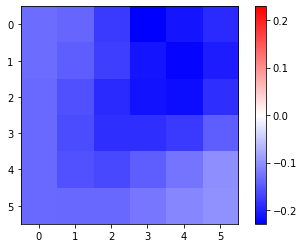

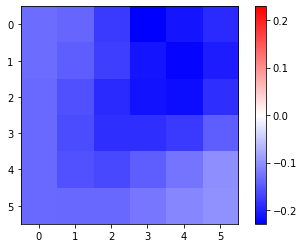

In [ ]:
mx = np.maximum(np.max(np.abs(np.nanmean(dr_up,0))),np.max(np.abs(np.nanmean(dr_down,0))))
plt.figure()
ut.imshow_hot_cold(np.nanmean(dr_up,0),mx=mx)
plt.colorbar()
plt.figure()
ut.imshow_hot_cold(np.nanmean(dr_down,0),mx=mx)
plt.colorbar()

In [ ]:
res.shape

(89, 6, 6)

In [ ]:
%load_ext autoreload
%autoreload 2

alpha = 0.5

izero = 15
zero_subtracted = True

norm_to_mean = True

# lkat = ut.k_and(*[network_resps[iconn].max(1).max(1).max(1) < 10 for iconn in [0,2,3,4]])

reload(ut)

def plot_nonlinearity(opto_levels, network_resp,color,label,zero_subtracted=zero_subtracted):
    if zero_subtracted:
        to_plot = network_resp - network_resp[:,izero:izero+1]
    else:
        to_plot = network_resp - 0
    plt.plot(opto_levels,np.nanmean(to_plot,0),c=color,label=label)
    plt.fill_between(opto_levels,np.nanpercentile(to_plot,pct_l,axis=0),np.nanpercentile(to_plot,pct_u,axis=0),facecolor=color,alpha=alpha)

def plot_cell_intrinsic_resp(cell_intrinsic_resp,label,zero_subtracted=zero_subtracted):
    if zero_subtracted:
        to_plot = cell_intrinsic_resp - cell_intrinsic_resp[:,izero:izero+1]
    else:
        to_plot = cell_intrinsic_resp - 0
    plt.plot(opto_levels,np.nanmean(to_plot,0),c='k',linestyle='dashed',label=label)
    
np.random.seed(0)
this_lkat = np.random.randint(lkat.sum())
this_lkat = slice(this_lkat, this_lkat+1)
    
# itype = 2
pct_l,pct_u = 16,84
cs = [None,np.array((1,0.65,0)),np.array((1,0,1)),None]
# for istim, title in zip(
#     [0,5,35,18,20,23],
#     ['0% contrast','5$^o$ size, 100% contrast','60$^o$ size, 100% contrast','0% contrast','22$^o$ size, 12% contrast','22$^o$ size, 100% contrast']
#     ):
iconn = 0
nrs_list = [
    ([network_resps[idir][iconn] for idir in [1, 2]], False, 3),
    (
        [res[iconn][idir-1].reshape(res[iconn][idir-1].shape[:2] + (nsize*ncontrast, ntypes)) for idir in [1, 2]], 
        True,
        1
    )
]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
res[iconn][idir-1];

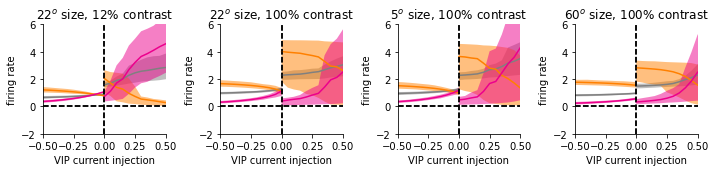

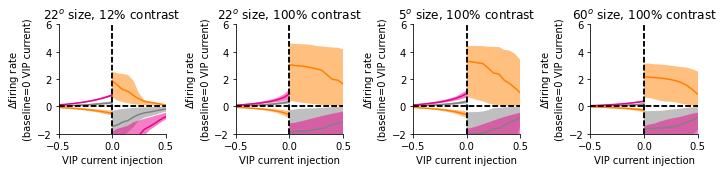

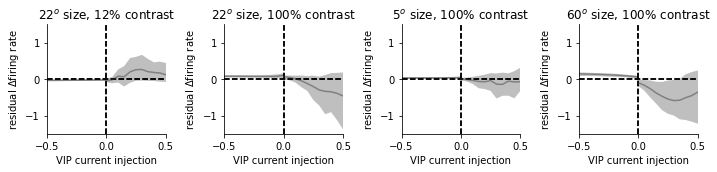

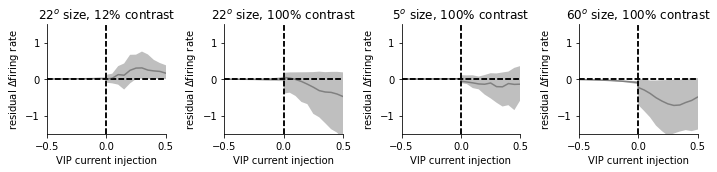

In [ ]:

# nr_baselines_list = [
#     nr_baseline = network_resps[0][iconn],

# ]
nr_baseline = network_resps[0][iconn]
for nrs, is_res, this_ntype in nrs_list:
    for zero_subtracted in [False, True]:
        plt.figure(figsize=(10,2.5))
        for iistim, (istim,title) in enumerate([
            # (0, '0% contrast'),
            # (5, '5$^o$ size, 100% contrast'),
            # (35, '60$^o$ size, 100% contrast'),
            # (18, '0% contrast'),
            # (20, '22$^o$ size, 12% contrast'),
            # (23, '22$^o$ size, 100% contrast')
            (20, '22$^o$ size, 12% contrast'),
            (23, '22$^o$ size, 100% contrast'),
            (5, '5$^o$ size, 100% contrast'),
            (35, '60$^o$ size, 100% contrast'),
        ]):
            plt.subplot(1, 4, iistim+1)
            # plt.figure(figsize=(2.5,2.5))
        #     plot_cell_intrinsic_resp(cell_intrinsic_resp[:,:,istim,itype],'cell-intrinsic nonlinearity')
        #     plt.plot(opto_levels,np.nanmean(cell_intrinsic_resp,0)[:,istim,itype],c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
        #     plt.fill_between(opto_levels,np.nanpercentile(cell_intrinsic_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(cell_intrinsic_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
            
            iconn = 0
            
            # nrs = [network_resps[idir][iconn] for idir in [1, 2]] + [res[iconn][idir-1] for idir in [1, 2]]
            pos_neg_opto_levels = [-opto_levels, opto_levels] + [-opto_levels, opto_levels]
            
        #     cs = ['k',np.array((1,0.65,0)),np.array((1,0,1)),np.array((0,0,1))]
            cs = [np.array((0.5,0.5,0.5)),np.array((1,0.5,0)),np.array((236, 0, 140))/255,np.array((0,0,1))]
            lbls = ['baseline','PC$\rightarrow$SST weights deleted','PC$\rightarrow$VIP weights deleted','PC$\leftrightarrow$PV weights deleted']
            for iplot,(nr, these_opto_levels, c, lbl) in enumerate(zip(nrs, pos_neg_opto_levels, cs, lbls)):
                if norm_to_mean and not is_res:
                    nr = ut.norm_middle_axes_to_mean(nr[:,:,:,:],nr_baseline[:,15,:,:])
                # plt.subplot(1,4,iplot+1)
                for itype in range(this_ntype):
                    plot_nonlinearity(these_opto_levels, nr[lkat][:,:,istim,itype],
                        cs[itype], lbl, zero_subtracted=zero_subtracted)
        #             plot_nonlinearity(nr[lkat][this_lkat][:,:,istim,itype],cs[itype],lbl)
                plt.axvline(0,c='k',linestyle='dashed')
                plt.axhline(0,c='k',linestyle='dashed')
        #         plt.xlim((-1.5,1.5))
                plt.xlim((-0.5,0.5))
        #         plt.xlim((-0.25,0.25))
        #         plt.ylim((-1,3.5))
                if norm_to_mean and not is_res:
                    plt.ylim((-2,6))
                else:
                    # plt.ylim((-1,3))
                    plt.ylim((-1.5,1.5))
        #         plt.ylim((-0.75,2.5))
                ut.erase_top_right()
                
        #     plt.plot(opto_levels,np.nanmean(network_resp,0)[:,istim,itype],c='k',label='baseline')
        #     plt.fill_between(opto_levels,np.nanpercentile(network_resp,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp,pct_u,axis=0)[:,istim,itype],facecolor='k',alpha=0.5)
            
        #     plt.plot(opto_levels,np.nanmean(network_resp_no_pcvip,0)[:,istim,itype],c=cs[2],label='PC$\rightarrow$VIP weights deleted')
        #     plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcvip,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcvip,pct_u,axis=0)[:,istim,itype],facecolor=cs[2],label='PC$\leftrightarrow$PC weights deleted',alpha=0.5)
            
        #     plt.plot(opto_levels,np.nanmean(network_resp_no_pcsst,0)[:,istim,itype],c=cs[1],label='PC$\rightarrow$SST weights deleted')
        #     plt.fill_between(opto_levels,np.nanpercentile(network_resp_no_pcsst,pct_l,axis=0)[:,istim,itype],np.nanpercentile(network_resp_no_pcsst,pct_u,axis=0)[:,istim,itype],facecolor=cs[1],label='PC$\leftrightarrow$PV weights deleted',alpha=0.5)
            
            # plt.legend()
        #         plt.xlim((-1.5,1.5))
                    
                plt.xlabel('VIP current injection')
                if zero_subtracted:
                    plt.ylabel(r'$\Delta$firing rate'+'\n(baseline=0 VIP current)')
                else:
                    plt.ylabel('firing rate')
                if is_res:
                    plt.ylabel(r'residual $\Delta$firing rate')
            # plt.title('PC$\leftrightarrow$PC weights deleted')
            plt.tight_layout()
        #     plt.savefig('figures/network_nonlinearity_w_and_wo_ws_stim_%d_no_title.jpg'%istim,dpi=300)
        #     plt.savefig('figures/sst_network_nonlinearity_w_and_wo_ws_stim_%d_no_title.jpg'%istim,dpi=300)
            plt.title(title)
        plt.tight_layout()
        if not is_res:
            plt.savefig(notebook_base+f'/figures/network_nonlinearity_with_l4_baselined_{zero_subtracted}_by_stim.jpg',dpi=300)
        else:
            plt.savefig(notebook_base+f'/figures/network_nonlinearity_with_l4_baselined_{zero_subtracted}_by_stim_res_{is_res}.jpg',dpi=300)
            # plt.savefig(f'../figures/network_nonlinearity_with_l4_baselined_{zero_subtracted}_by_stim_{istim}.eps')

In [ ]:
network_resp_no_pcpc

array([0.16238787, 0.16247395, 0.16258126, 0.16271425, 0.16287815,
       0.16307908, 0.16332404, 0.16362103, 0.16397887, 0.16440682,
       0.16491385, 0.16550705, 0.16618919, 0.16695537, 0.1677897 ,
       0.16866423, 0.16954224, 0.17038591, 0.17116458, 0.17185944,
       0.17246341, 0.17297815, 0.17341054, 0.17376989, 0.17406613,
       0.17430881, 0.17450662, 0.17466722, 0.17479722, 0.17490224,
       0.17498701])

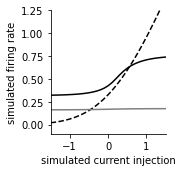

In [ ]:
YY_opto = npyfile['YY_opto'][:,:,:,np.newaxis,:]
YY_opto_no_pcpc = npyfile['YY_opto_no_pcpc'][:,:,:,np.newaxis,:]
# these_opto_levels = opto_levels.copy()


iwt = 0
istim = 0
itype = 0
this_mdl,this_YY = mdls_no_pcpc.copy(),YY_opto_no_pcpc.copy()
# this_mdl,this_YY = mdls_no_pcpv.copy(),YY_opto_no_pcpv.copy()
# this_mdl,this_YY = mdls.copy(),YY_opto.copy()

network_resp = np.nanmean(YY_opto[iwt][:,istim,:,itype],1)
network_resp_no_pcpc = np.nanmean(YY_opto_no_pcpc[iwt][:,istim,:,itype],1)

cell_intrinsic_resp = np.zeros_like(these_opto_levels)
for ilevel in range(these_opto_levels.shape[0]):
    cell_intrinsic_resp[ilevel] = this_mdl[iwt].compute_f_(these_opto_levels[ilevel]+this_mdl[iwt].Eta,this_mdl[iwt].Xi,this_mdl[iwt].s02)[istim,itype]

plt.figure(figsize=(2.5,2.5))
plt.plot(these_opto_levels,cell_intrinsic_resp,c='k',linestyle='dashed',label='cell-intrinsic nonlinearity')
these_opto_levels = np.linspace(-1.5, 1.5, 31)
plt.plot(these_opto_levels,network_resp,c='k',label='baseline')
plt.plot(these_opto_levels,network_resp_no_pcpc,c=np.array((0.5,0.5,0.5)),label='PC$\leftrightarrow$PC weights deleted')
# plt.legend()
plt.xlim((-1.5,1.5))
plt.ylim((-0.1,1.25))
ut.erase_top_right()
plt.xlabel('simulated current injection')
plt.ylabel('simulated firing rate')
# plt.title('PC$\leftrightarrow$PC weights deleted')
plt.tight_layout()
# plt.savefig('figures/network_nonlinearity_w_and_wo_wpcpc.eps')